# Problem Statements

# Random Forest

- Dataset Description:

- Use the Glass dataset and apply the Random forest model.

- 1. Exploratory Data Analysis (EDA):

- Perform exploratory data analysis to understand the structure of the dataset.
- Check for missing values, outliers, inconsistencies in the data.

- 2: Data Visualization:

- Create visualizations such as histograms, box plots, or pair plots to visualize the distributions and relationships between features.
- Analyze any patterns or correlations observed in the data.

- 3: Data Preprocessing

- 1. Check for missing values in the dataset and decide on a strategy for handling them.Implement the chosen strategy (e.g., imputation or removal) and explain your reasoning.
- 2. If there are categorical variables, apply encoding techniques like one-hot encoding to convert them into numerical format.
- 3. Apply feature scaling techniques such as standardization or normalization to ensure that all features are on a similar scale. Handling the imbalance data.

- 4: Random Forest Model Implementation
- 1. Divide the data into train and test split.
- 2. Implement a Random Forest classifier using Python and a machine learning library like scikit-learn.
- 3. Train the model on the train dataset. Evaluate the performance on test data using metrics like accuracy, precision, recall, and F1-score.

- 5: Bagging and Boosting Methods
- Apply the Bagging and Boosting methods and compare the results.


- Additional Notes:
- 1. Explain Bagging and Boosting methods. How is it different from each other.
- 2. Explain how to handle imbalance in the data.

# Import Liabiries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 300
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Read Data Set

In [138]:
df = pd.read_excel("glass2.xlsx")
df

RI     Na    Mg    Al     Si     K    Ca    Ba   Fe  Type
0    1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.00  0.0     1
1    1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.00  0.0     1
2    1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.00  0.0     1
3    1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.00  0.0     1
4    1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.00  0.0     1
..       ...    ...   ...   ...    ...   ...   ...   ...  ...   ...
209  1.51623  14.14  0.00  2.88  72.61  0.08  9.18  1.06  0.0     7
210  1.51685  14.92  0.00  1.99  73.06  0.00  8.40  1.59  0.0     7
211  1.52065  14.36  0.00  2.02  73.42  0.00  8.44  1.64  0.0     7
212  1.51651  14.38  0.00  1.94  73.61  0.00  8.48  1.57  0.0     7
213  1.51711  14.23  0.00  2.08  73.36  0.00  8.62  1.67  0.0     7

[214 rows x 10 columns]

# EDA (Exploratory Data Analysis)

- Exploratory Data Analysis (EDA) is an approach to analyze the data using visual techniques and statistical techniques. It is used to discover trends, patterns, or to check assumptions with the help of statistical summary and graphical representations.

**Steps involved in EDA**
1. Describing the data
2. Data cleaning
3. Imputation techniques
4. Data analysis and visualization
5. Transformations
6. Auto EDA

In [3]:
df.describe()

RI          Na          Mg          Al          Si           K  \
count  214.000000  214.000000  214.000000  214.000000  214.000000  214.000000   
mean     1.518365   13.407850    2.684533    1.444907   72.650935    0.497056   
std      0.003037    0.816604    1.442408    0.499270    0.774546    0.652192   
min      1.511150   10.730000    0.000000    0.290000   69.810000    0.000000   
25%      1.516522   12.907500    2.115000    1.190000   72.280000    0.122500   
50%      1.517680   13.300000    3.480000    1.360000   72.790000    0.555000   
75%      1.519157   13.825000    3.600000    1.630000   73.087500    0.610000   
max      1.533930   17.380000    4.490000    3.500000   75.410000    6.210000   

               Ca          Ba          Fe        Type  
count  214.000000  214.000000  214.000000  214.000000  
mean     8.956963    0.175047    0.057009    2.780374  
std      1.423153    0.497219    0.097439    2.103739  
min      5.430000    0.000000    0.000000    1.000000  
25%      8.240000    0.000000    0.000000    1.000000  
50%      8.600000    0.000000    0.000000    2.000000  
75%      9.172500    0.000000    0.100000    3.000000  
max     16.190000    3.150000    0.510000    7.000000

In [4]:
df.dtypes

RI      float64
Na      float64
Mg      float64
Al      float64
Si      float64
K       float64
Ca      float64
Ba      float64
Fe      float64
Type      int64
dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


# Duplicates

In [6]:
df.duplicated().sum()

1

# Print the duplicated values

In [7]:
df[df.duplicated()]

RI     Na    Mg    Al     Si     K    Ca   Ba   Fe  Type
39  1.52213  14.21  3.82  0.47  71.77  0.11  9.57  0.0  0.0     1

In [8]:
df[df.duplicated(keep=False)]

RI     Na    Mg    Al     Si     K    Ca   Ba   Fe  Type
38  1.52213  14.21  3.82  0.47  71.77  0.11  9.57  0.0  0.0     1
39  1.52213  14.21  3.82  0.47  71.77  0.11  9.57  0.0  0.0     1

# Drop Duplicated records

In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df.shape

(213, 10)

In [11]:
df.duplicated().sum()

0

# Missing value imputation
- In dataset, missing data, or missing values, occur when no data value is stored for the variable in an observation.
- Missing data are a common occurrence and can have a significant effect on the conclusions that can be drawn from the data.
- If we don't impute or handle null values, we will not be able to create a machine learning model as python does not understand missing values.
- Handling missing values is a crucial step in EDA.
- Missing values can appear for several reasons like:
- Incomplete data entry
- Issues with machines
- Improper handling of data
- And many more.

# Checking null values

In [12]:
df.head()

RI     Na    Mg    Al     Si     K    Ca   Ba   Fe  Type
0  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.0     1
1  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.0     1
2  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.0     1
3  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.0     1
4  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.0     1

In [13]:
df.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

# Visualizing missing values

<Axes: >

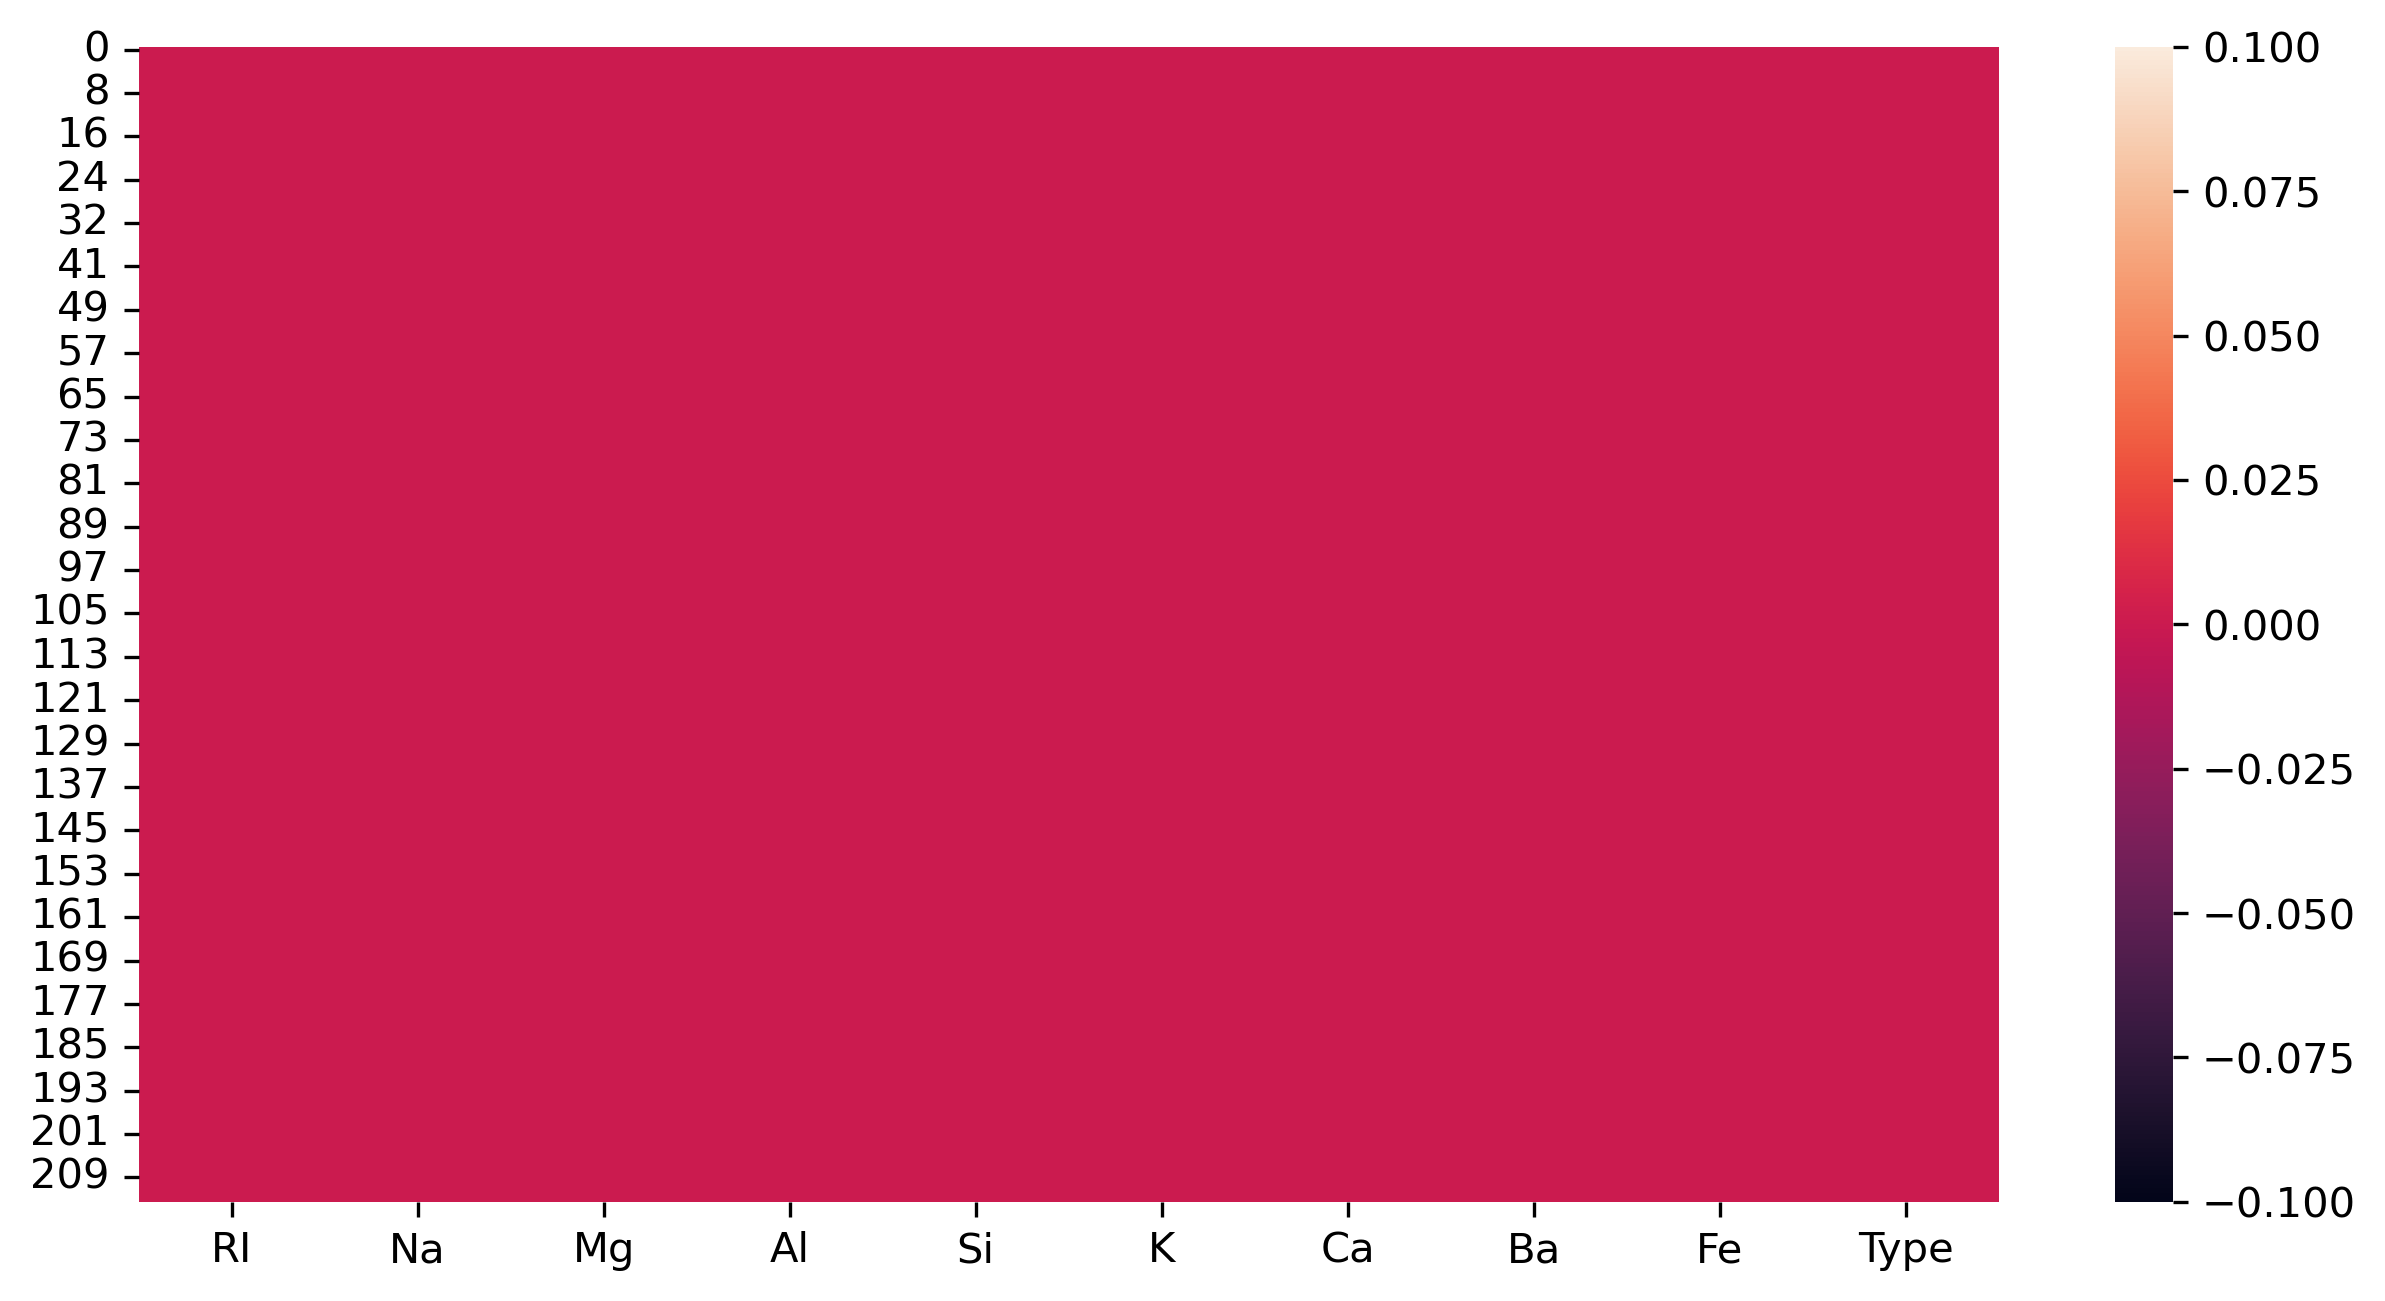

In [14]:
sns.heatmap(df.isna())

# Outlier detection
    - There are multiple approaches to detect outliers in the dataset.
        - Histogram
        - Boxplot
        - Descriptive stats for df

In [15]:
df.describe()

RI          Na          Mg          Al          Si           K  \
count  213.000000  213.000000  213.000000  213.000000  213.000000  213.000000   
mean     1.518348   13.404085    2.679202    1.449484   72.655070    0.498873   
std      0.003033    0.816662    1.443691    0.495925    0.773998    0.653185   
min      1.511150   10.730000    0.000000    0.290000   69.810000    0.000000   
25%      1.516520   12.900000    2.090000    1.190000   72.280000    0.130000   
50%      1.517680   13.300000    3.480000    1.360000   72.790000    0.560000   
75%      1.519150   13.810000    3.600000    1.630000   73.090000    0.610000   
max      1.533930   17.380000    4.490000    3.500000   75.410000    6.210000   

               Ca          Ba          Fe        Type  
count  213.000000  213.000000  213.000000  213.000000  
mean     8.954085    0.175869    0.057277    2.788732  
std      1.425882    0.498245    0.097589    2.105130  
min      5.430000    0.000000    0.000000    1.000000  
25%      8.240000    0.000000    0.000000    1.000000  
50%      8.600000    0.000000    0.000000    2.000000  
75%      9.150000    0.000000    0.100000    3.000000  
max     16.190000    3.150000    0.510000    7.000000

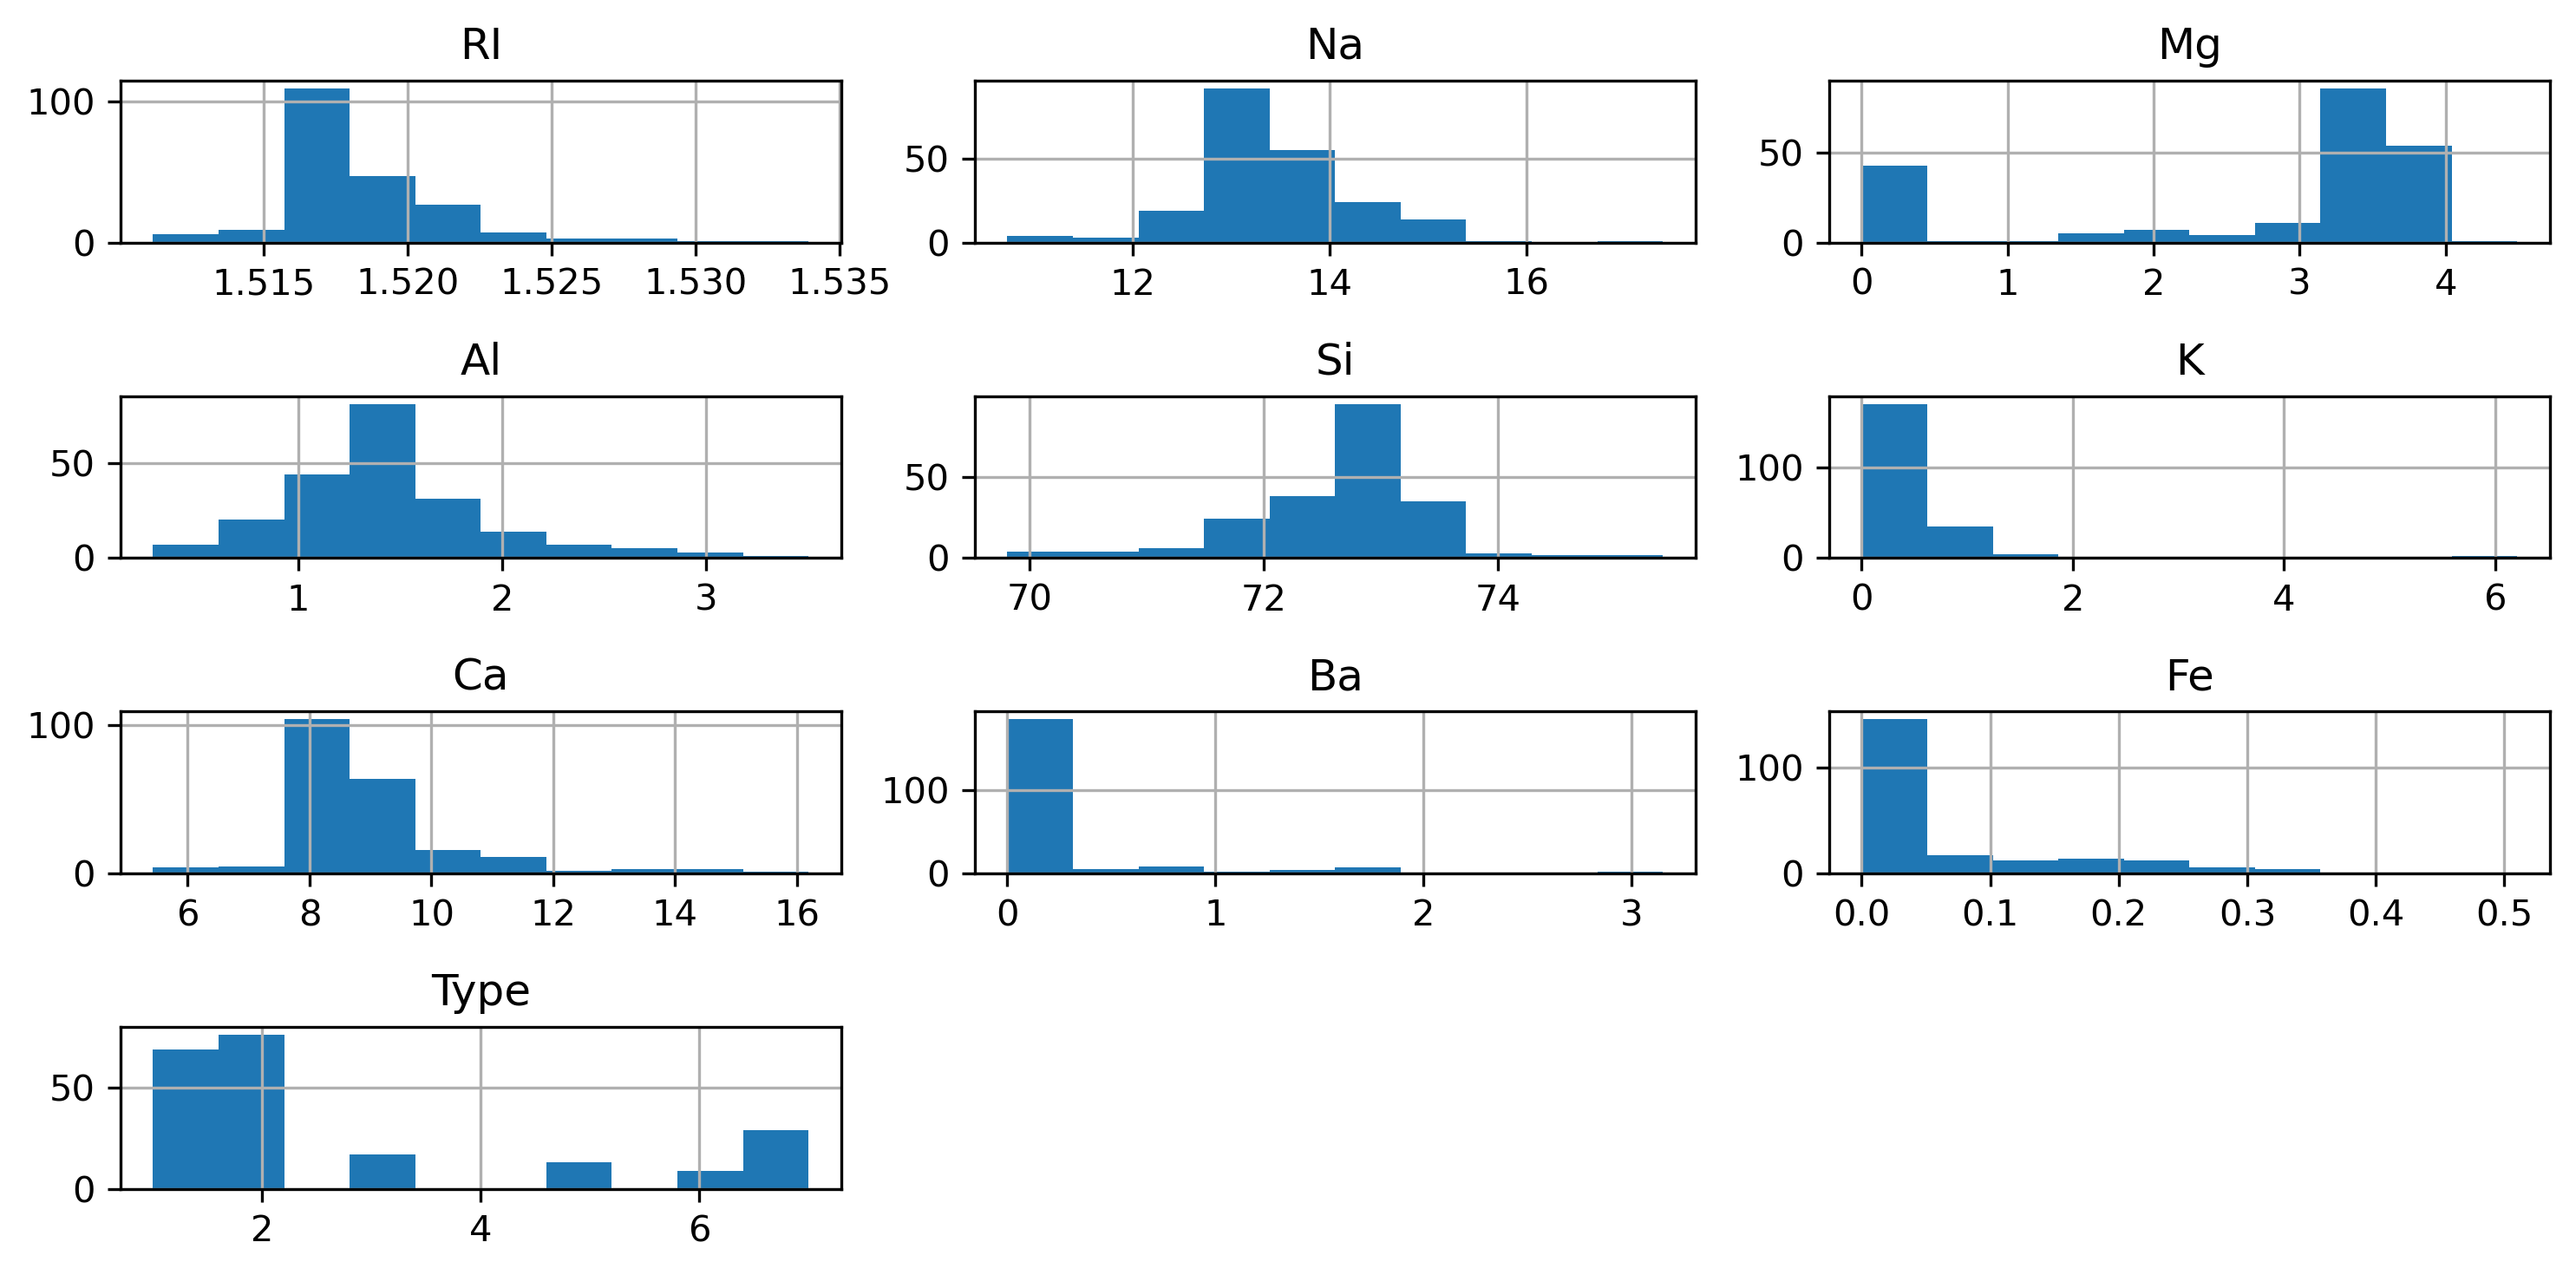

In [16]:
df.hist()
plt.tight_layout()

<Axes: >

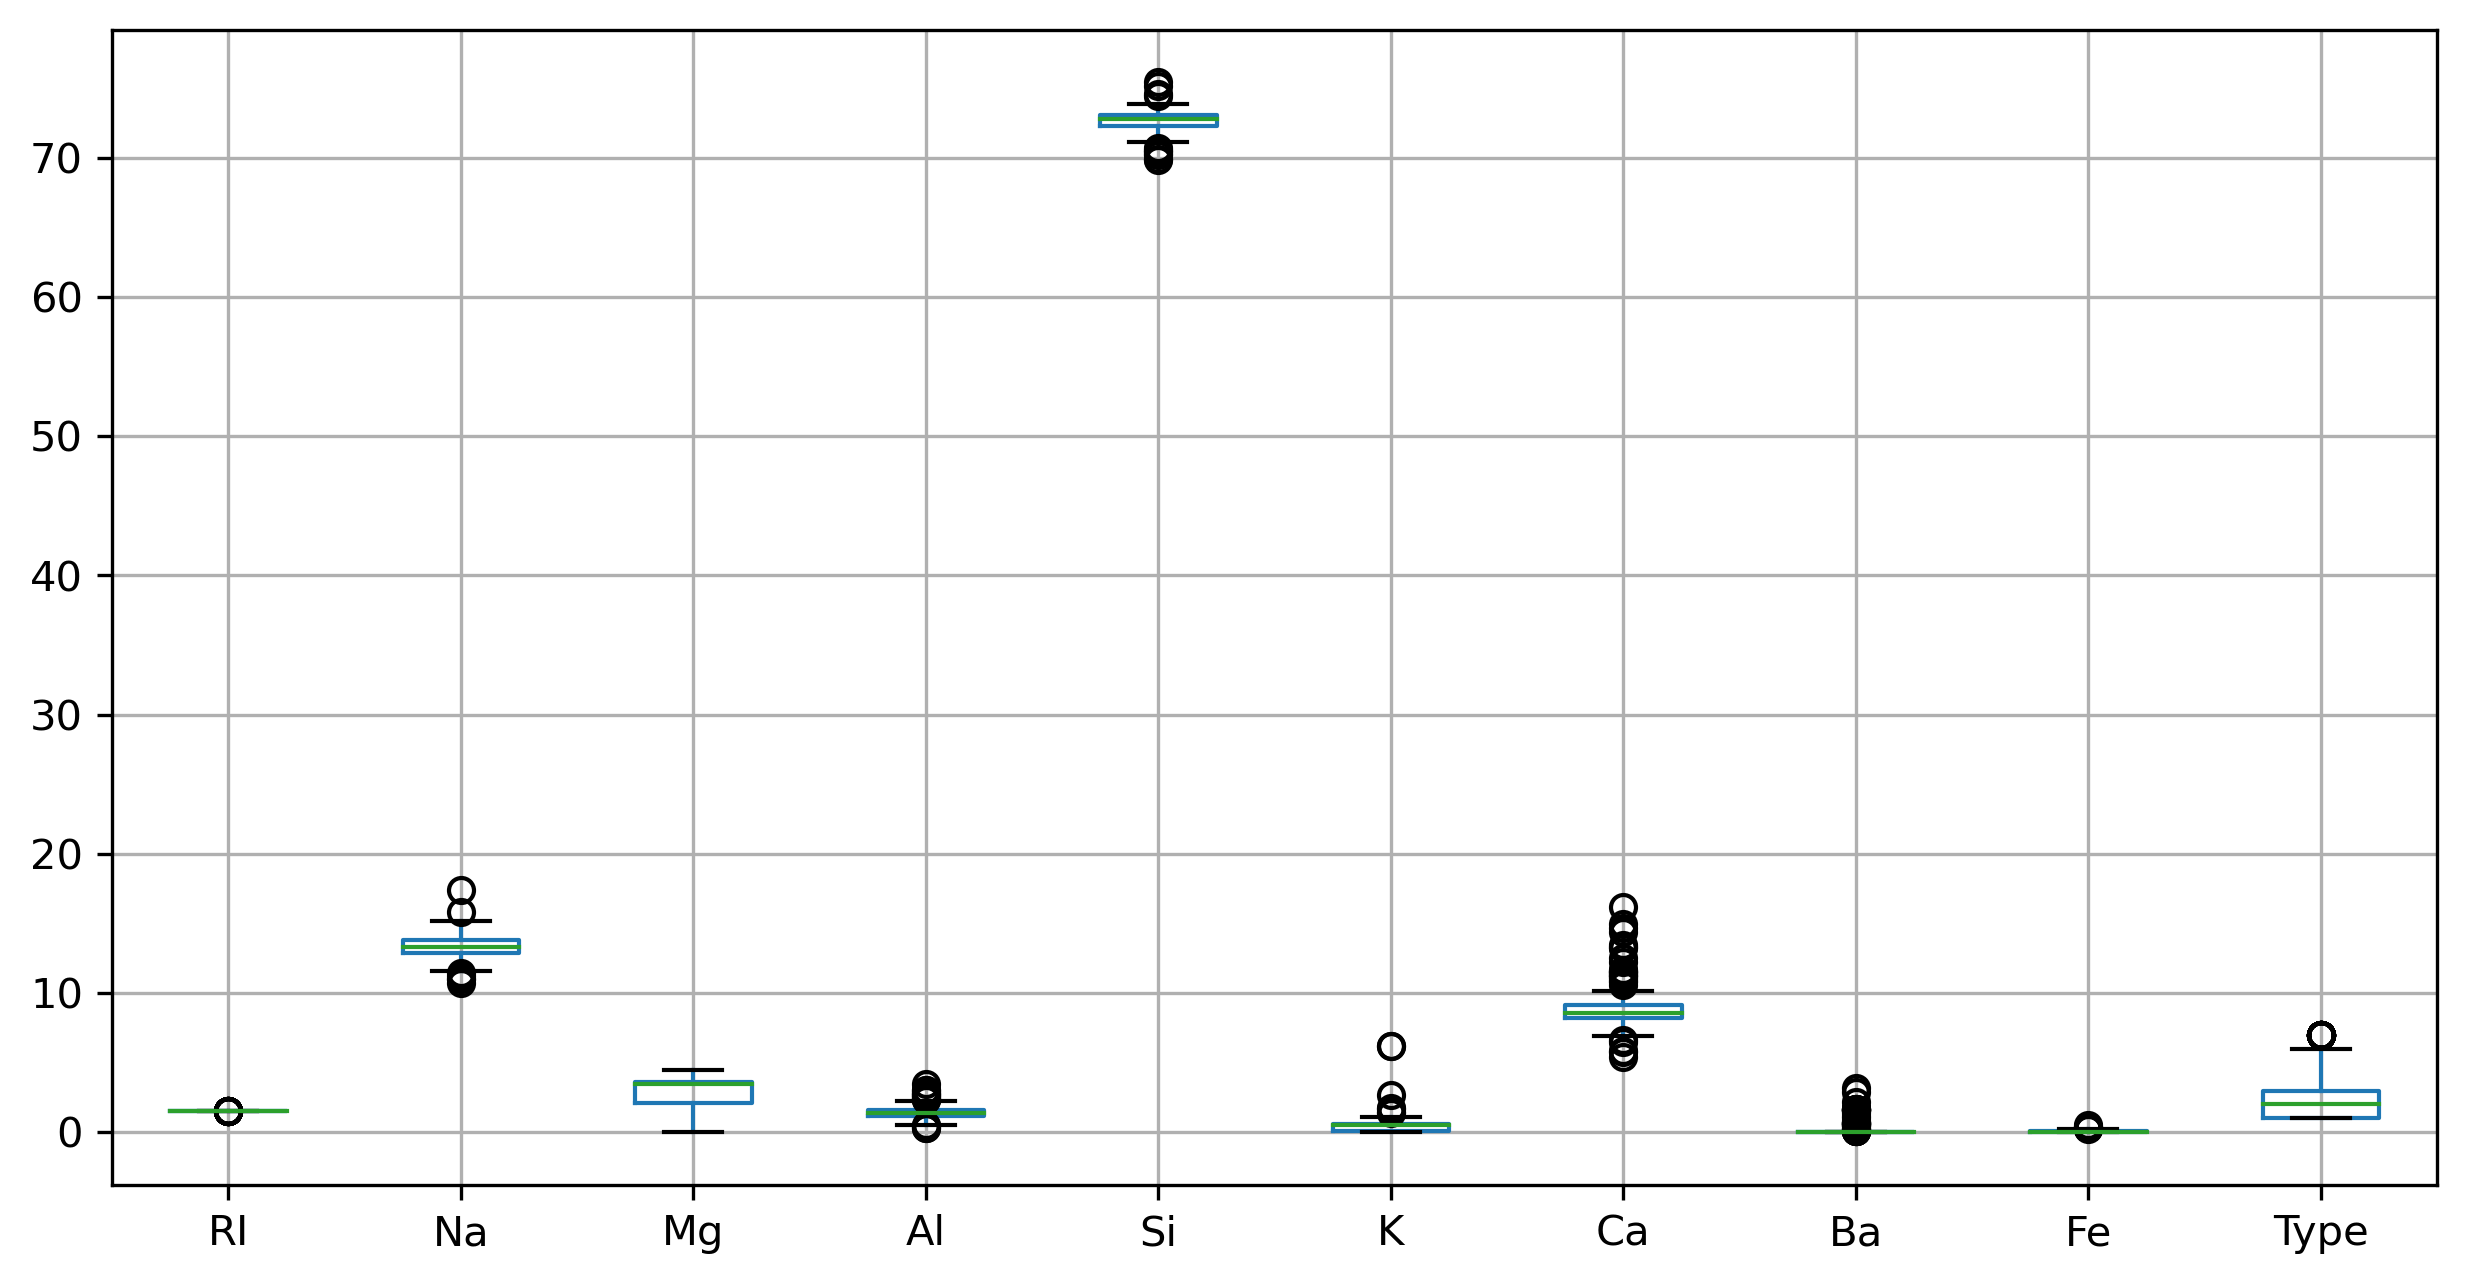

In [17]:
df.boxplot()

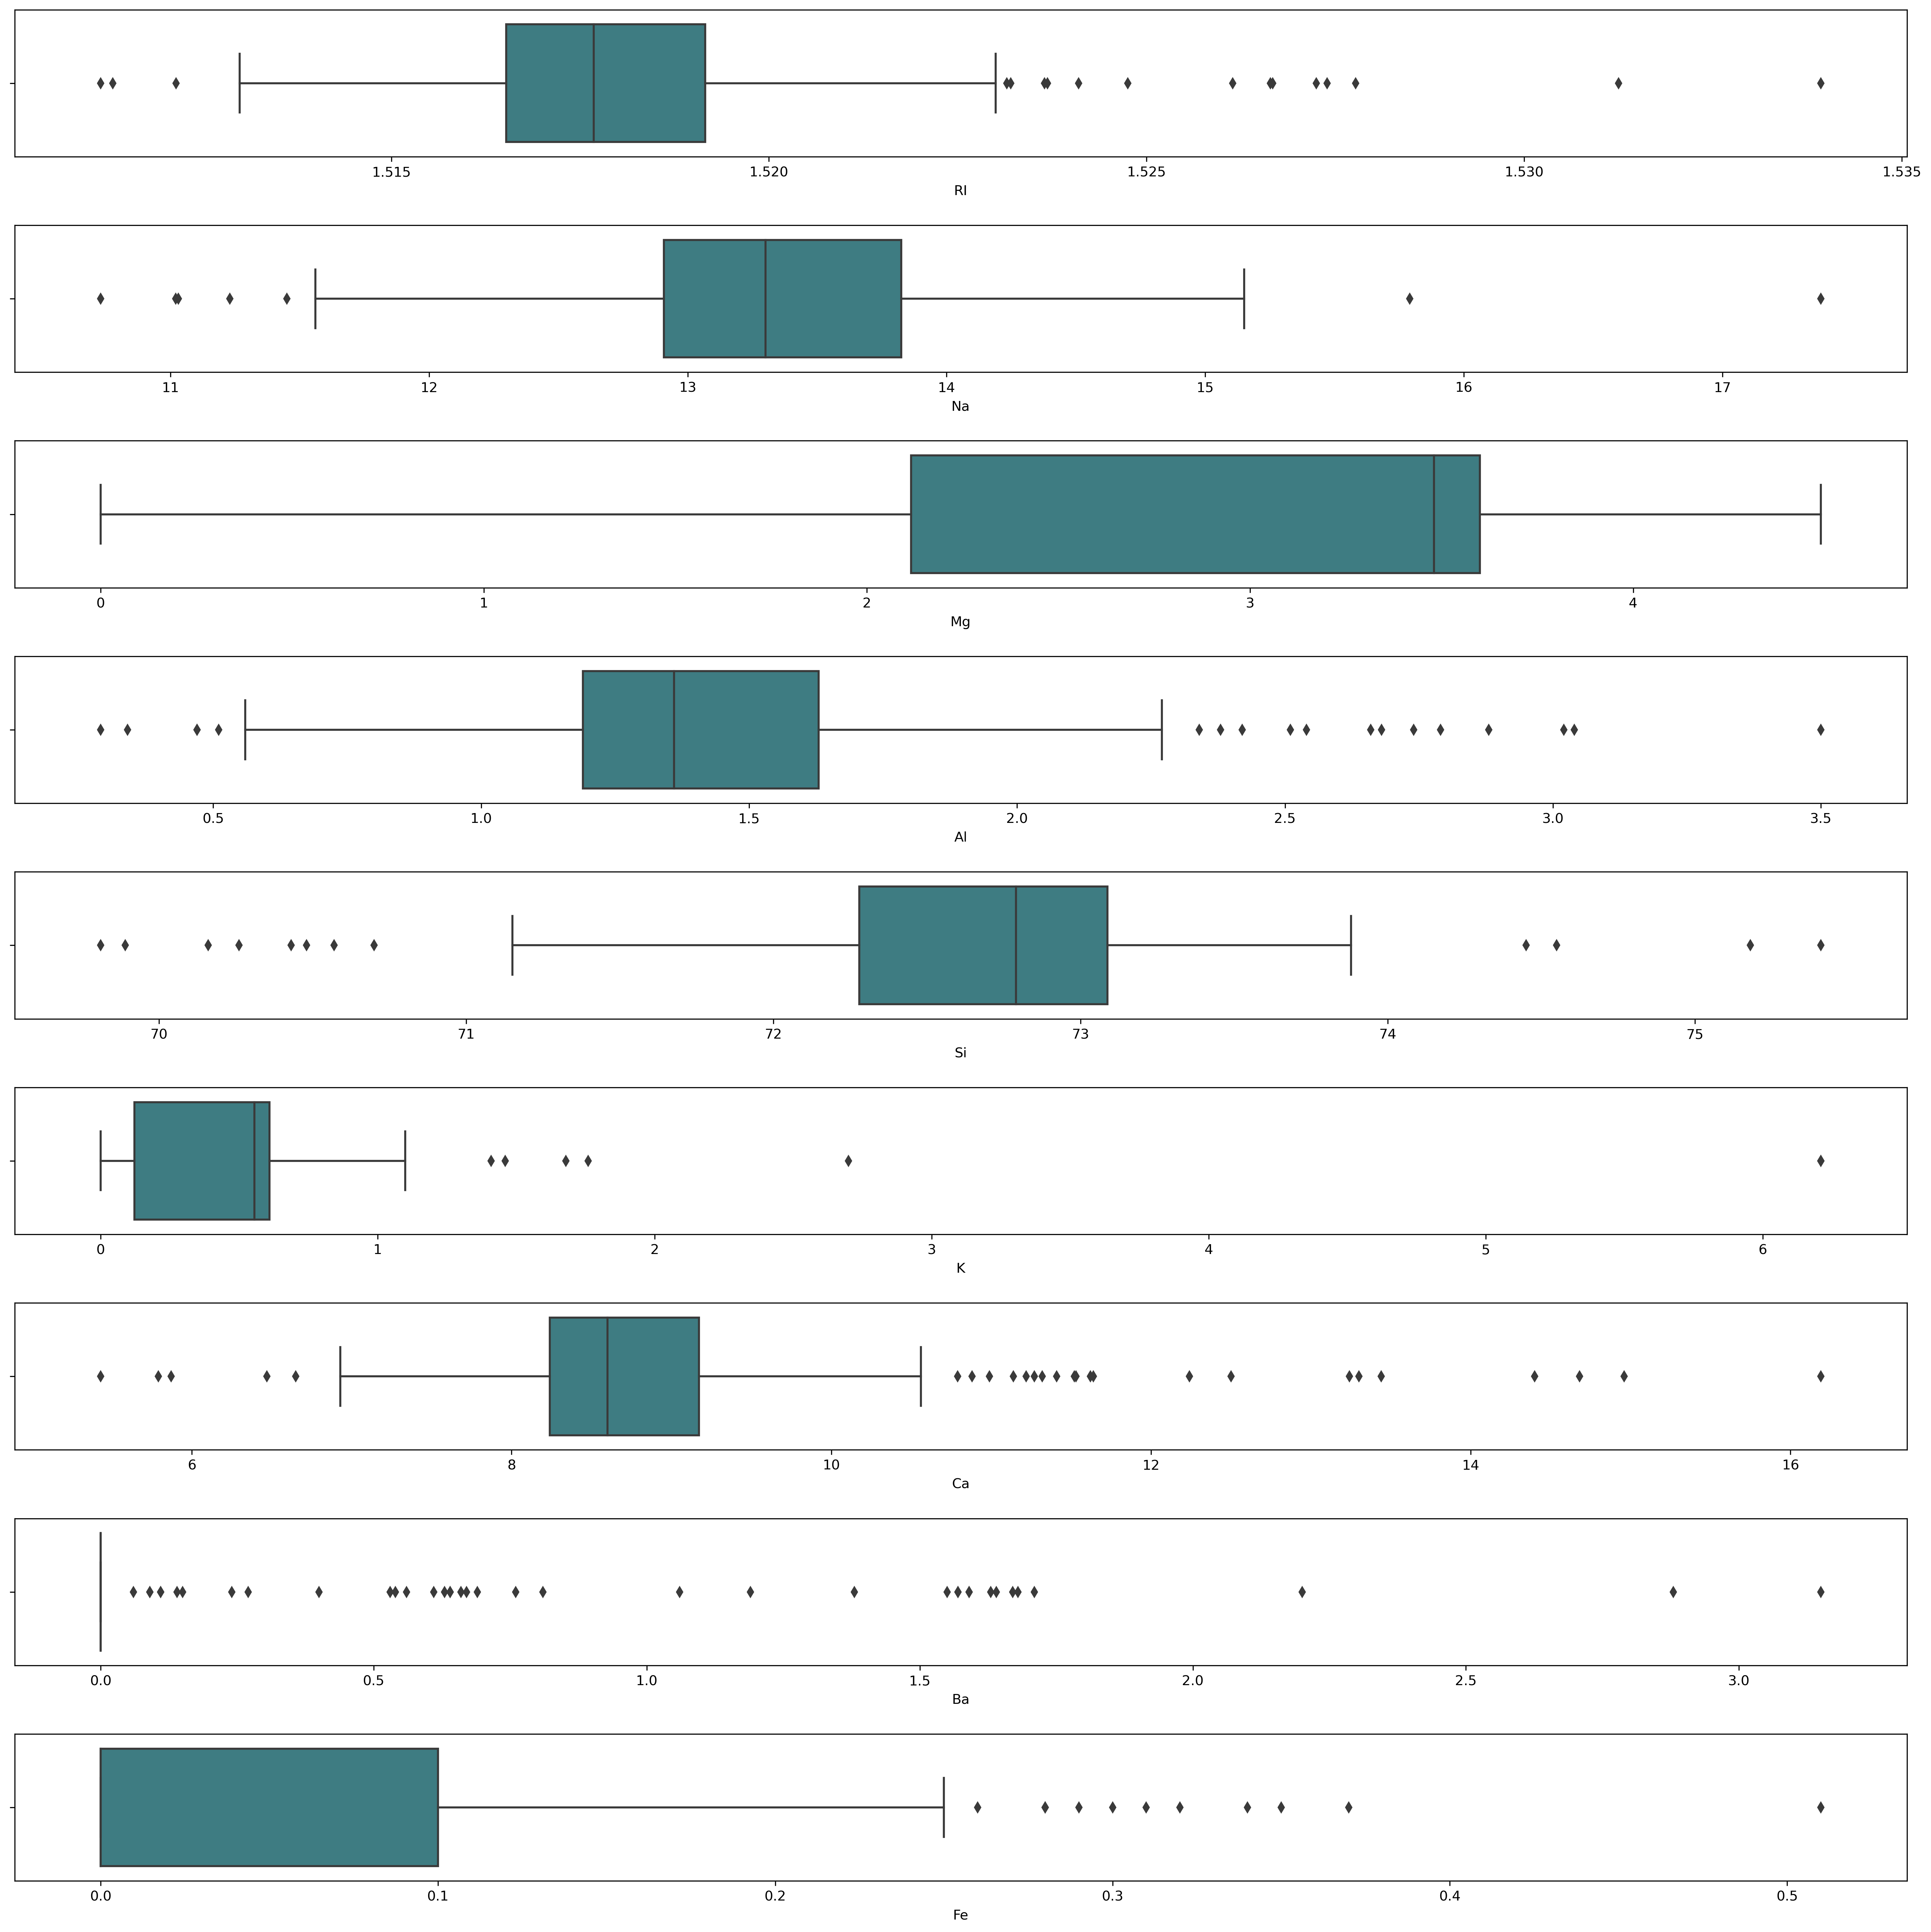

In [139]:
ot=df.copy() 
fig, axes=plt.subplots(9,1,figsize=(20,20),sharex=False,sharey=False)
sns.boxplot(x='RI',data=ot,palette='crest',ax=axes[0])
sns.boxplot(x='Na',data=ot,palette='crest',ax=axes[1])
sns.boxplot(x='Mg',data=ot,palette='crest',ax=axes[2])
sns.boxplot(x='Al',data=ot,palette='crest',ax=axes[3])
sns.boxplot(x='Si',data=ot,palette='crest',ax=axes[4])
sns.boxplot(x='K',data=ot,palette='crest',ax=axes[5])
sns.boxplot(x='Ca',data=ot,palette='crest',ax=axes[6])
sns.boxplot(x='Ba',data=ot,palette='crest',ax=axes[7])
sns.boxplot(x='Fe',data=ot,palette='crest',ax=axes[8])
plt.tight_layout(pad=2.0)

# When looking at the above box plot, you will notice that all of the boxes contain outliers. As a result, we are unable to design a model using outliers. As a result, we have to address the outliers before establishing the model..

# Outlier detection function

In [140]:
def outlier_detection(data,colname):
    q1 = data[colname].quantile(0.25)
    q3 = data[colname].quantile(0.75)
    iqr = q3-q1
    
    upper = q3+(1.5*iqr)
    lower = q1-(1.5*iqr)
    
    return lower,upper

In [141]:
outlier_detection(df, 'RI')

(1.5125700000000002, 1.52311)

# Capping Outliers

Text(0.5, 1.0, 'Before replacing the outlier with upper and lower values')

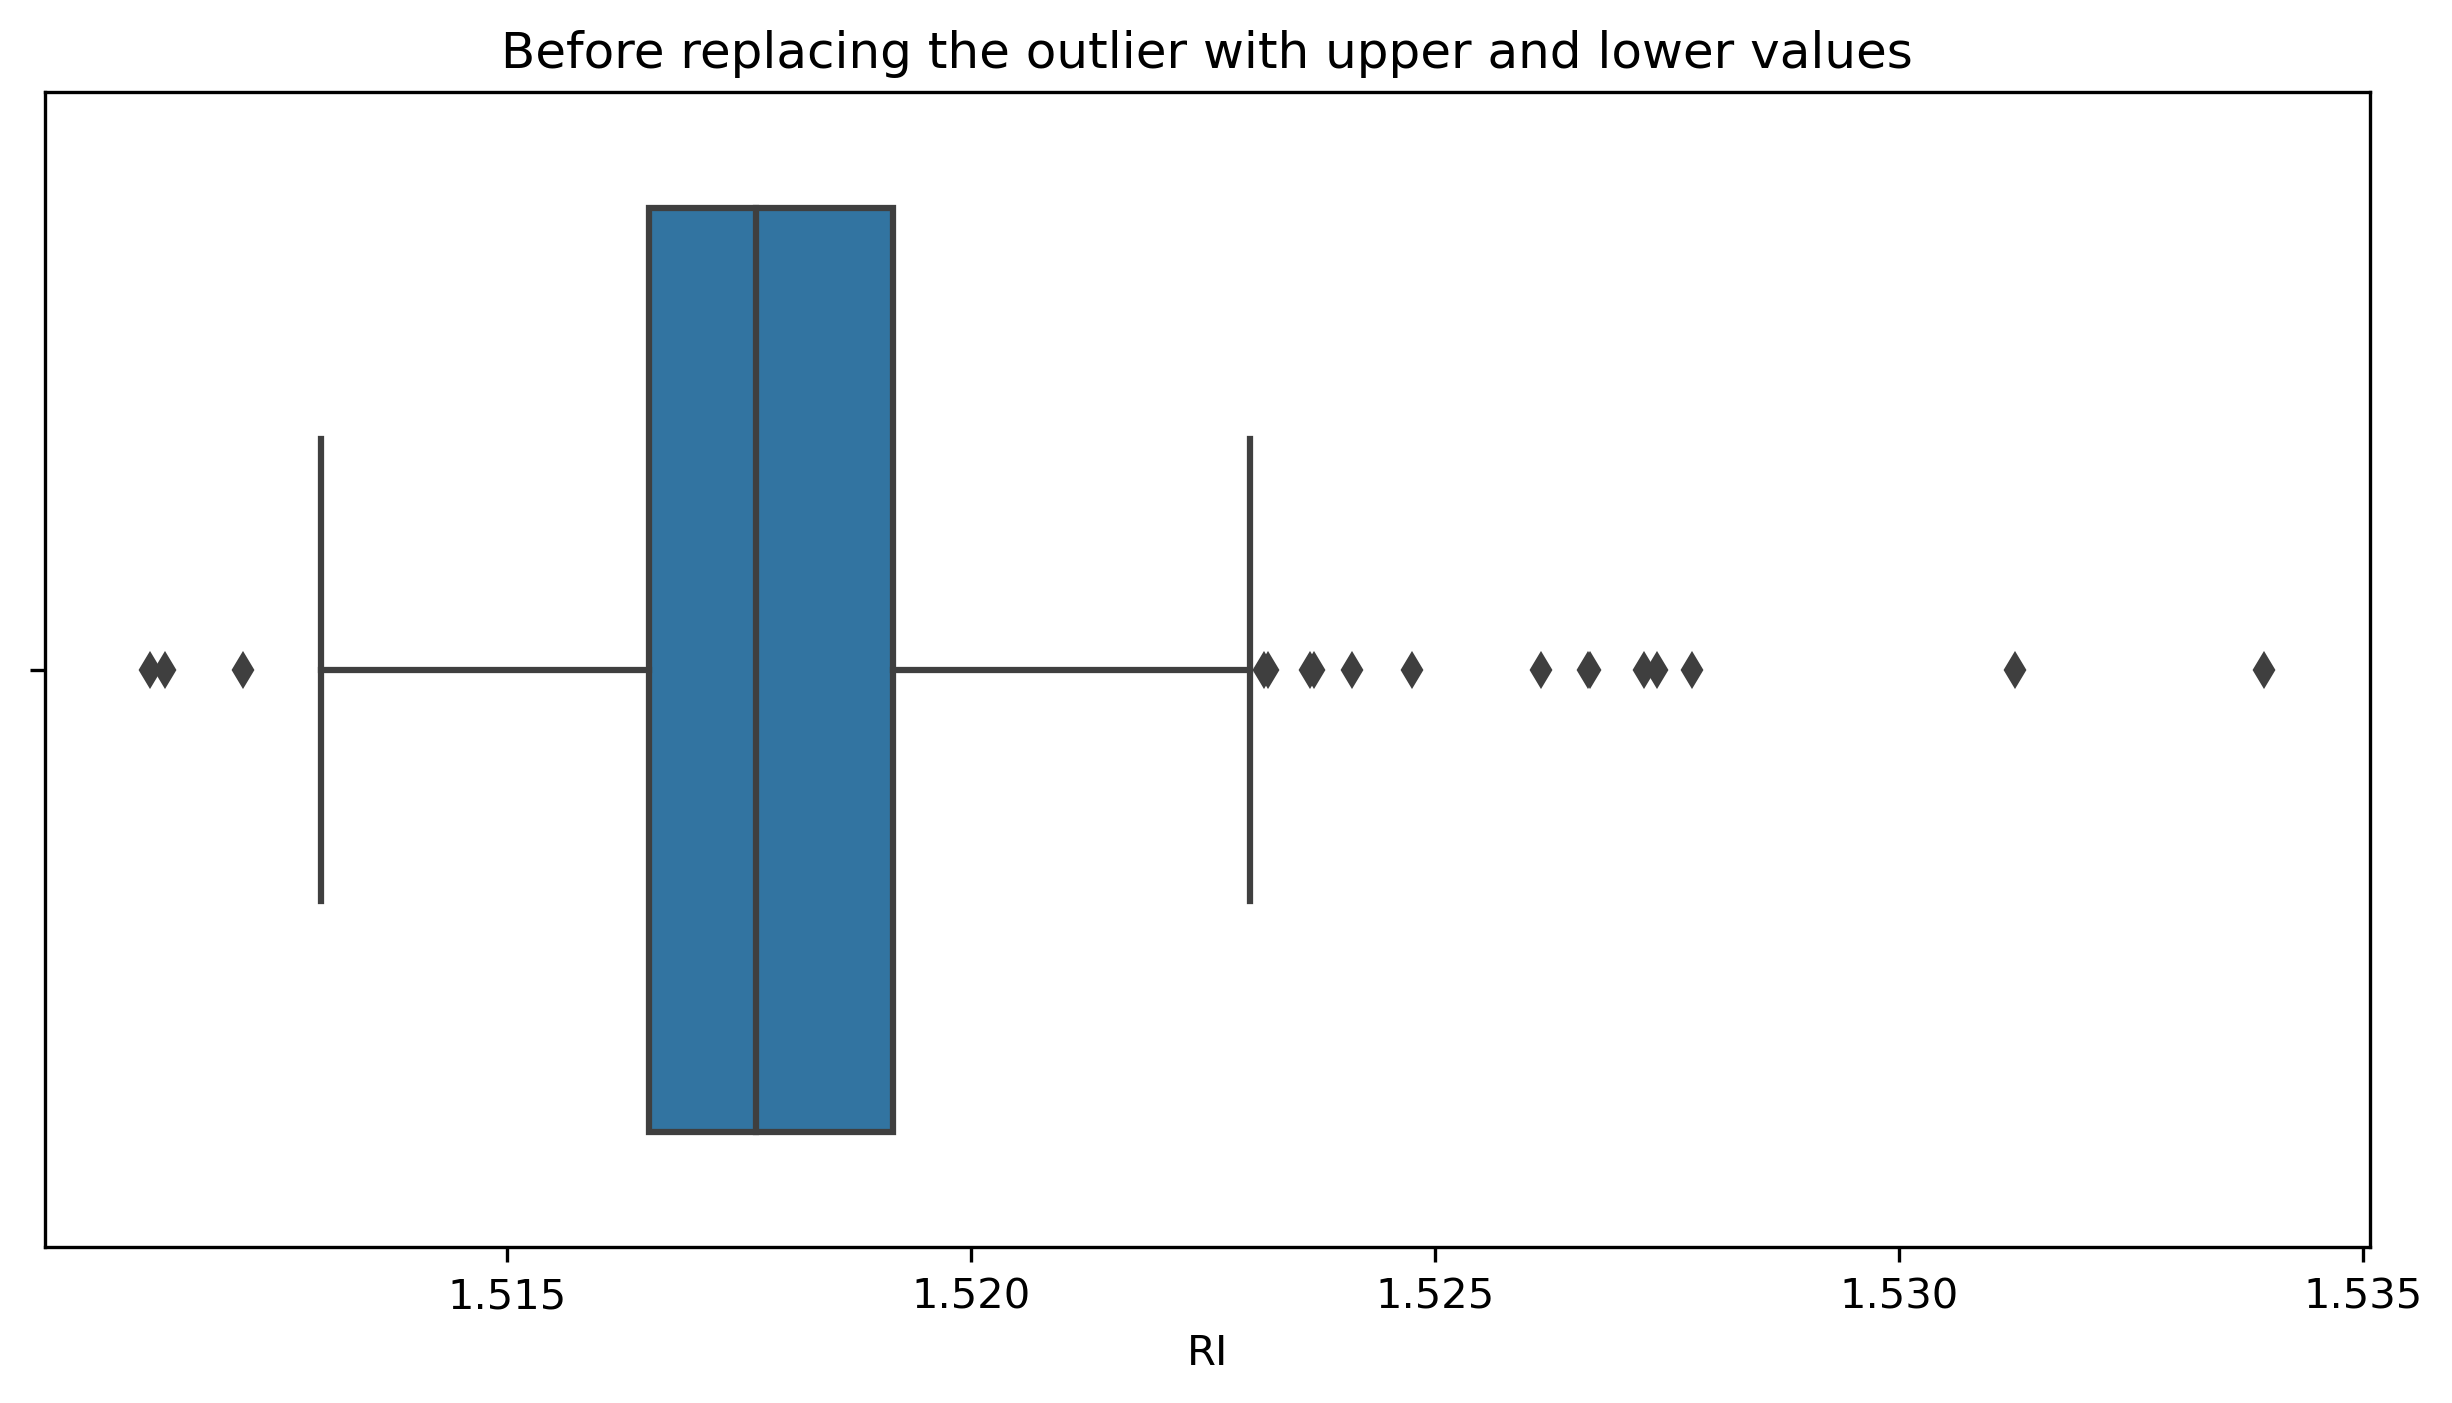

In [142]:
sns.boxplot(x = df["RI"])
plt.xlabel("RI")
plt.title("Before replacing the outlier with upper and lower values")

In [143]:
df[df["RI"]>1.52311]

RI     Na    Mg    Al     Si     K     Ca    Ba    Fe  Type
47   1.52667  13.99  3.70  0.71  71.57  0.02   9.82  0.00  0.10     1
50   1.52320  13.72  3.72  0.51  71.75  0.09  10.06  0.00  0.16     1
103  1.52725  13.80  3.15  0.66  70.57  0.08  11.64  0.00  0.00     2
104  1.52410  13.83  2.90  1.17  71.15  0.08  10.79  0.00  0.00     2
105  1.52475  11.45  0.00  1.88  72.19  0.81  13.24  0.00  0.34     2
106  1.53125  10.73  0.00  2.10  69.81  0.58  13.30  3.15  0.28     2
107  1.53393  12.30  0.00  1.00  70.16  0.12  16.19  0.00  0.24     2
110  1.52664  11.23  0.00  0.77  73.21  0.00  14.68  0.00  0.00     2
111  1.52739  11.02  0.00  0.75  73.08  0.00  14.96  0.00  0.00     2
112  1.52777  12.64  0.00  0.67  72.02  0.06  14.40  0.00  0.00     2
131  1.52614  13.70  0.00  1.36  71.24  0.19  13.44  0.00  0.10     2
170  1.52369  13.44  0.00  1.58  72.22  0.32  12.24  0.00  0.00     5
187  1.52315  13.44  3.34  1.23  72.38  0.60   8.83  0.00  0.00     7
189  1.52365  15.79  1.83  1.31  70.43  0.31   8.61  1.68  0.00     7

In [144]:
len(df[df['RI']>1.52311])

14

In [145]:
df.loc[df['RI']>1.52311,'RI'] = 1.52311

Text(0.5, 1.0, 'Before replacing the outlier with lower values')

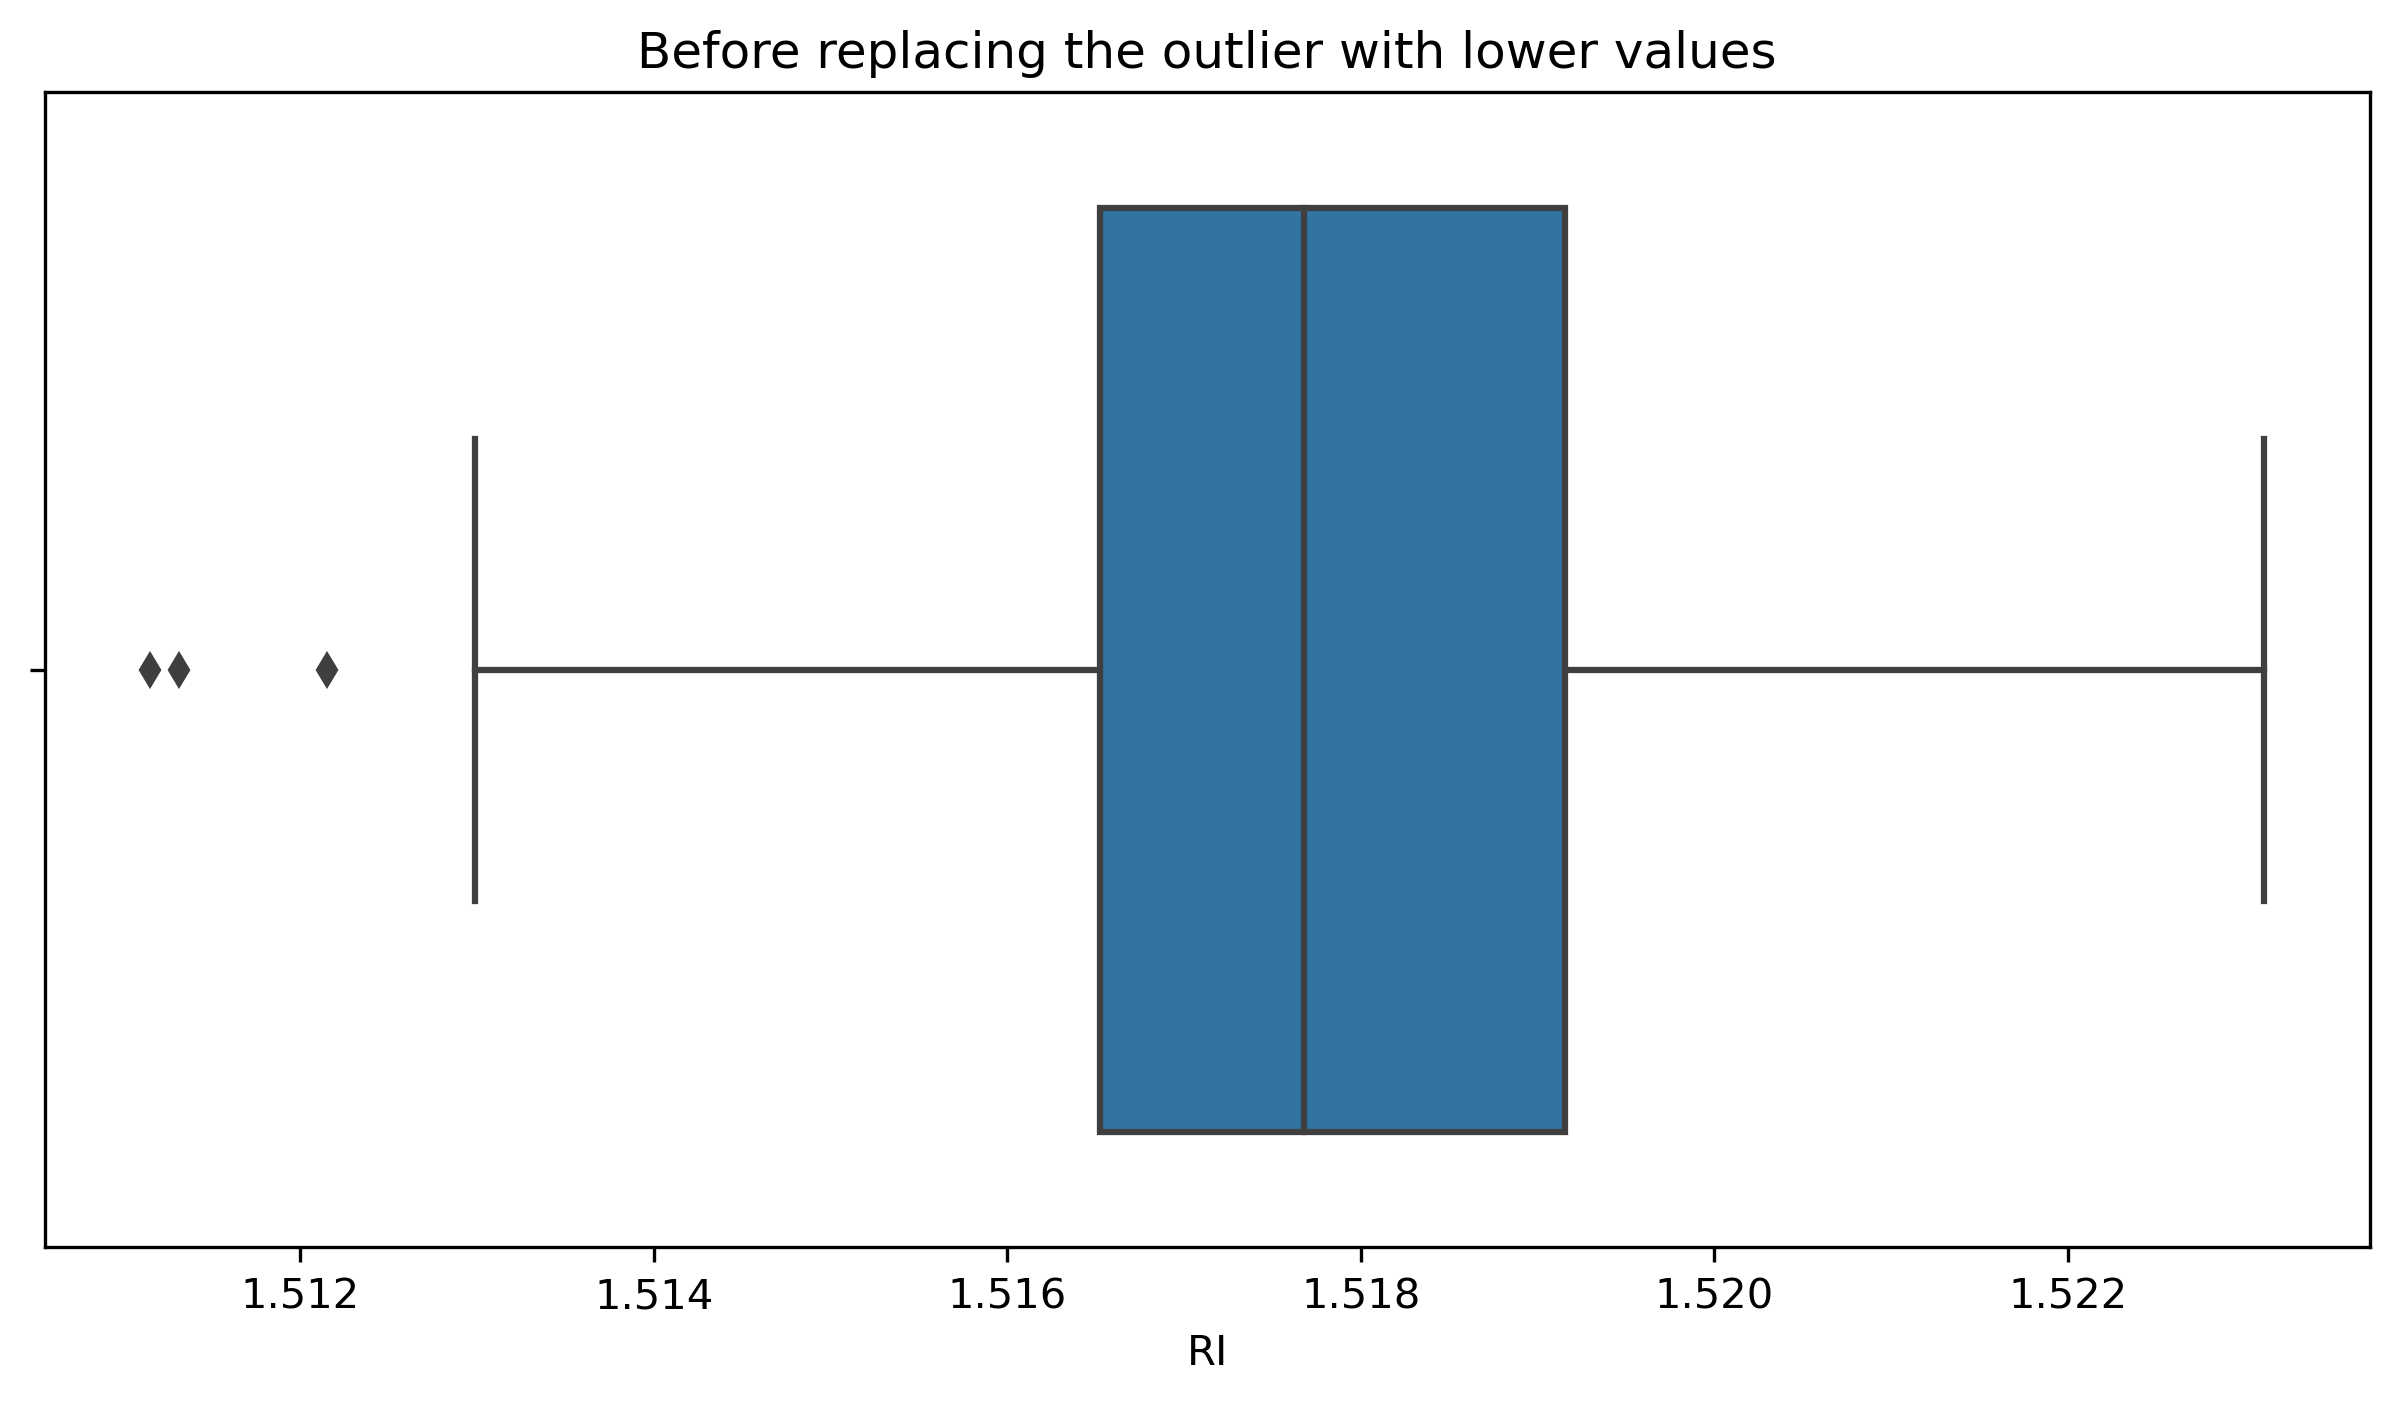

In [146]:
sns.boxplot(x = df["RI"])
plt.xlabel("RI")
plt.title("Before replacing the outlier with lower values")

In [147]:
df[df['RI']<1.5125700000000002]

RI     Na    Mg    Al     Si     K    Ca    Ba    Fe  Type
56   1.51215  12.99  3.47  1.12  72.98  0.62  8.35  0.00  0.31     1
184  1.51115  17.38  0.00  0.34  75.41  0.00  6.65  0.00  0.00     6
185  1.51131  13.69  3.20  1.81  72.81  1.76  5.43  1.19  0.00     7

In [148]:
df.loc[df['RI']<1.5125750000000002,'RI'] = 1.5125750000000002

Text(0.5, 1.0, 'After replaced the outlier with upper and lower values')

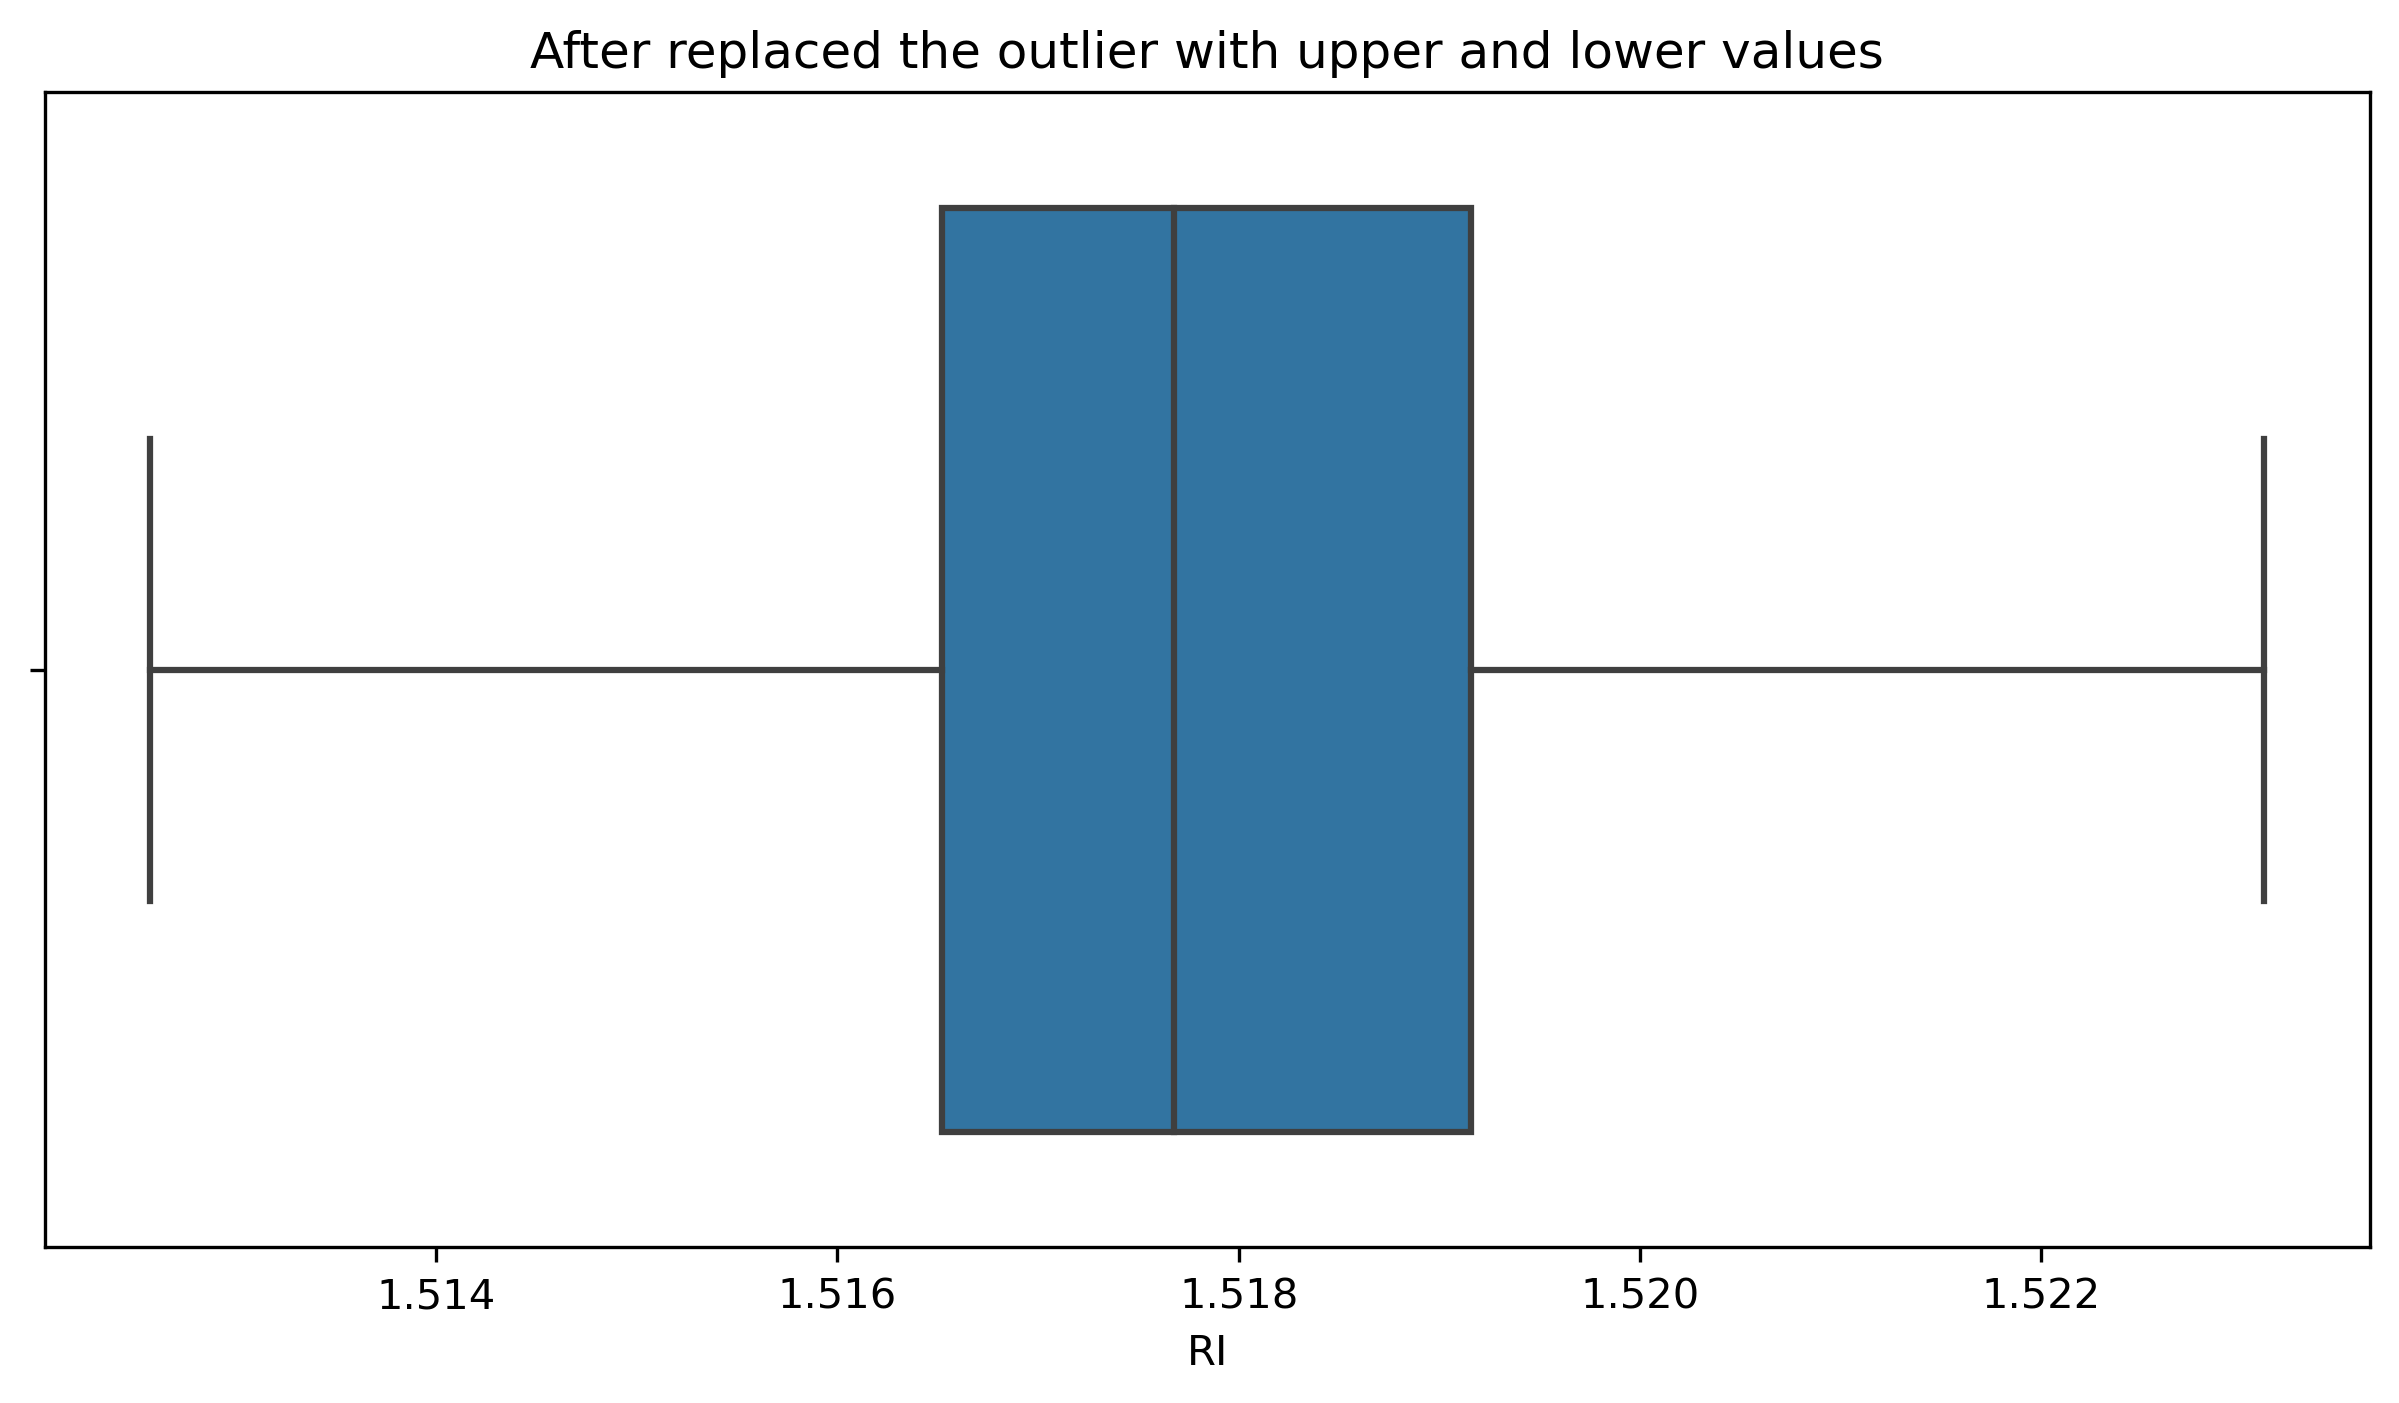

In [149]:
sns.boxplot(x = df["RI"])
plt.xlabel("RI")
plt.title("After replaced the outlier with upper and lower values")

In [150]:
outlier_detection(df, "Na")

(11.531250000000004, 15.201249999999998)

Text(0.5, 1.0, 'Before replaced the outlier with upper and lower values')

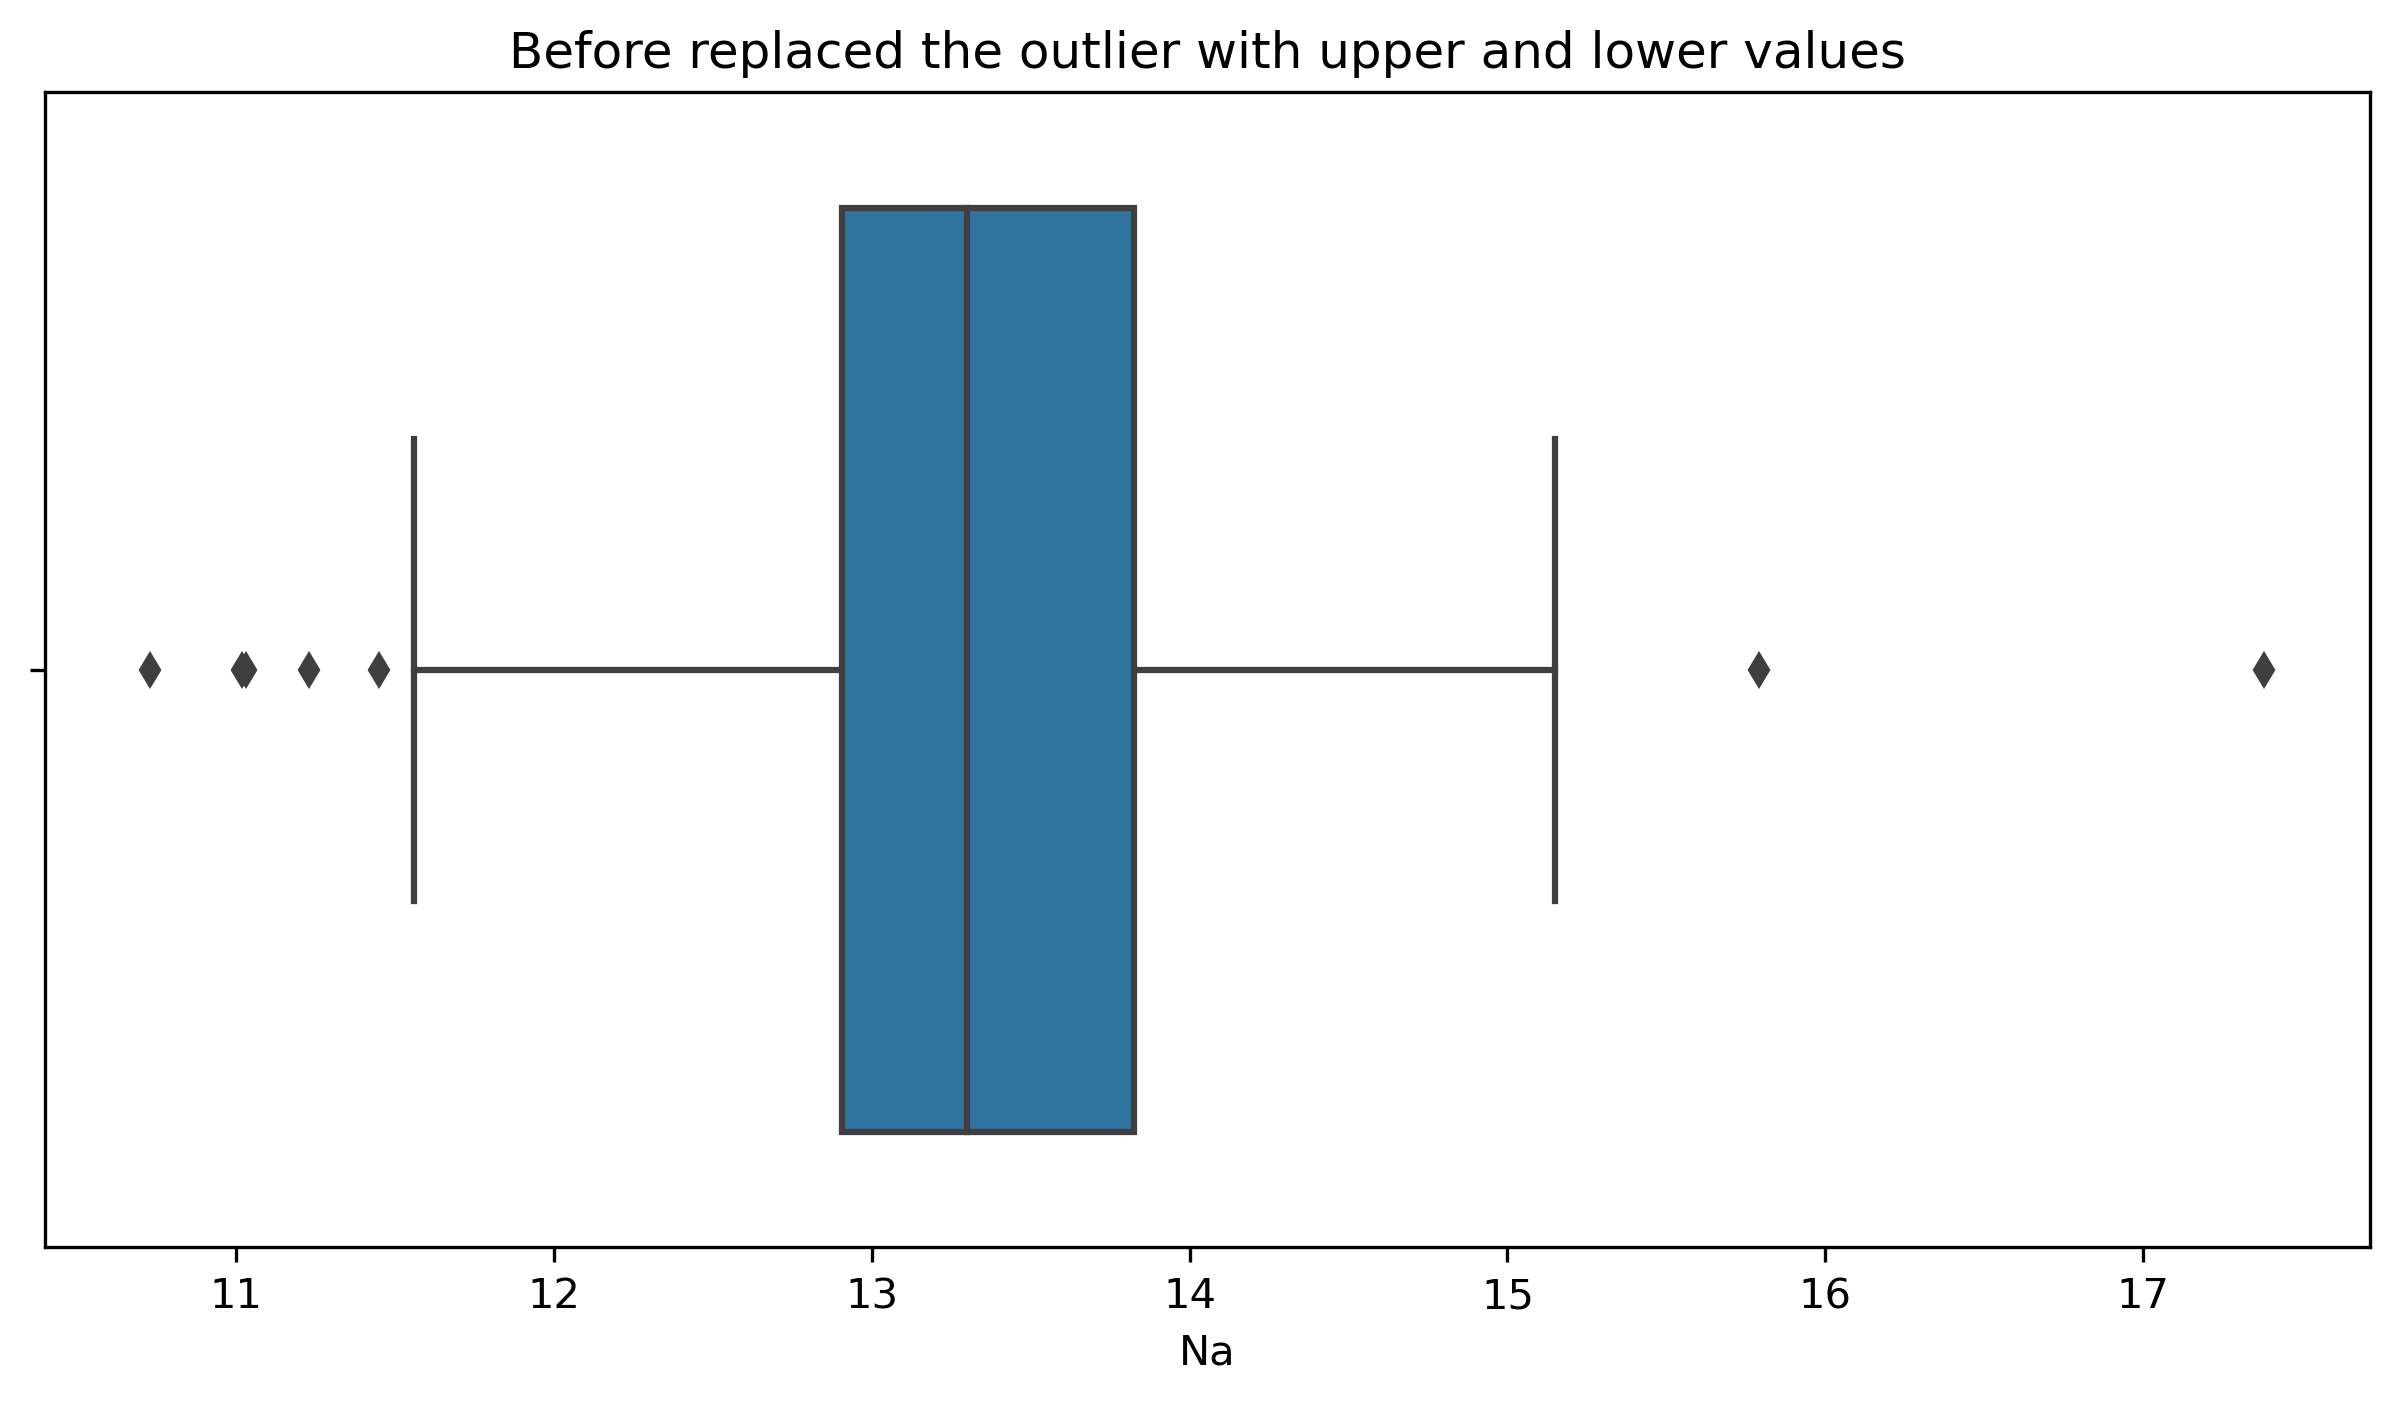

In [151]:
sns.boxplot(x = df["Na"])
plt.xlabel("Na")
plt.title("Before replaced the outlier with upper and lower values")

In [152]:
df[df["Na"]>15.201249999999998]

RI     Na    Mg    Al     Si     K    Ca    Ba   Fe  Type
184  1.512575  17.38  0.00  0.34  75.41  0.00  6.65  0.00  0.0     6
189  1.523110  15.79  1.83  1.31  70.43  0.31  8.61  1.68  0.0     7

In [153]:
df.loc[df["Na"]>15.201249999999998, "Na"] = 15.201249999999998

Text(0.5, 1.0, 'Before replacing the outlier with lower values')

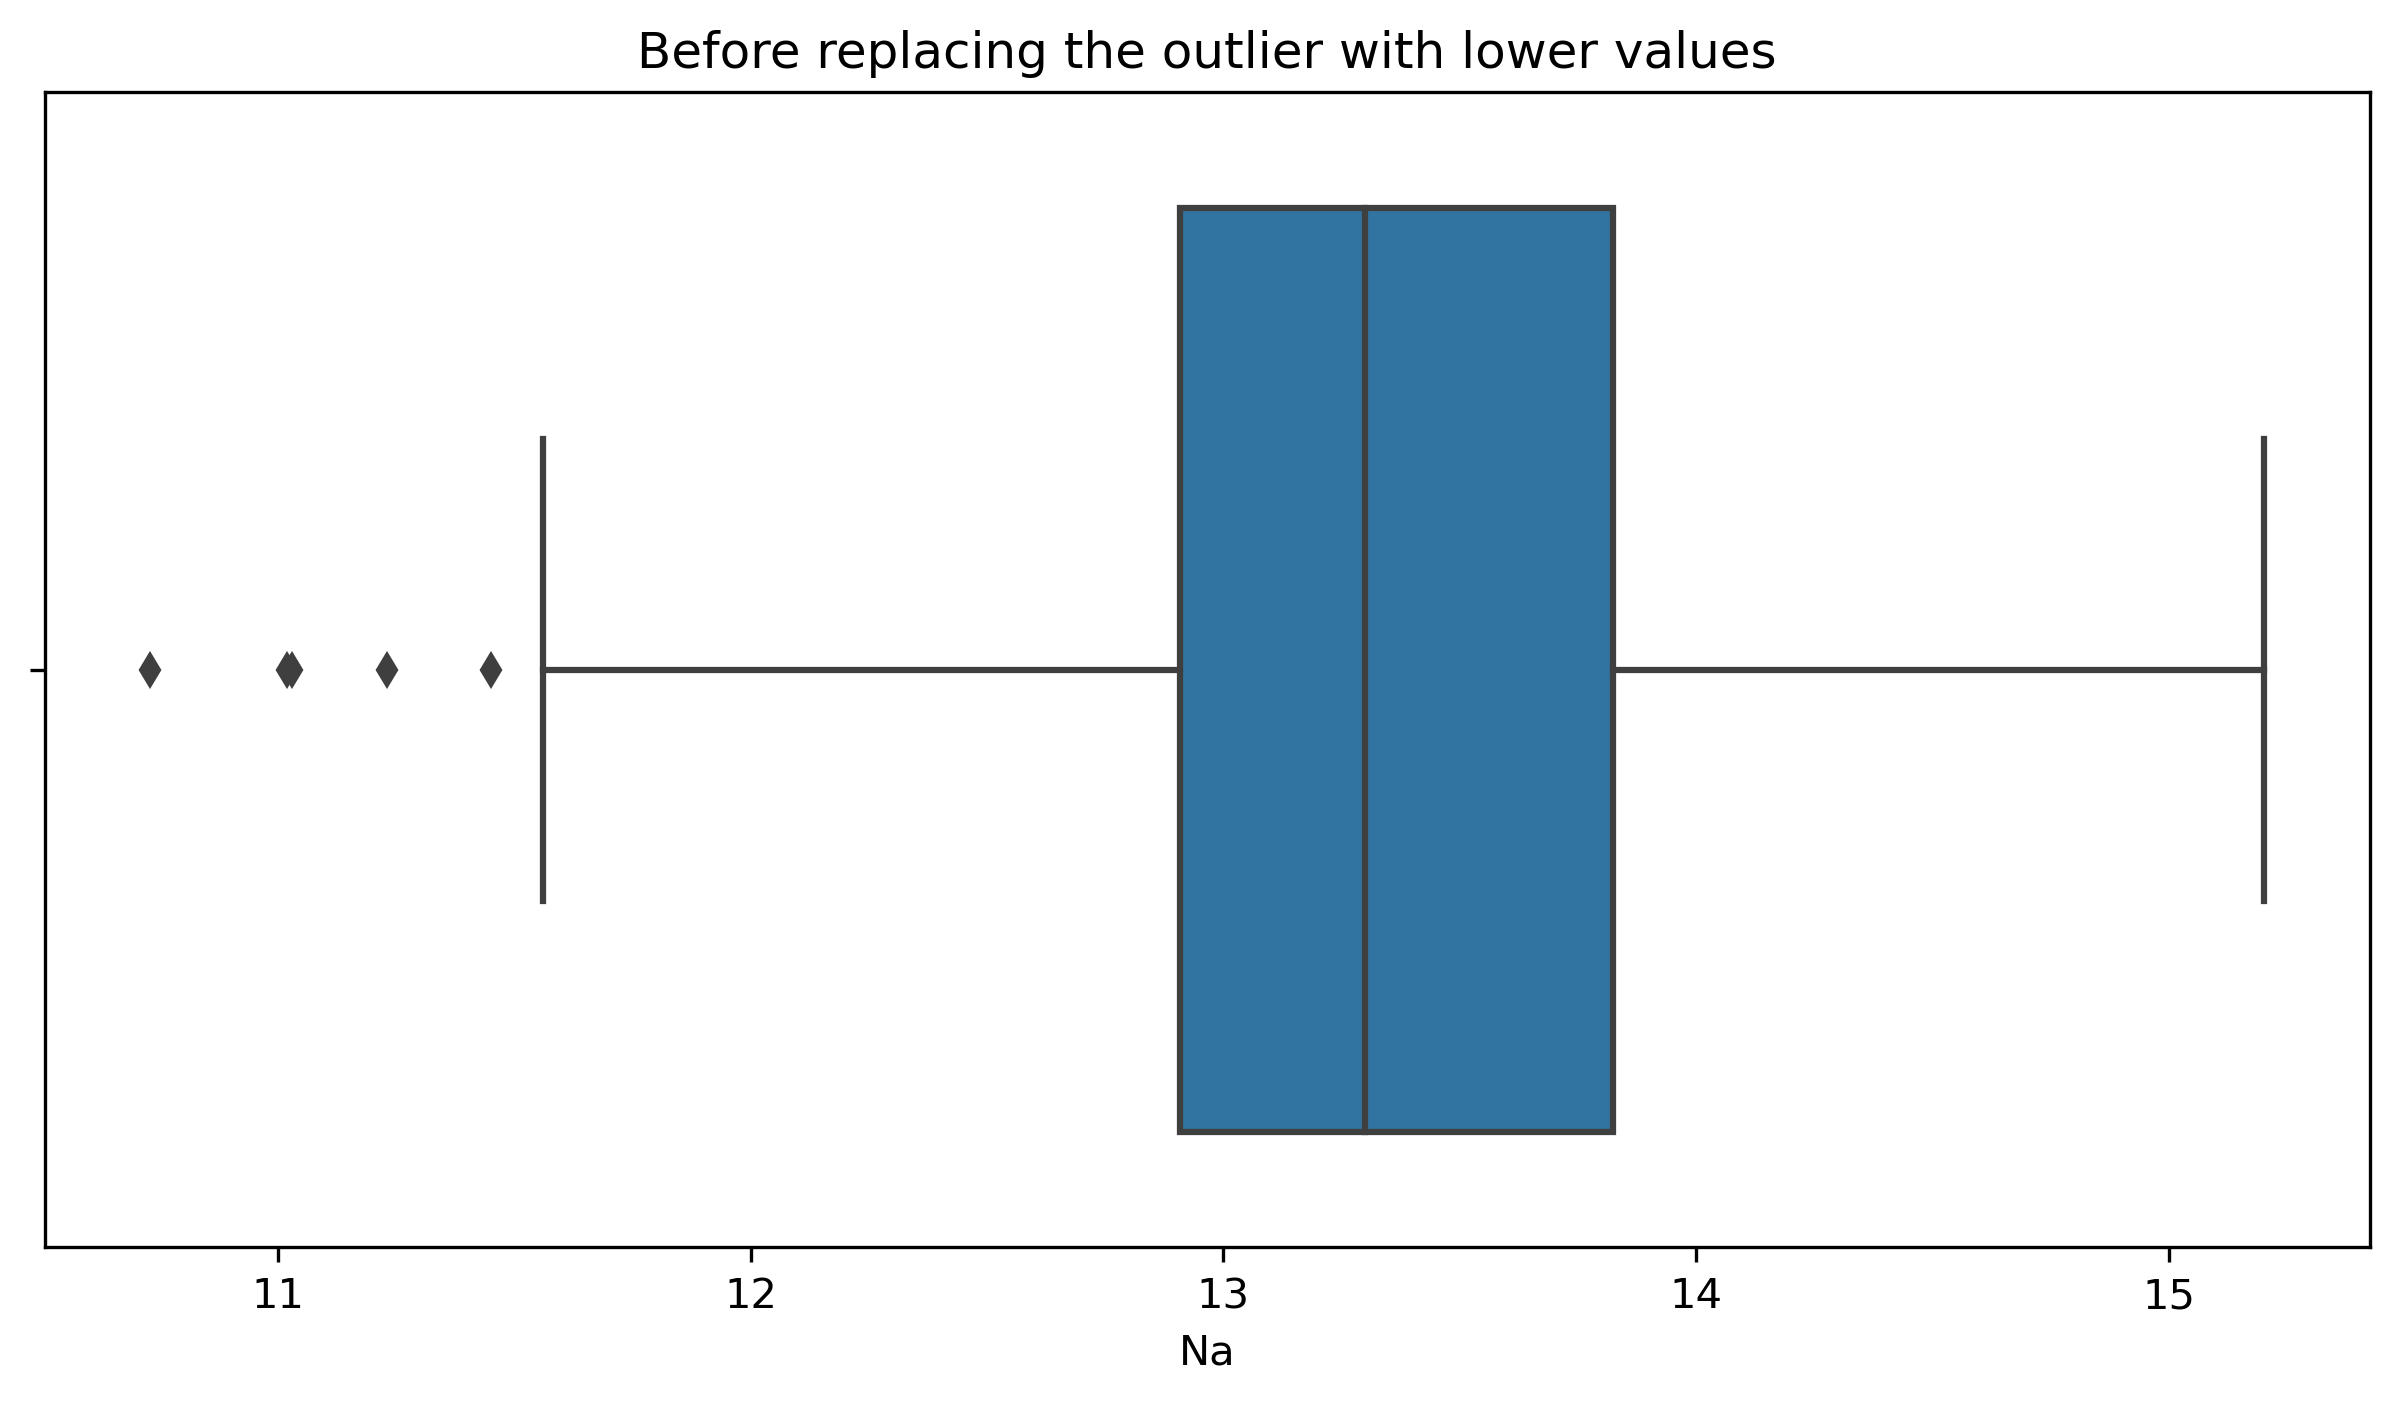

In [154]:
sns.boxplot(x = df["Na"])
plt.xlabel("Na")
plt.title("Before replacing the outlier with lower values")

In [155]:
df[df["Na"]<11.531250000000004]

RI     Na    Mg    Al     Si     K     Ca    Ba    Fe  Type
105  1.52311  11.45  0.00  1.88  72.19  0.81  13.24  0.00  0.34     2
106  1.52311  10.73  0.00  2.10  69.81  0.58  13.30  3.15  0.28     2
110  1.52311  11.23  0.00  0.77  73.21  0.00  14.68  0.00  0.00     2
111  1.52311  11.02  0.00  0.75  73.08  0.00  14.96  0.00  0.00     2
166  1.52151  11.03  1.71  1.56  73.44  0.58  11.62  0.00  0.00     5

In [156]:
df.loc[df["Na"]<11.531250000000004, "Na"] = 11.531250000000004

Text(0.5, 1.0, 'After replaced the outlier with upper and lower values')

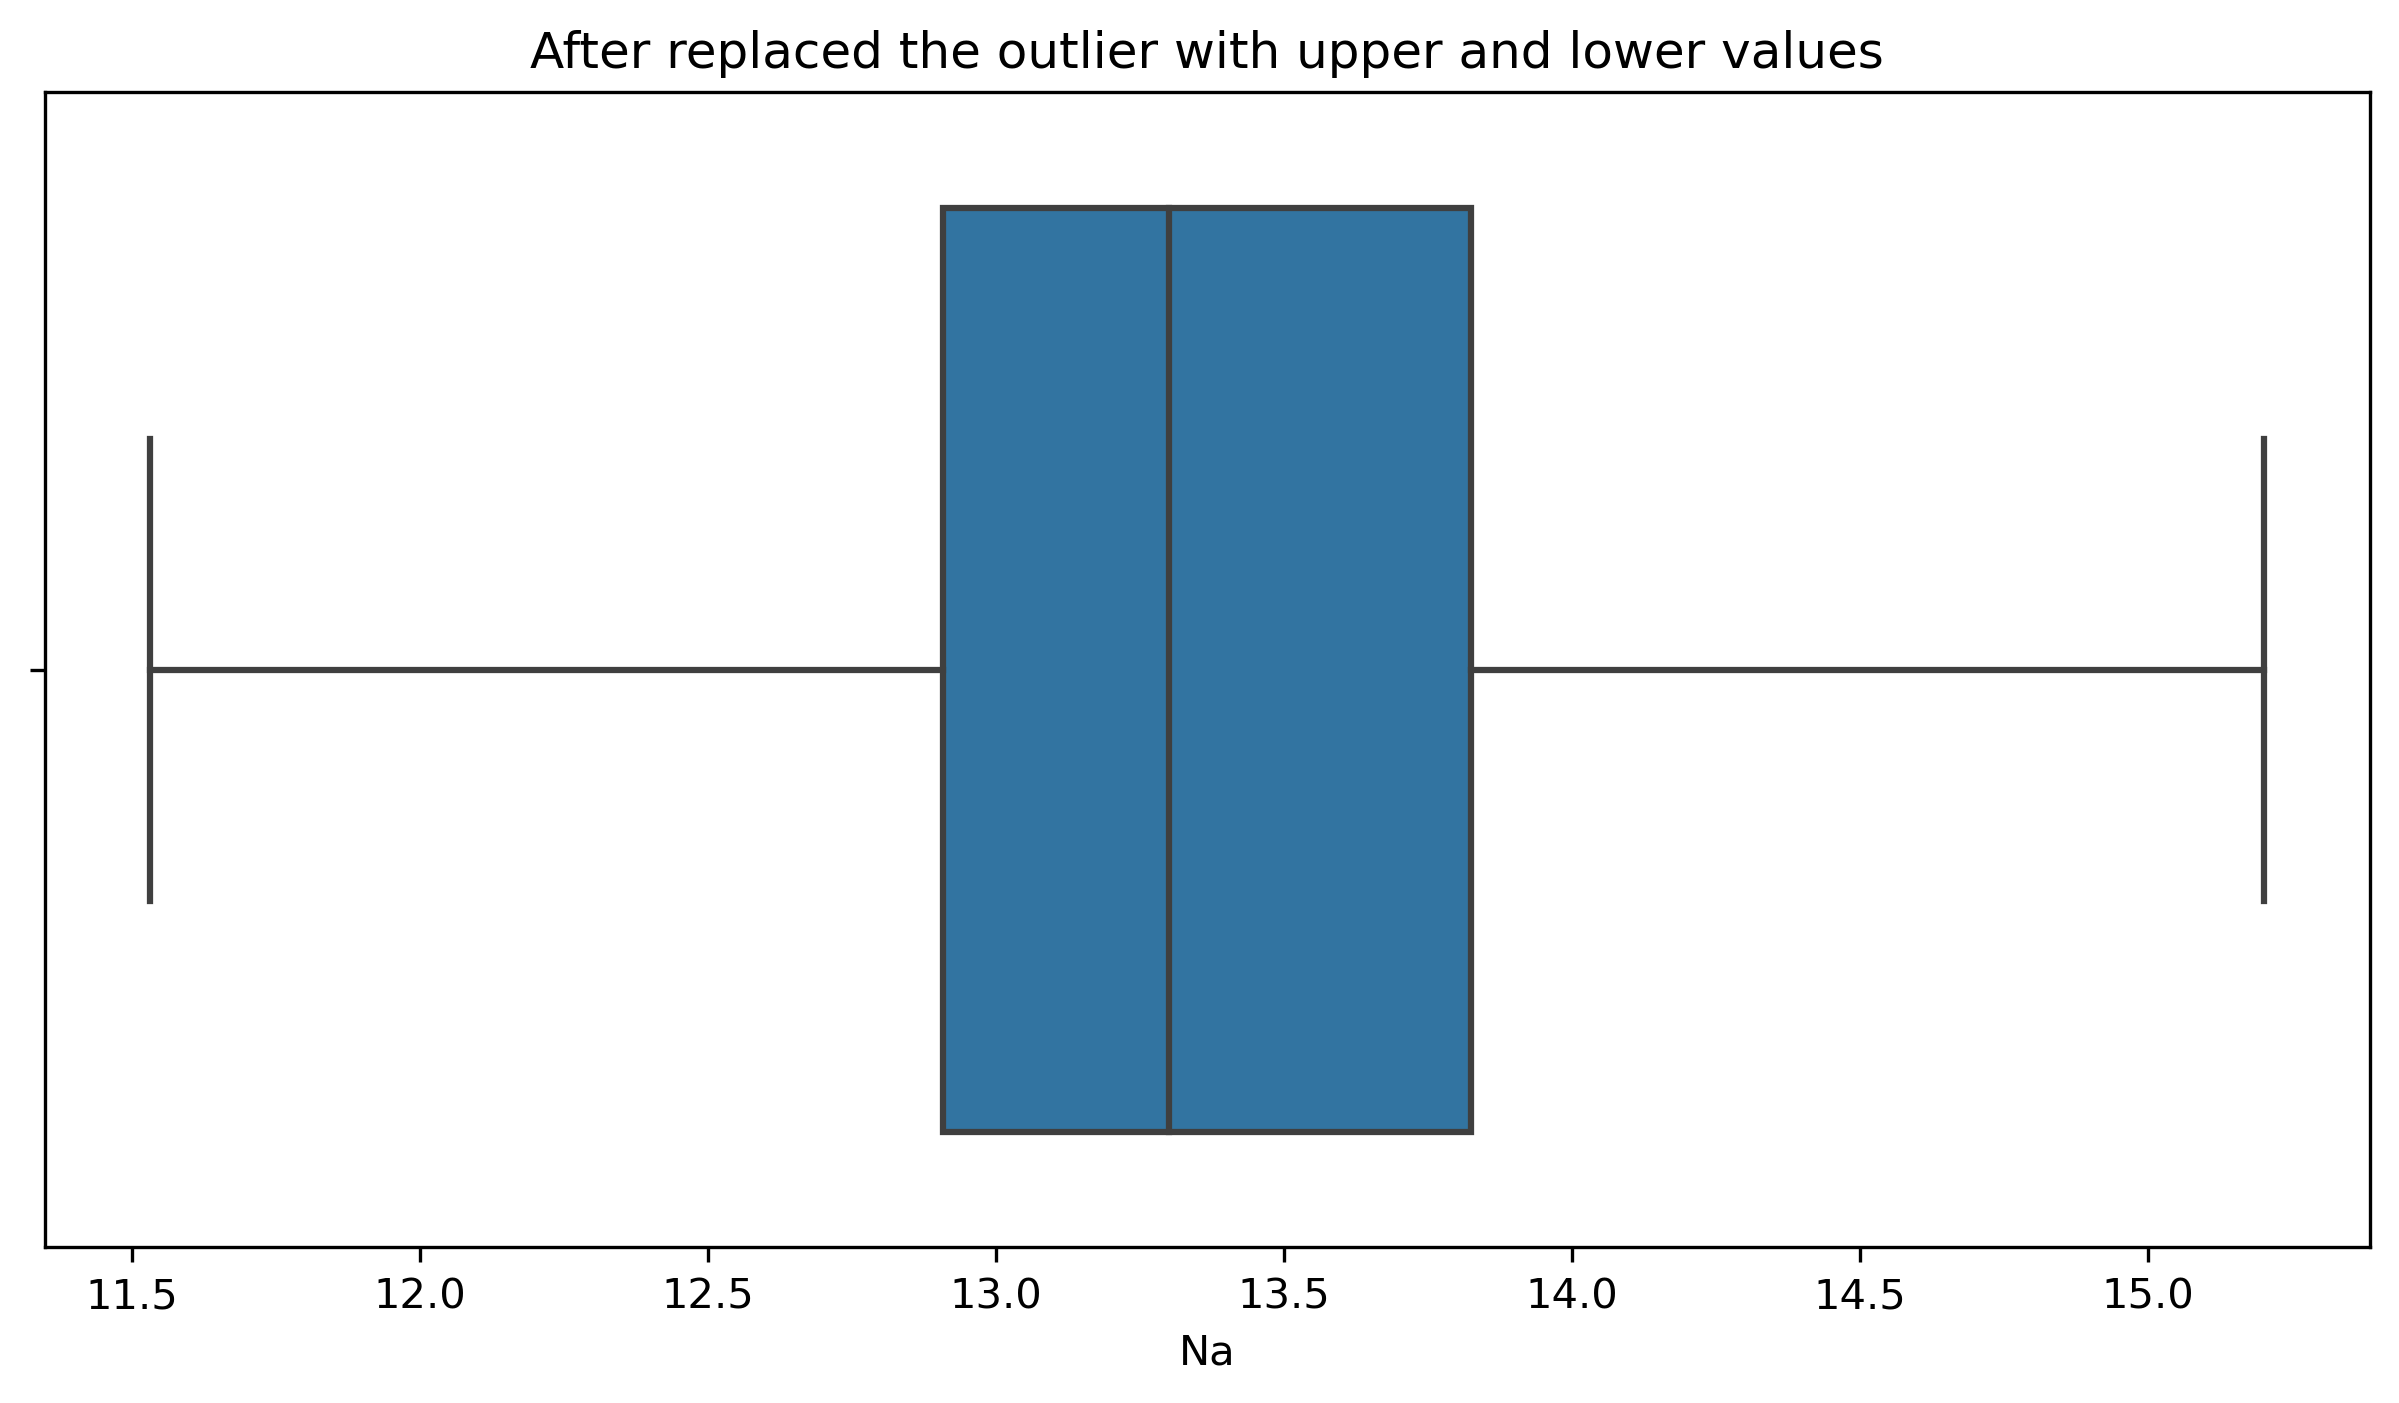

In [157]:
sns.boxplot(x = df["Na"])
plt.xlabel("Na")
plt.title("After replaced the outlier with upper and lower values")

In [158]:
outlier_detection(df, "Al")

(0.53, 2.29)

Text(0.5, 1.0, 'Before replaced the outlier with upper and lower values')

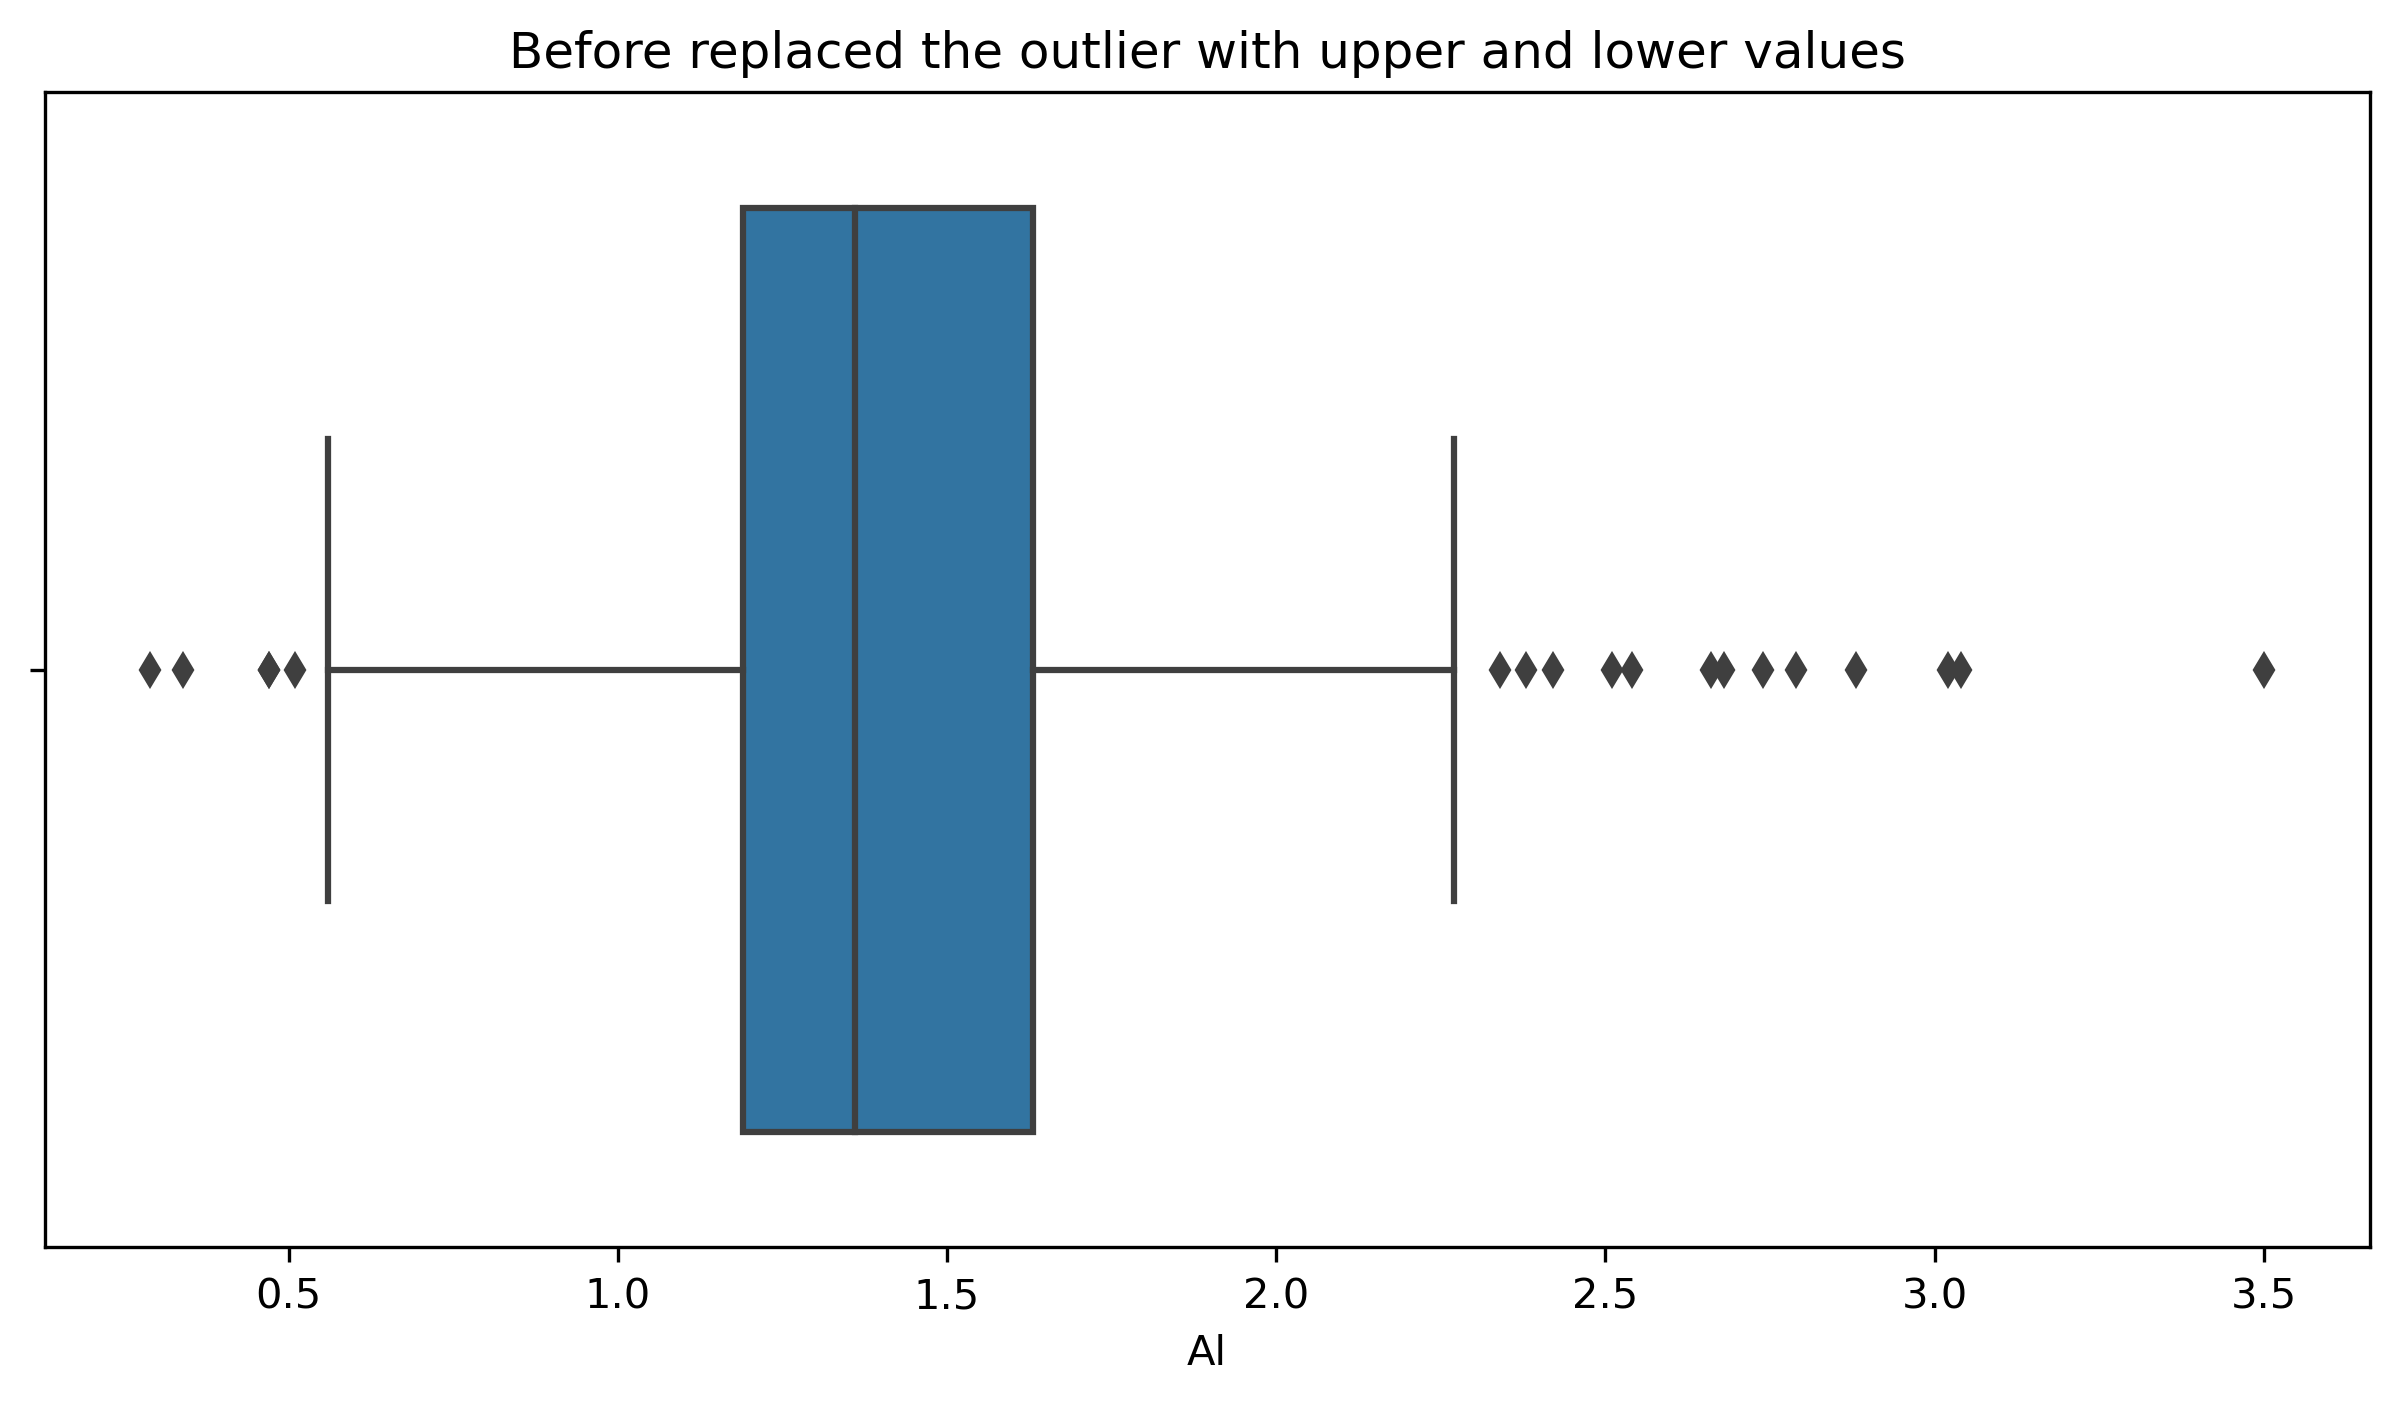

In [159]:
sns.boxplot(x = df["Al"])
plt.xlabel("Al")
plt.title("Before replaced the outlier with upper and lower values")

In [160]:
df[df["Al"]>2.29]

RI     Na    Mg    Al     Si     K    Ca    Ba    Fe  Type
163  1.51514  14.01  2.68  3.50  69.89  1.68  5.87  2.20  0.00     5
171  1.51316  13.02  0.00  3.04  70.48  6.21  6.96  0.00  0.00     5
172  1.51321  13.00  0.00  3.02  70.70  6.21  6.93  0.00  0.00     5
191  1.51602  14.85  0.00  2.38  73.28  0.00  8.76  0.64  0.09     7
192  1.51623  14.20  0.00  2.79  73.46  0.04  9.04  0.40  0.09     7
195  1.51545  14.14  0.00  2.68  73.39  0.08  9.07  0.61  0.05     7
196  1.51556  13.87  0.00  2.54  73.23  0.14  9.41  0.81  0.01     7
197  1.51727  14.70  0.00  2.34  73.28  0.00  8.95  0.66  0.00     7
198  1.51531  14.38  0.00  2.66  73.10  0.04  9.08  0.64  0.00     7
199  1.51609  15.01  0.00  2.51  73.05  0.05  8.83  0.53  0.00     7
202  1.51514  14.85  0.00  2.42  73.72  0.00  8.39  0.56  0.00     7
208  1.51640  14.37  0.00  2.74  72.85  0.00  9.45  0.54  0.00     7
209  1.51623  14.14  0.00  2.88  72.61  0.08  9.18  1.06  0.00     7

In [161]:
df.loc[df["Al"]>2.29, "Al"] = 2.29

Text(0.5, 1.0, 'Before replaced the outlier with lower values')

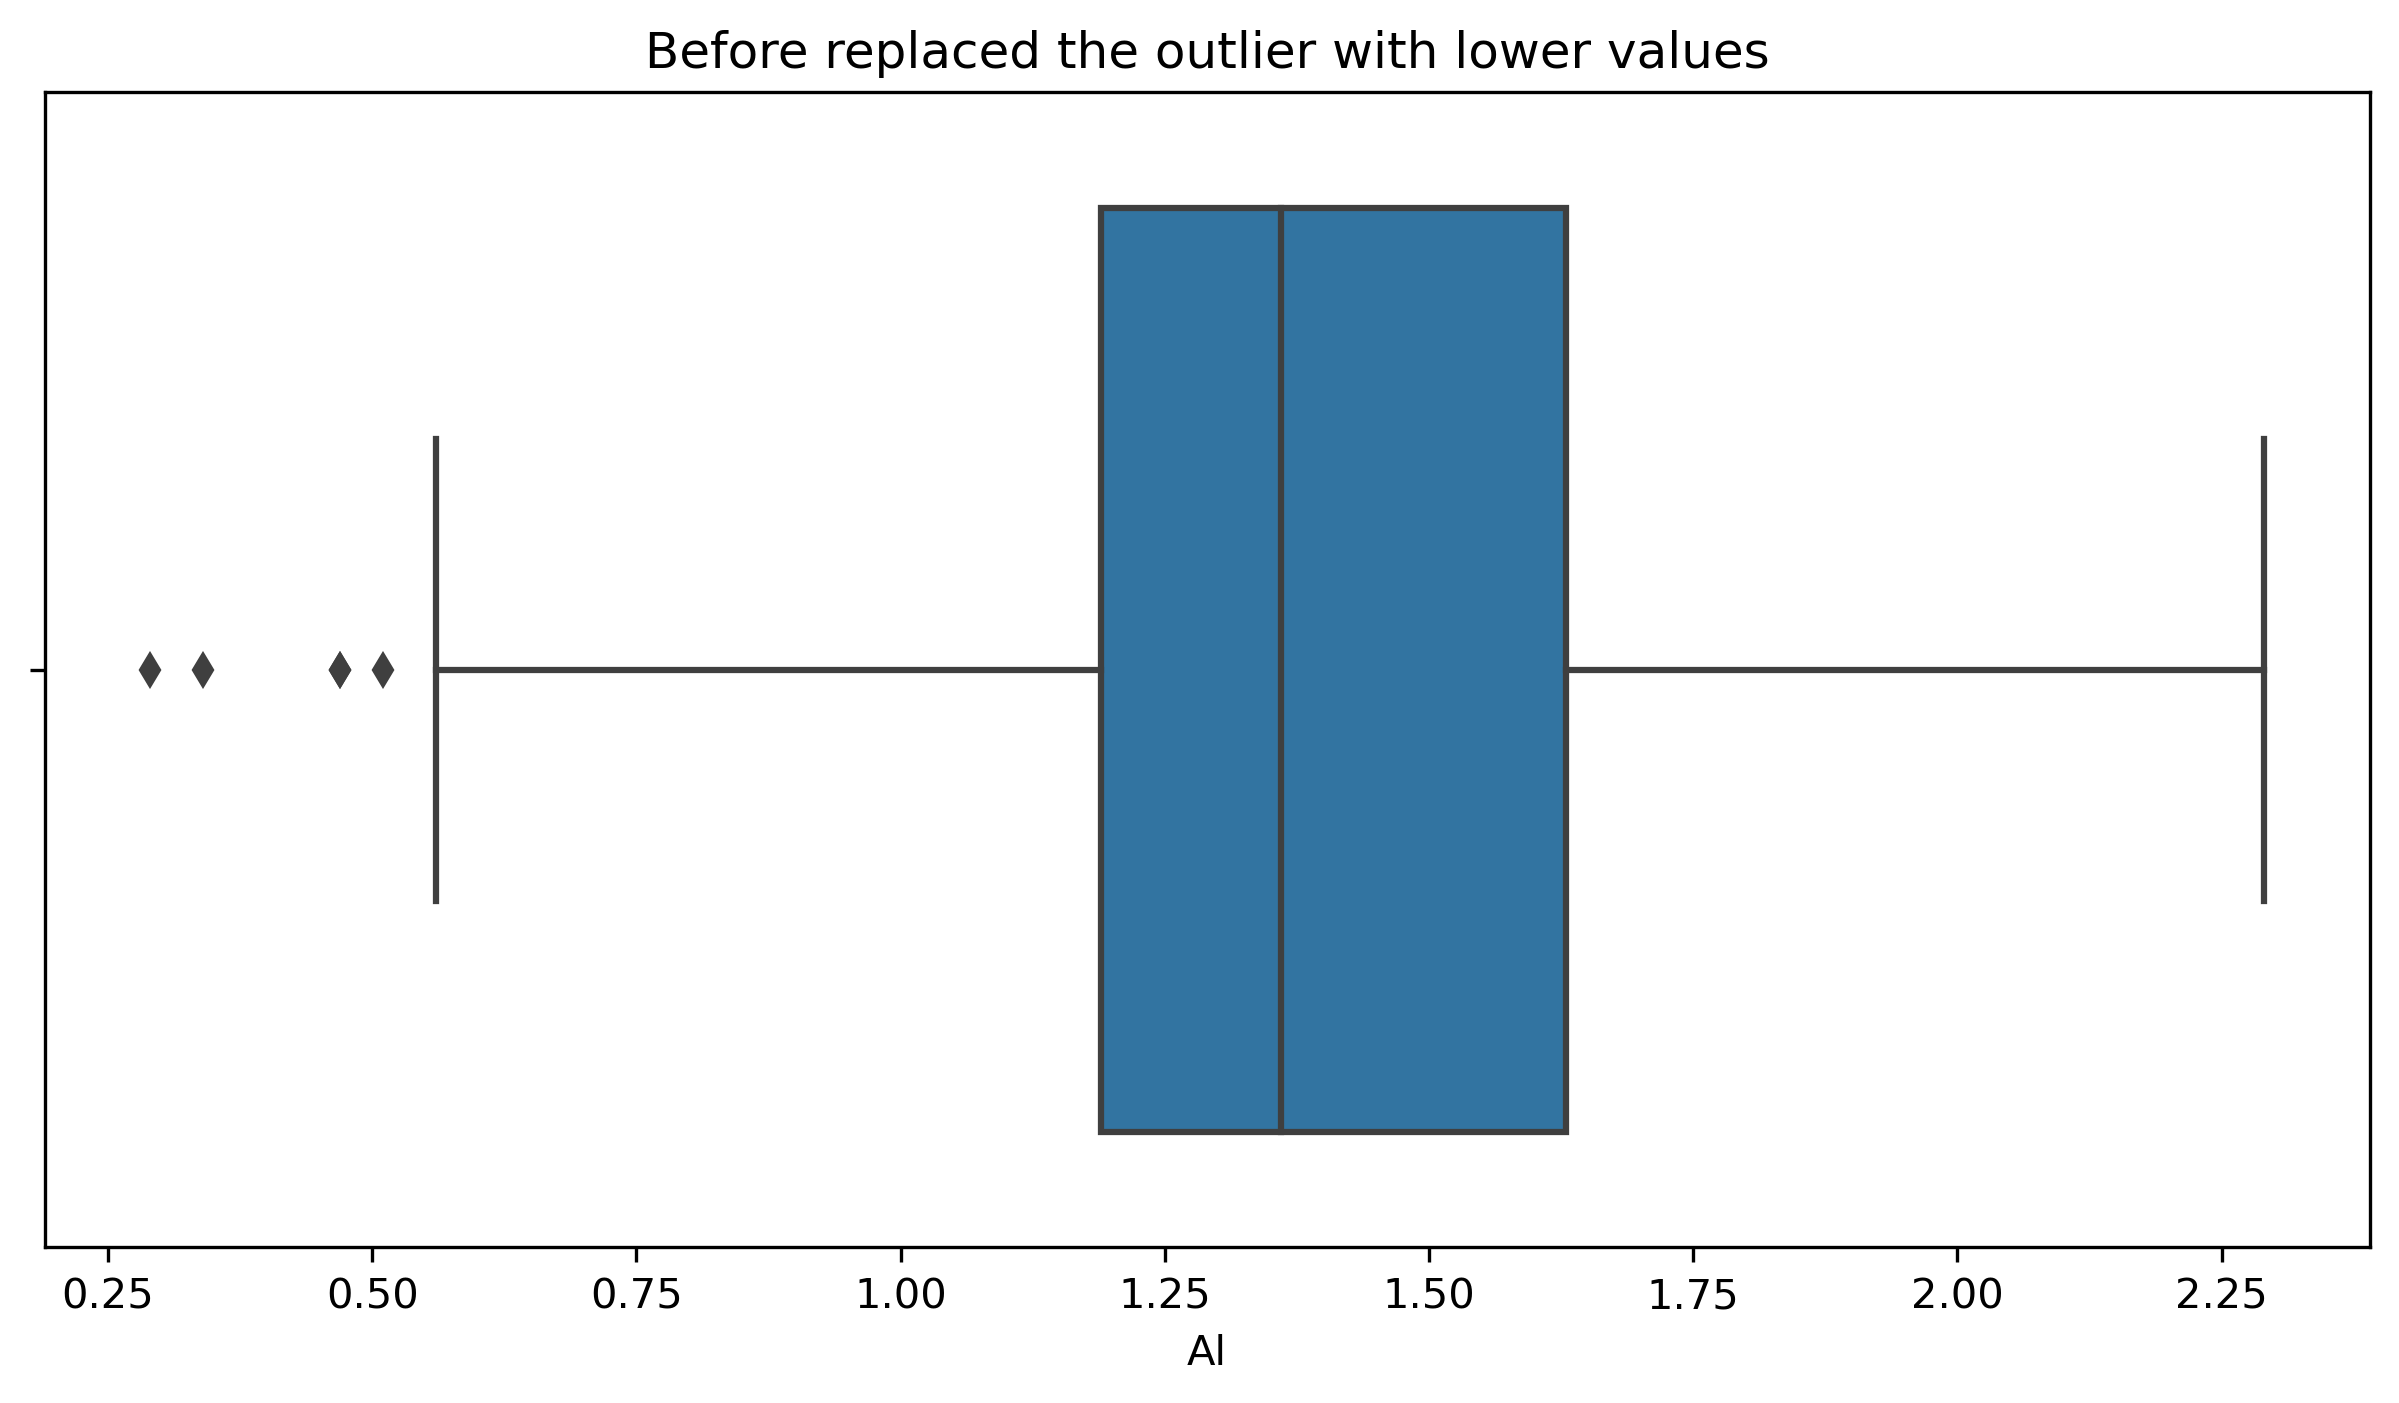

In [162]:
sns.boxplot(x = df["Al"])
plt.xlabel("Al")
plt.title("Before replaced the outlier with lower values")

In [163]:
df[df["Al"]<0.53]

RI        Na    Mg    Al     Si     K     Ca   Ba    Fe  Type
21   1.519660  14.77000  3.75  0.29  72.02  0.03   9.00  0.0  0.00     1
38   1.522130  14.21000  3.82  0.47  71.77  0.11   9.57  0.0  0.00     1
39   1.522130  14.21000  3.82  0.47  71.77  0.11   9.57  0.0  0.00     1
50   1.523110  13.72000  3.72  0.51  71.75  0.09  10.06  0.0  0.16     1
184  1.512575  15.20125  0.00  0.34  75.41  0.00   6.65  0.0  0.00     6

In [164]:
df.loc[df["Al"]<0.53, "Al"] = 0.53

Text(0.5, 1.0, 'After replaced the outlier with upper and lower values')

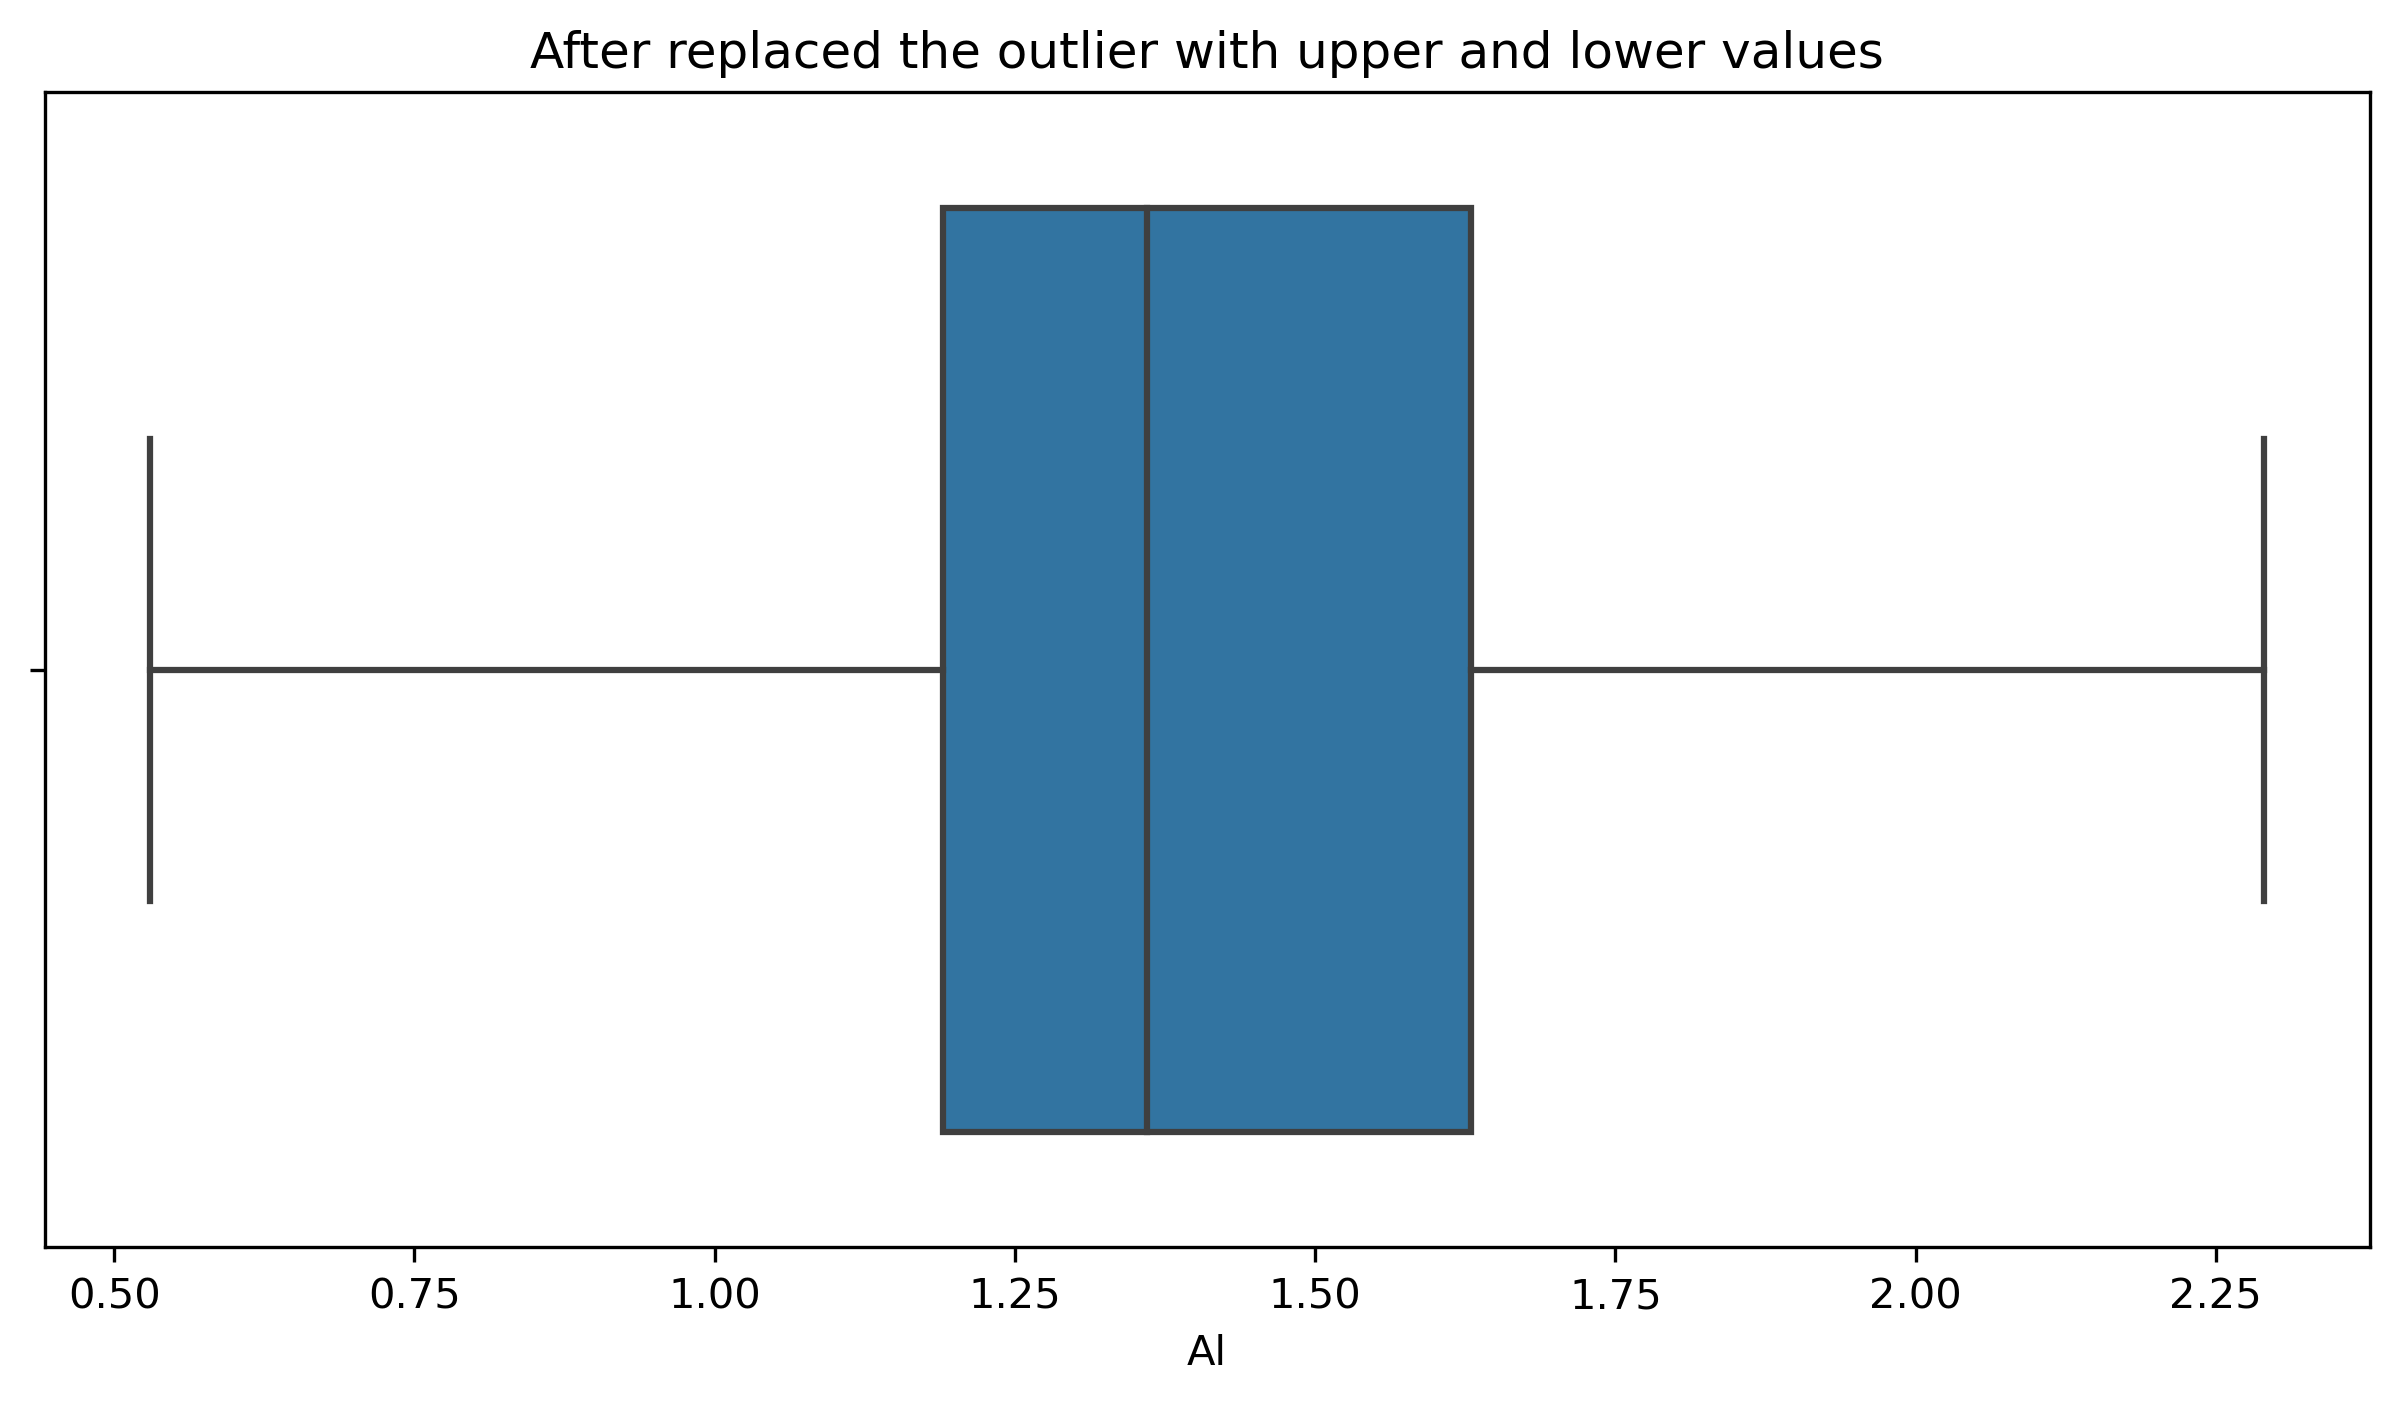

In [165]:
sns.boxplot(x = df["Al"])
plt.xlabel("Al")
plt.title("After replaced the outlier with upper and lower values")

In [166]:
outlier_detection(df, "Si")

(71.06875, 74.29875000000001)

Text(0.5, 1.0, 'Before replaceing the outlier with upper and lower values')

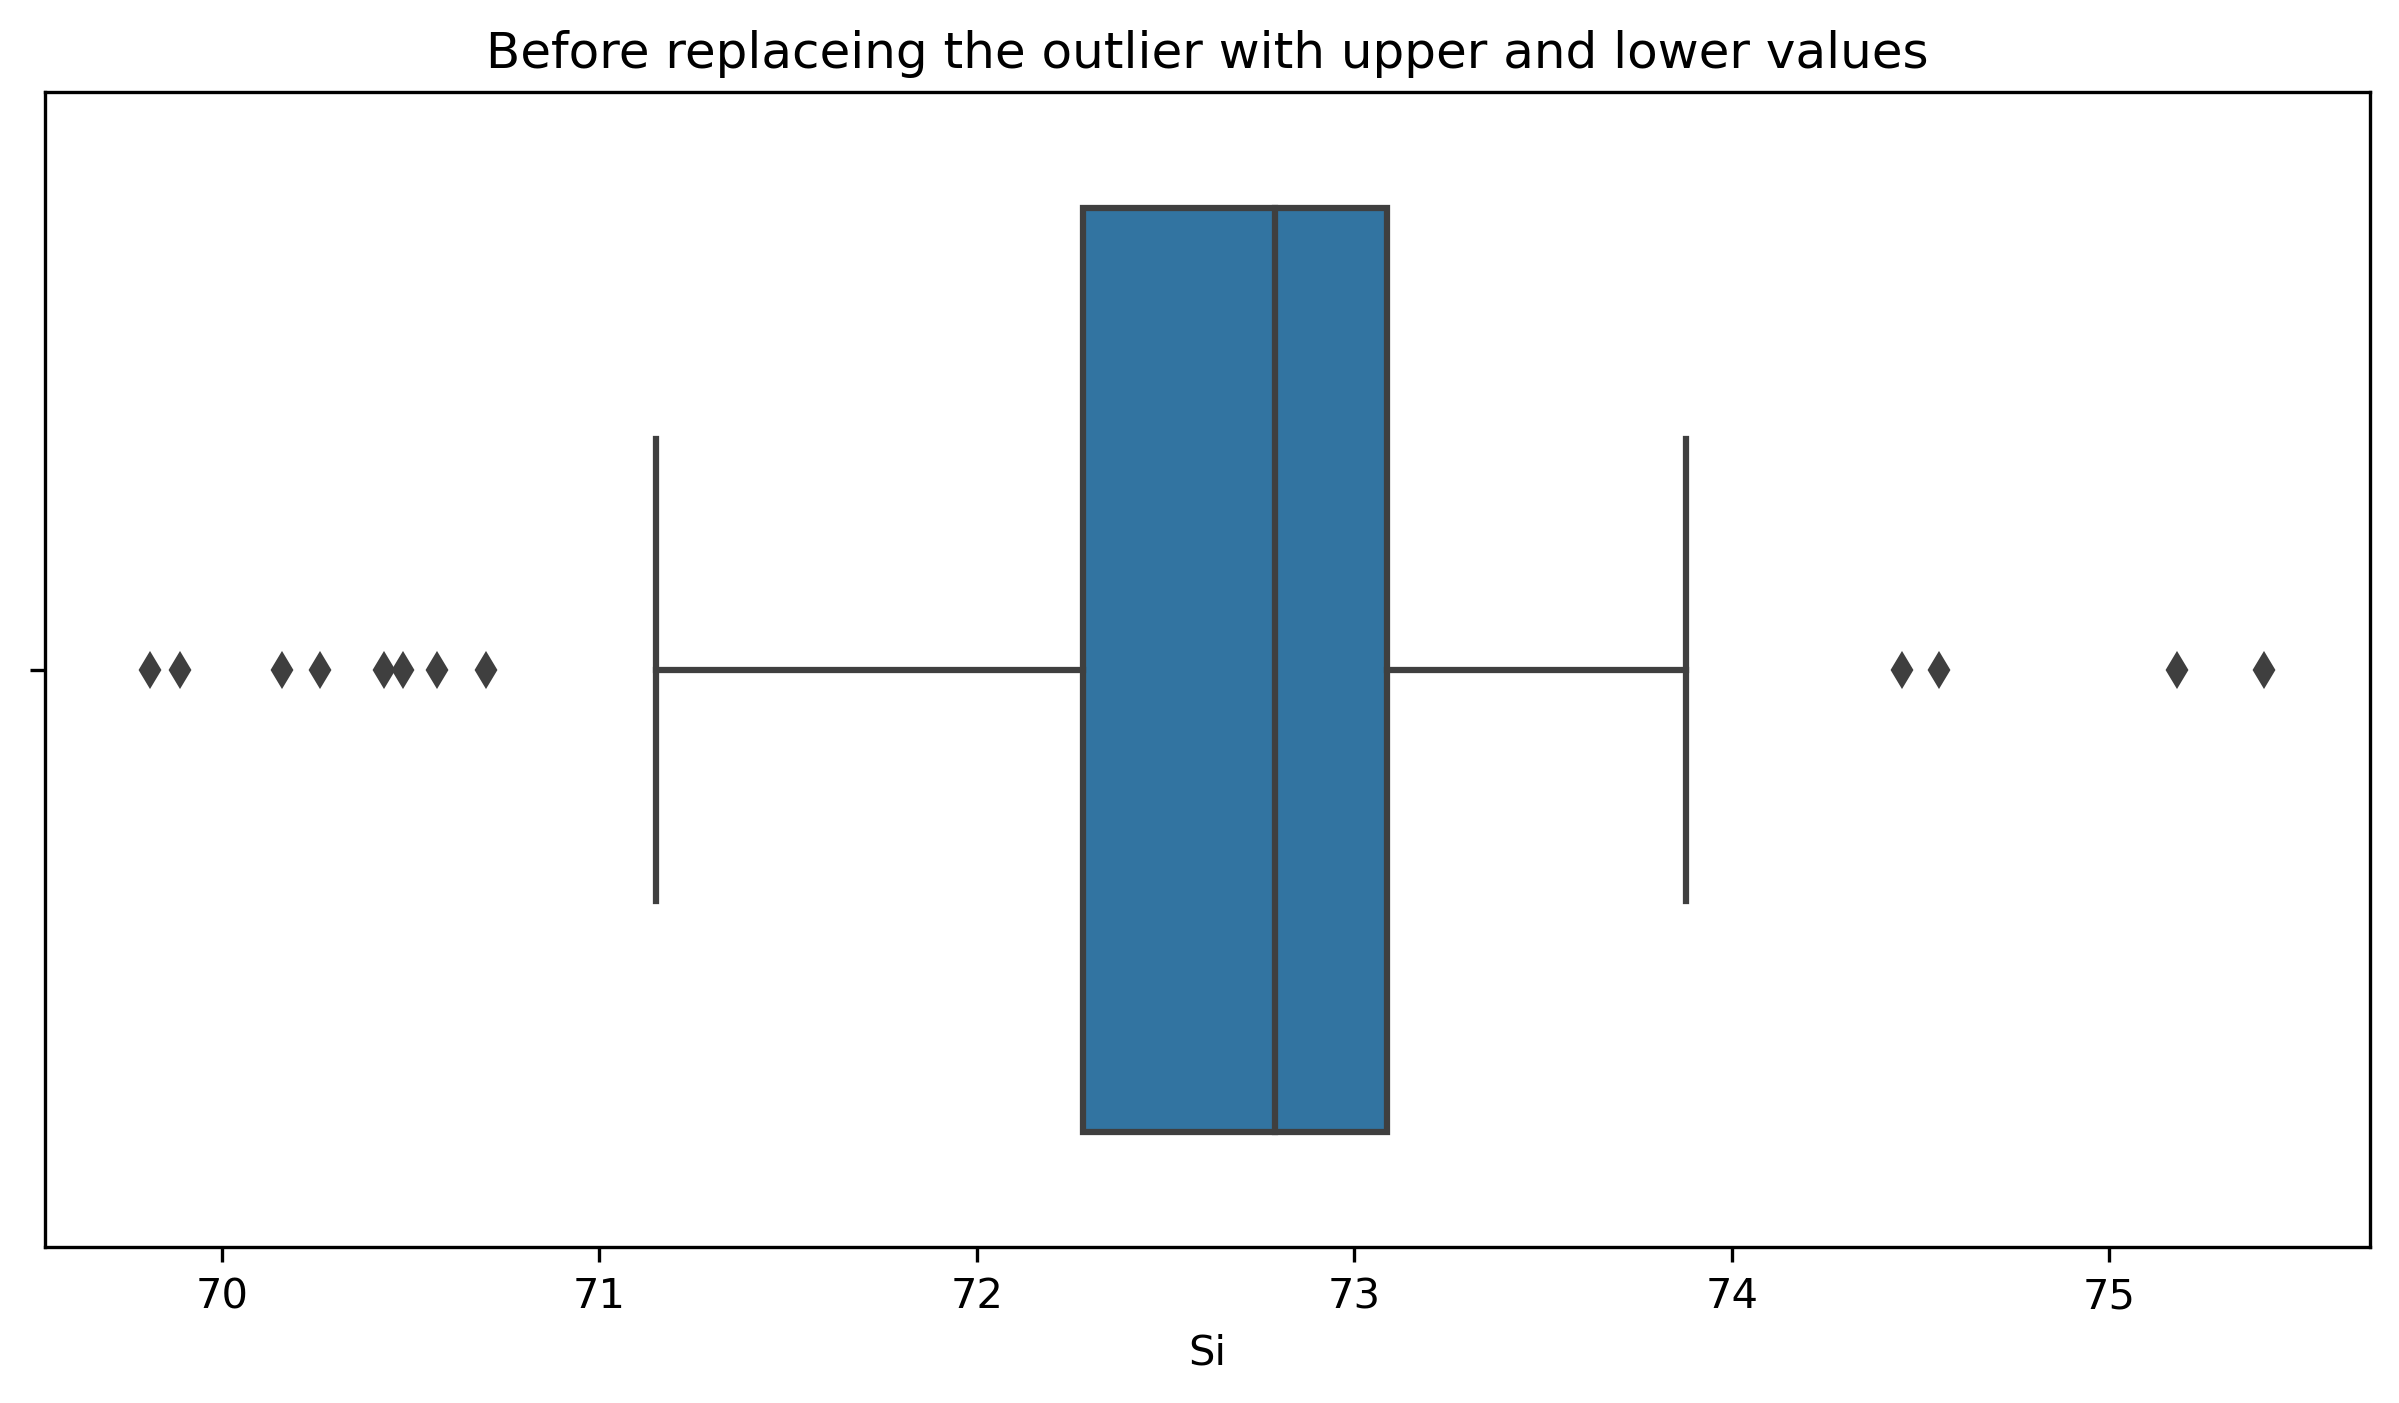

In [167]:
sns.boxplot(x = df["Si"])
plt.xlabel("Si")
plt.title("Before replaceing the outlier with upper and lower values")

In [168]:
df[df["Si"]>74.29875000000001]

RI        Na    Mg    Al     Si    K     Ca   Ba   Fe  Type
109  1.518180  13.72000  0.00  0.56  74.45  0.0  10.99  0.0  0.0     2
180  1.512990  14.40000  1.74  1.54  74.55  0.0   7.59  0.0  0.0     6
184  1.512575  15.20125  0.00  0.53  75.41  0.0   6.65  0.0  0.0     6
201  1.516530  11.95000  0.00  1.19  75.18  2.7   8.93  0.0  0.0     7

In [169]:
df.loc[df["Si"]>74.29875000000001, "Si"] = 74.29875000000001

Text(0.5, 1.0, 'Before replaceing the outlier with lower values')

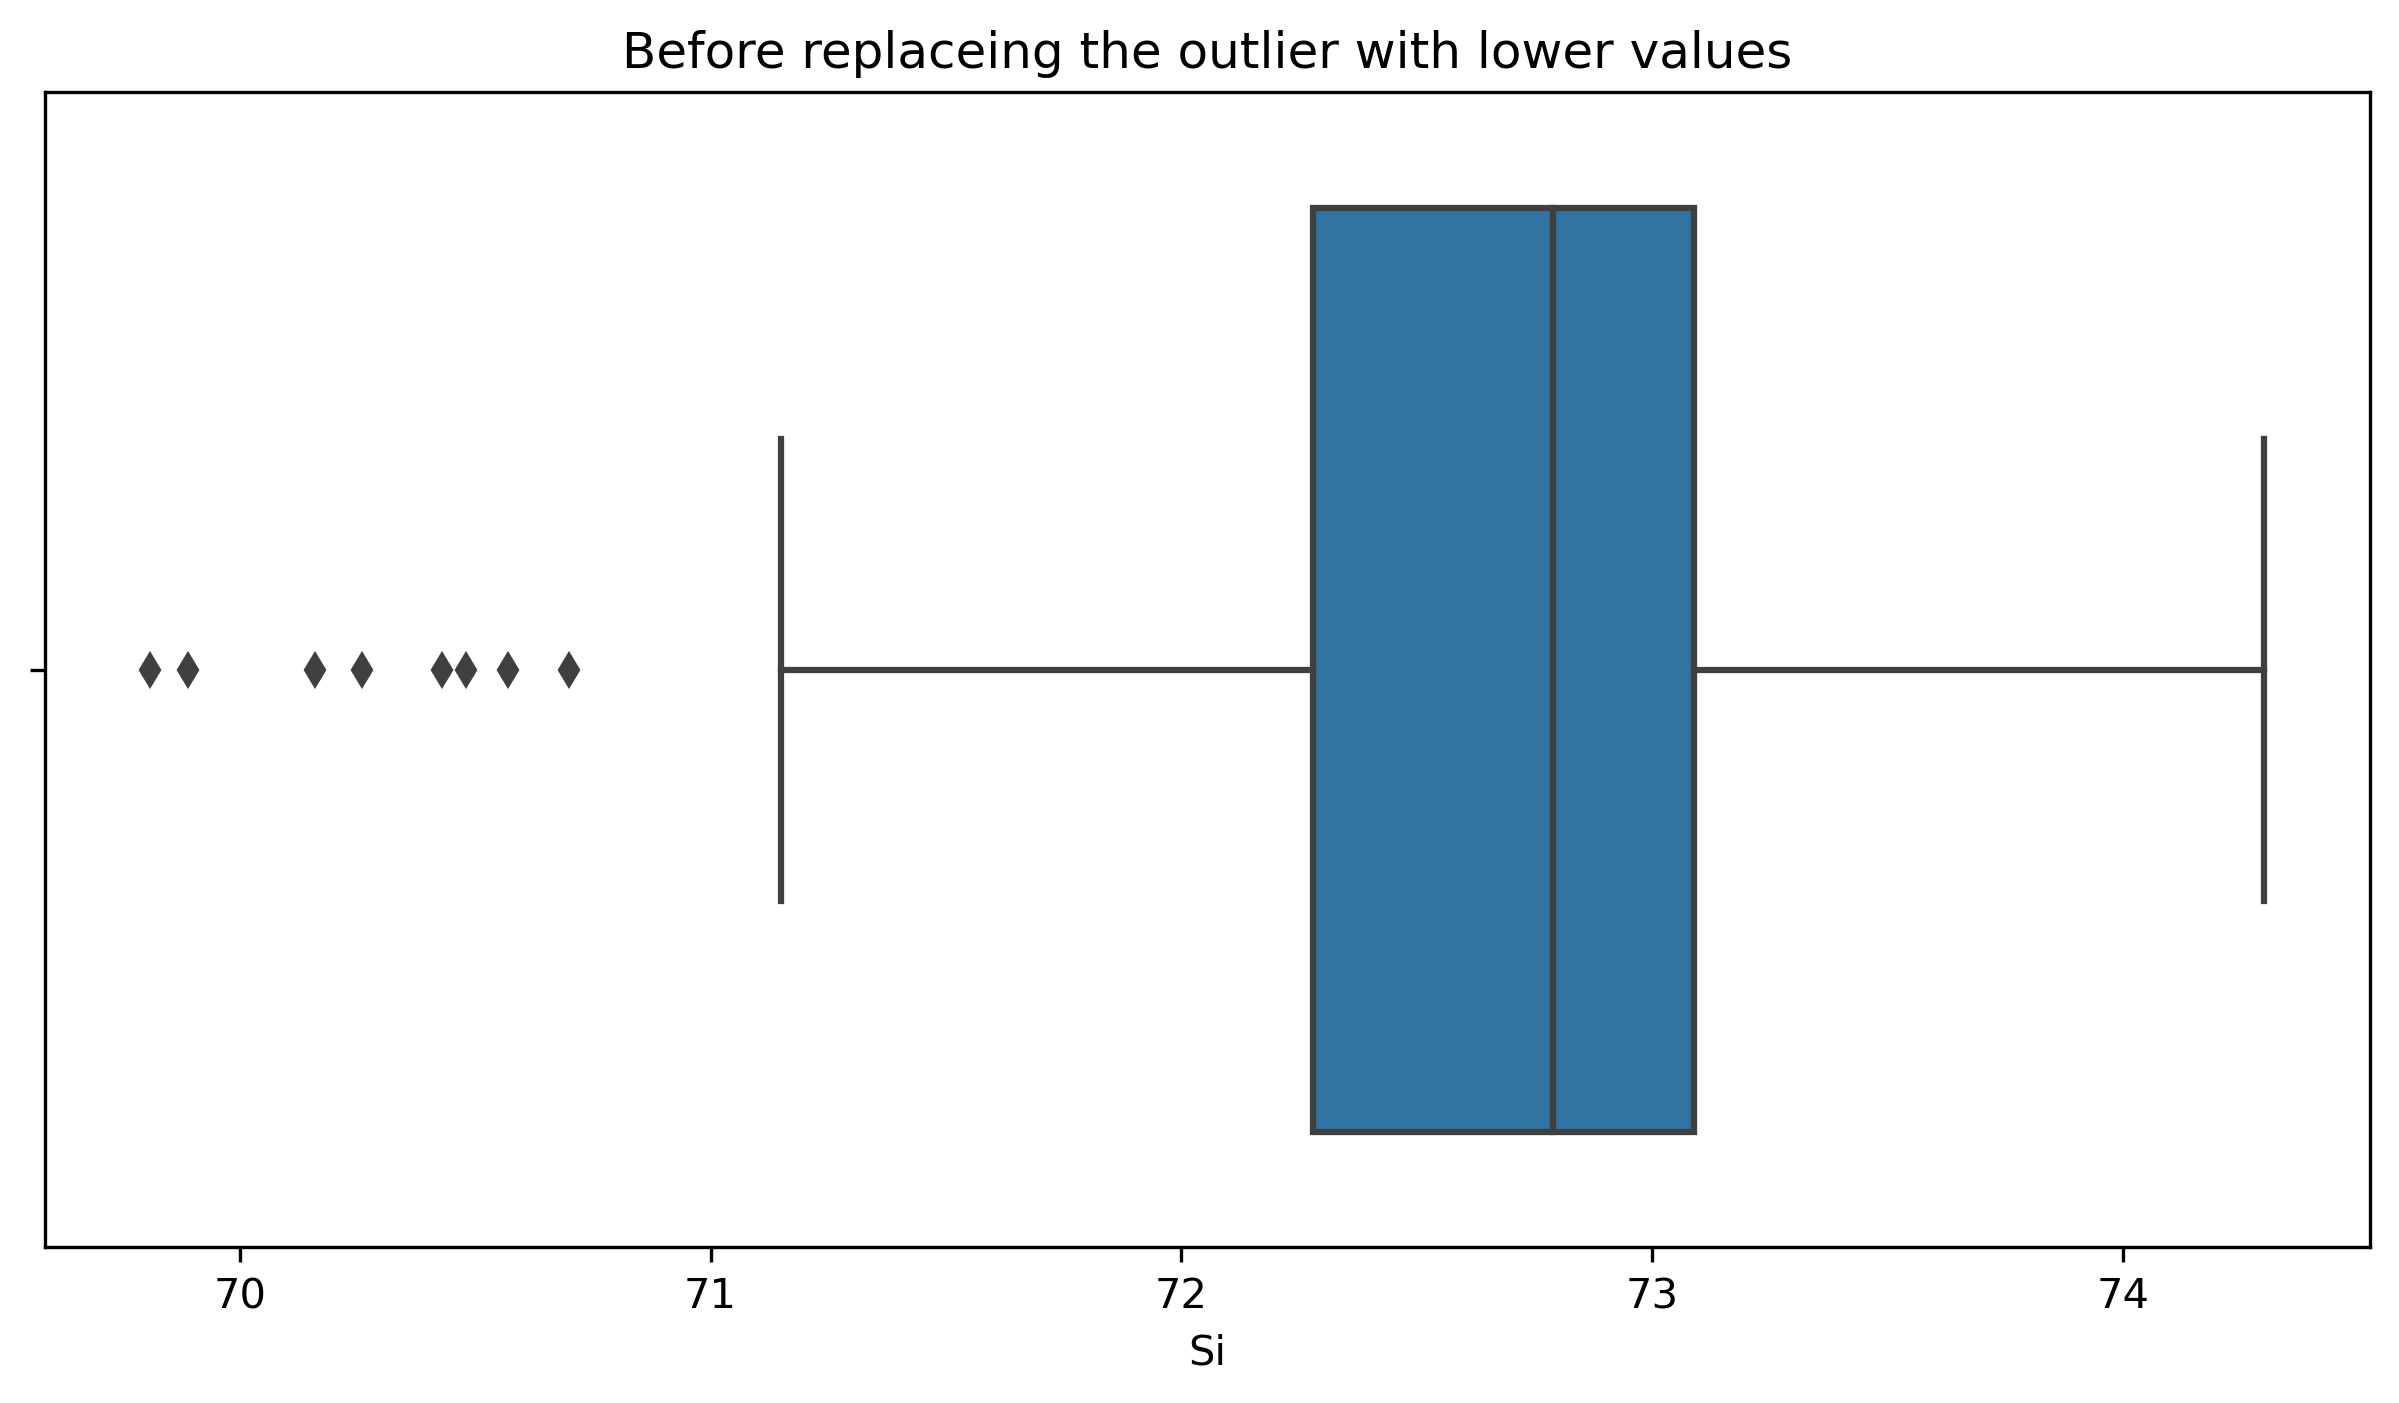

In [170]:
sns.boxplot(x = df["Si"])
plt.xlabel("Si")
plt.title("Before replaceing the outlier with lower values")

In [171]:
df[df["Si"]<71.06875]

RI        Na    Mg    Al     Si     K     Ca    Ba    Fe  Type
103  1.52311  13.80000  3.15  0.66  70.57  0.08  11.64  0.00  0.00     2
106  1.52311  11.53125  0.00  2.10  69.81  0.58  13.30  3.15  0.28     2
107  1.52311  12.30000  0.00  1.00  70.16  0.12  16.19  0.00  0.24     2
163  1.51514  14.01000  2.68  2.29  69.89  1.68   5.87  2.20  0.00     5
171  1.51316  13.02000  0.00  2.29  70.48  6.21   6.96  0.00  0.00     5
172  1.51321  13.00000  0.00  2.29  70.70  6.21   6.93  0.00  0.00     5
188  1.52247  14.86000  2.20  2.06  70.26  0.76   9.76  0.00  0.00     7
189  1.52311  15.20125  1.83  1.31  70.43  0.31   8.61  1.68  0.00     7

In [172]:
df.loc[df["Si"]<71.06875, "Si"] = 71.06875

Text(0.5, 1.0, 'After replaced the outlier with lower and upper values')

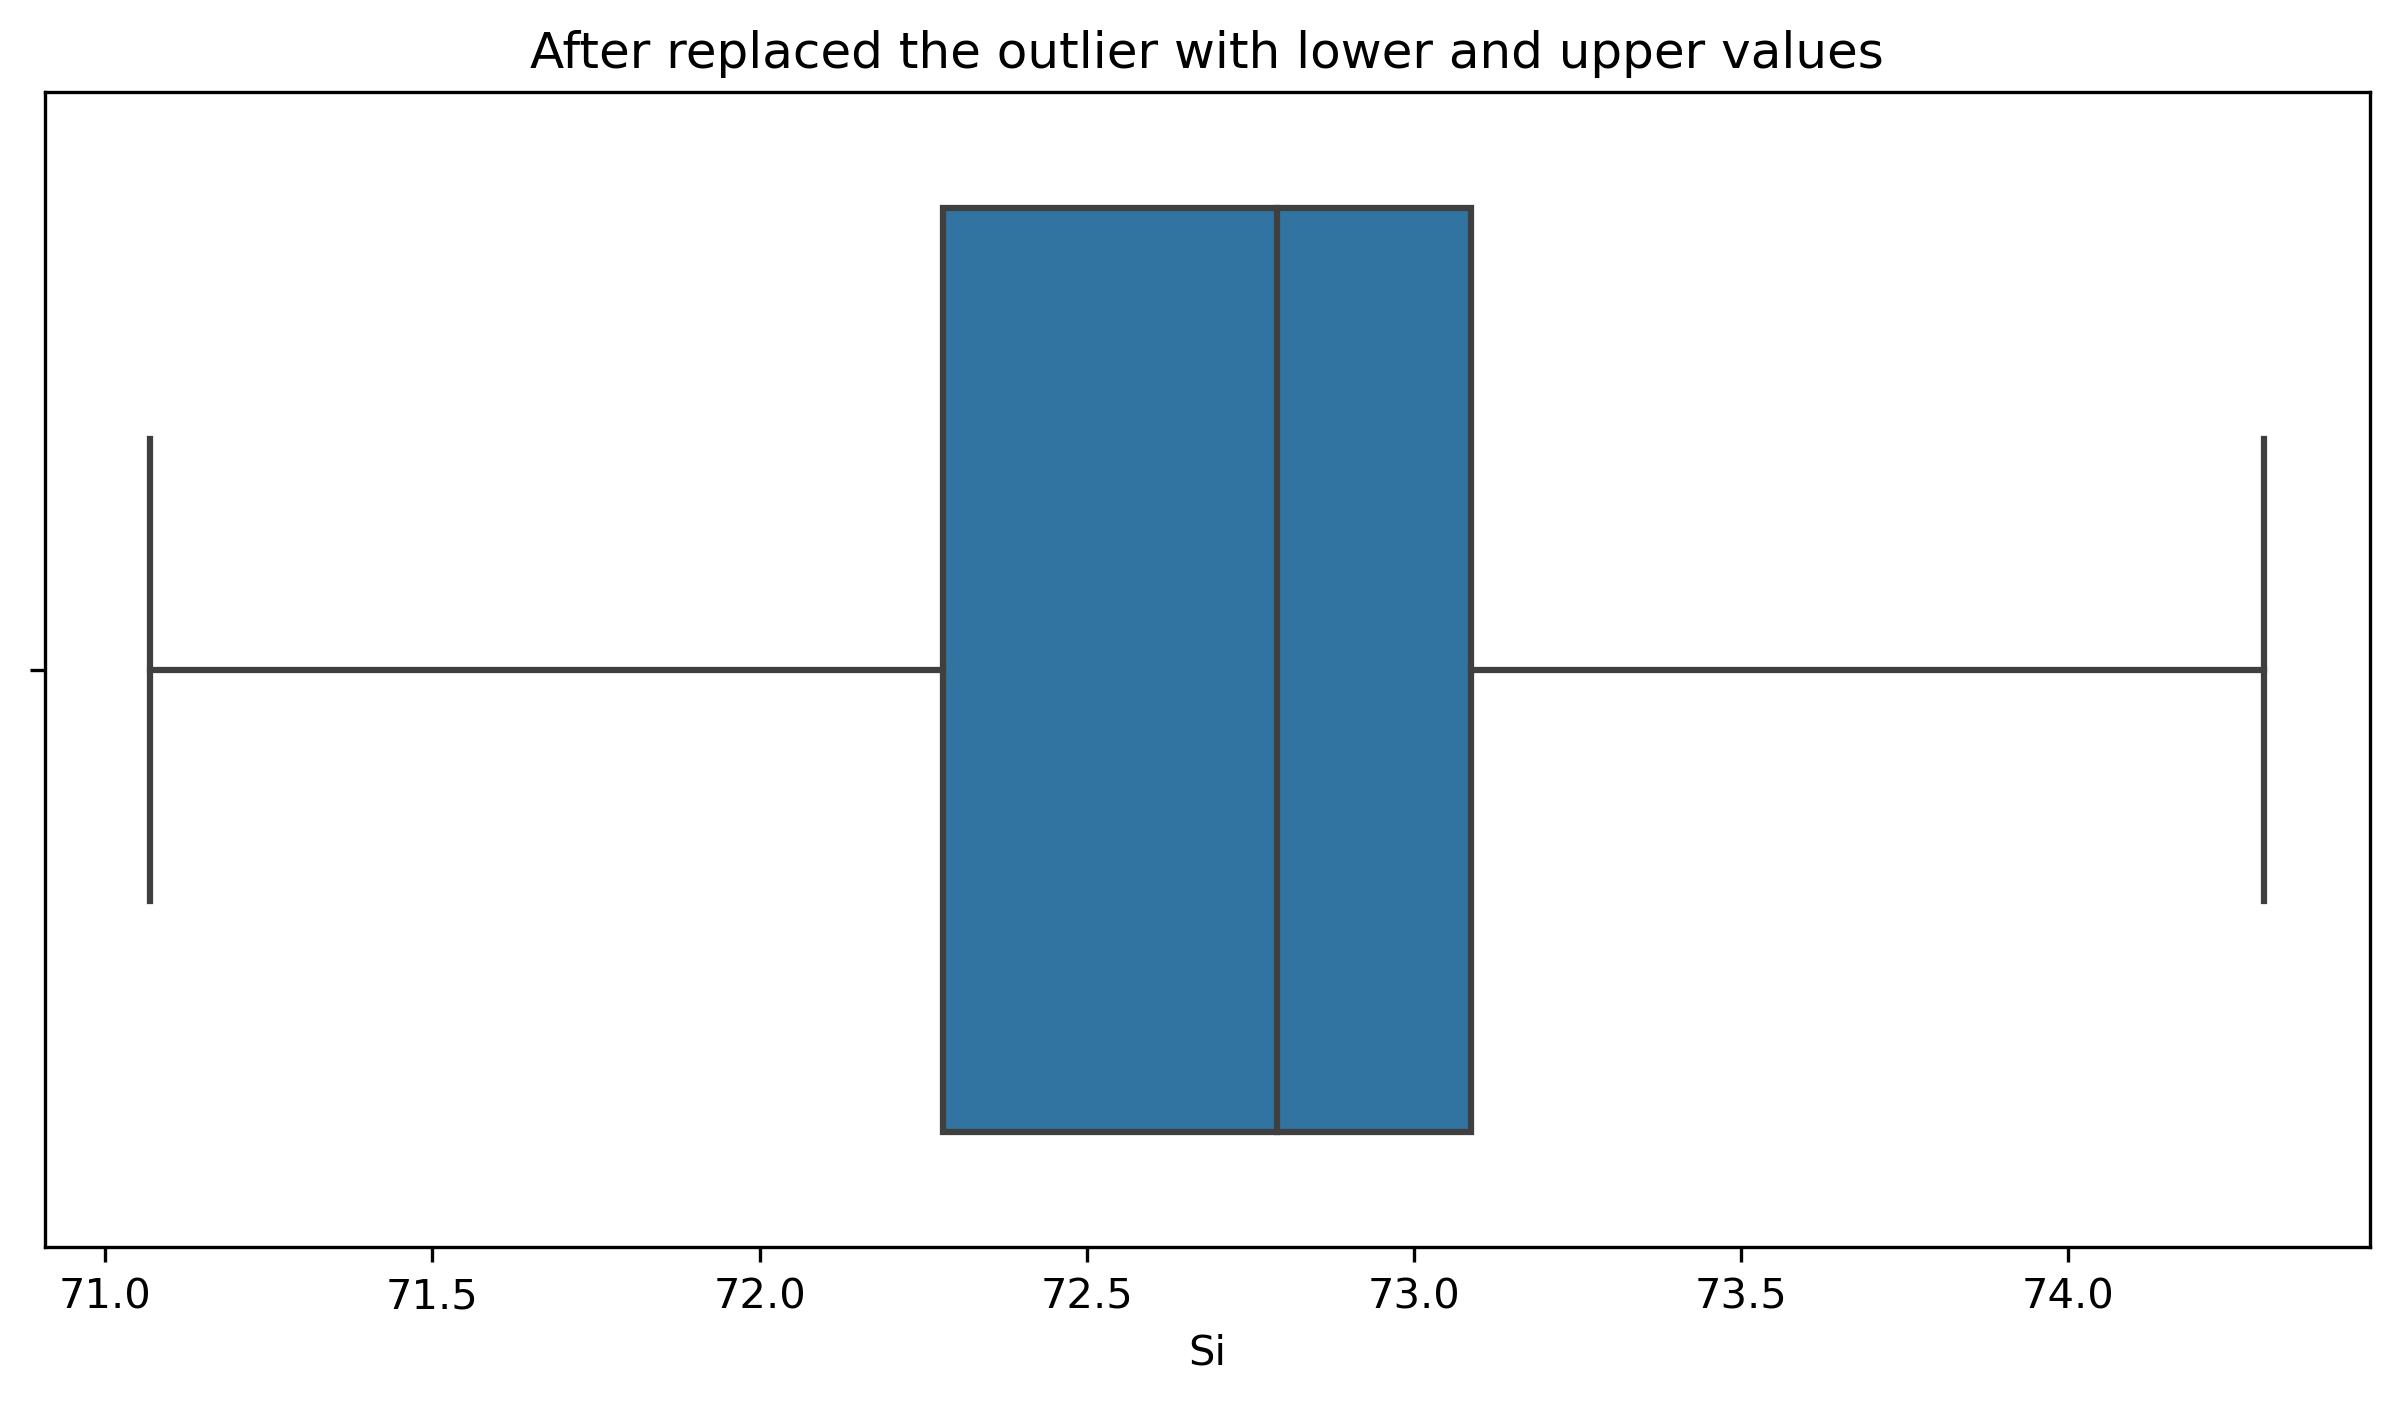

In [173]:
sns.boxplot(x = df["Si"])
plt.xlabel("Si")
plt.title("After replaced the outlier with lower and upper values")

In [174]:
outlier_detection(df, "K")

(-0.6087499999999999, 1.34125)

Text(0.5, 1.0, 'Before replacing the outlier with upper values')

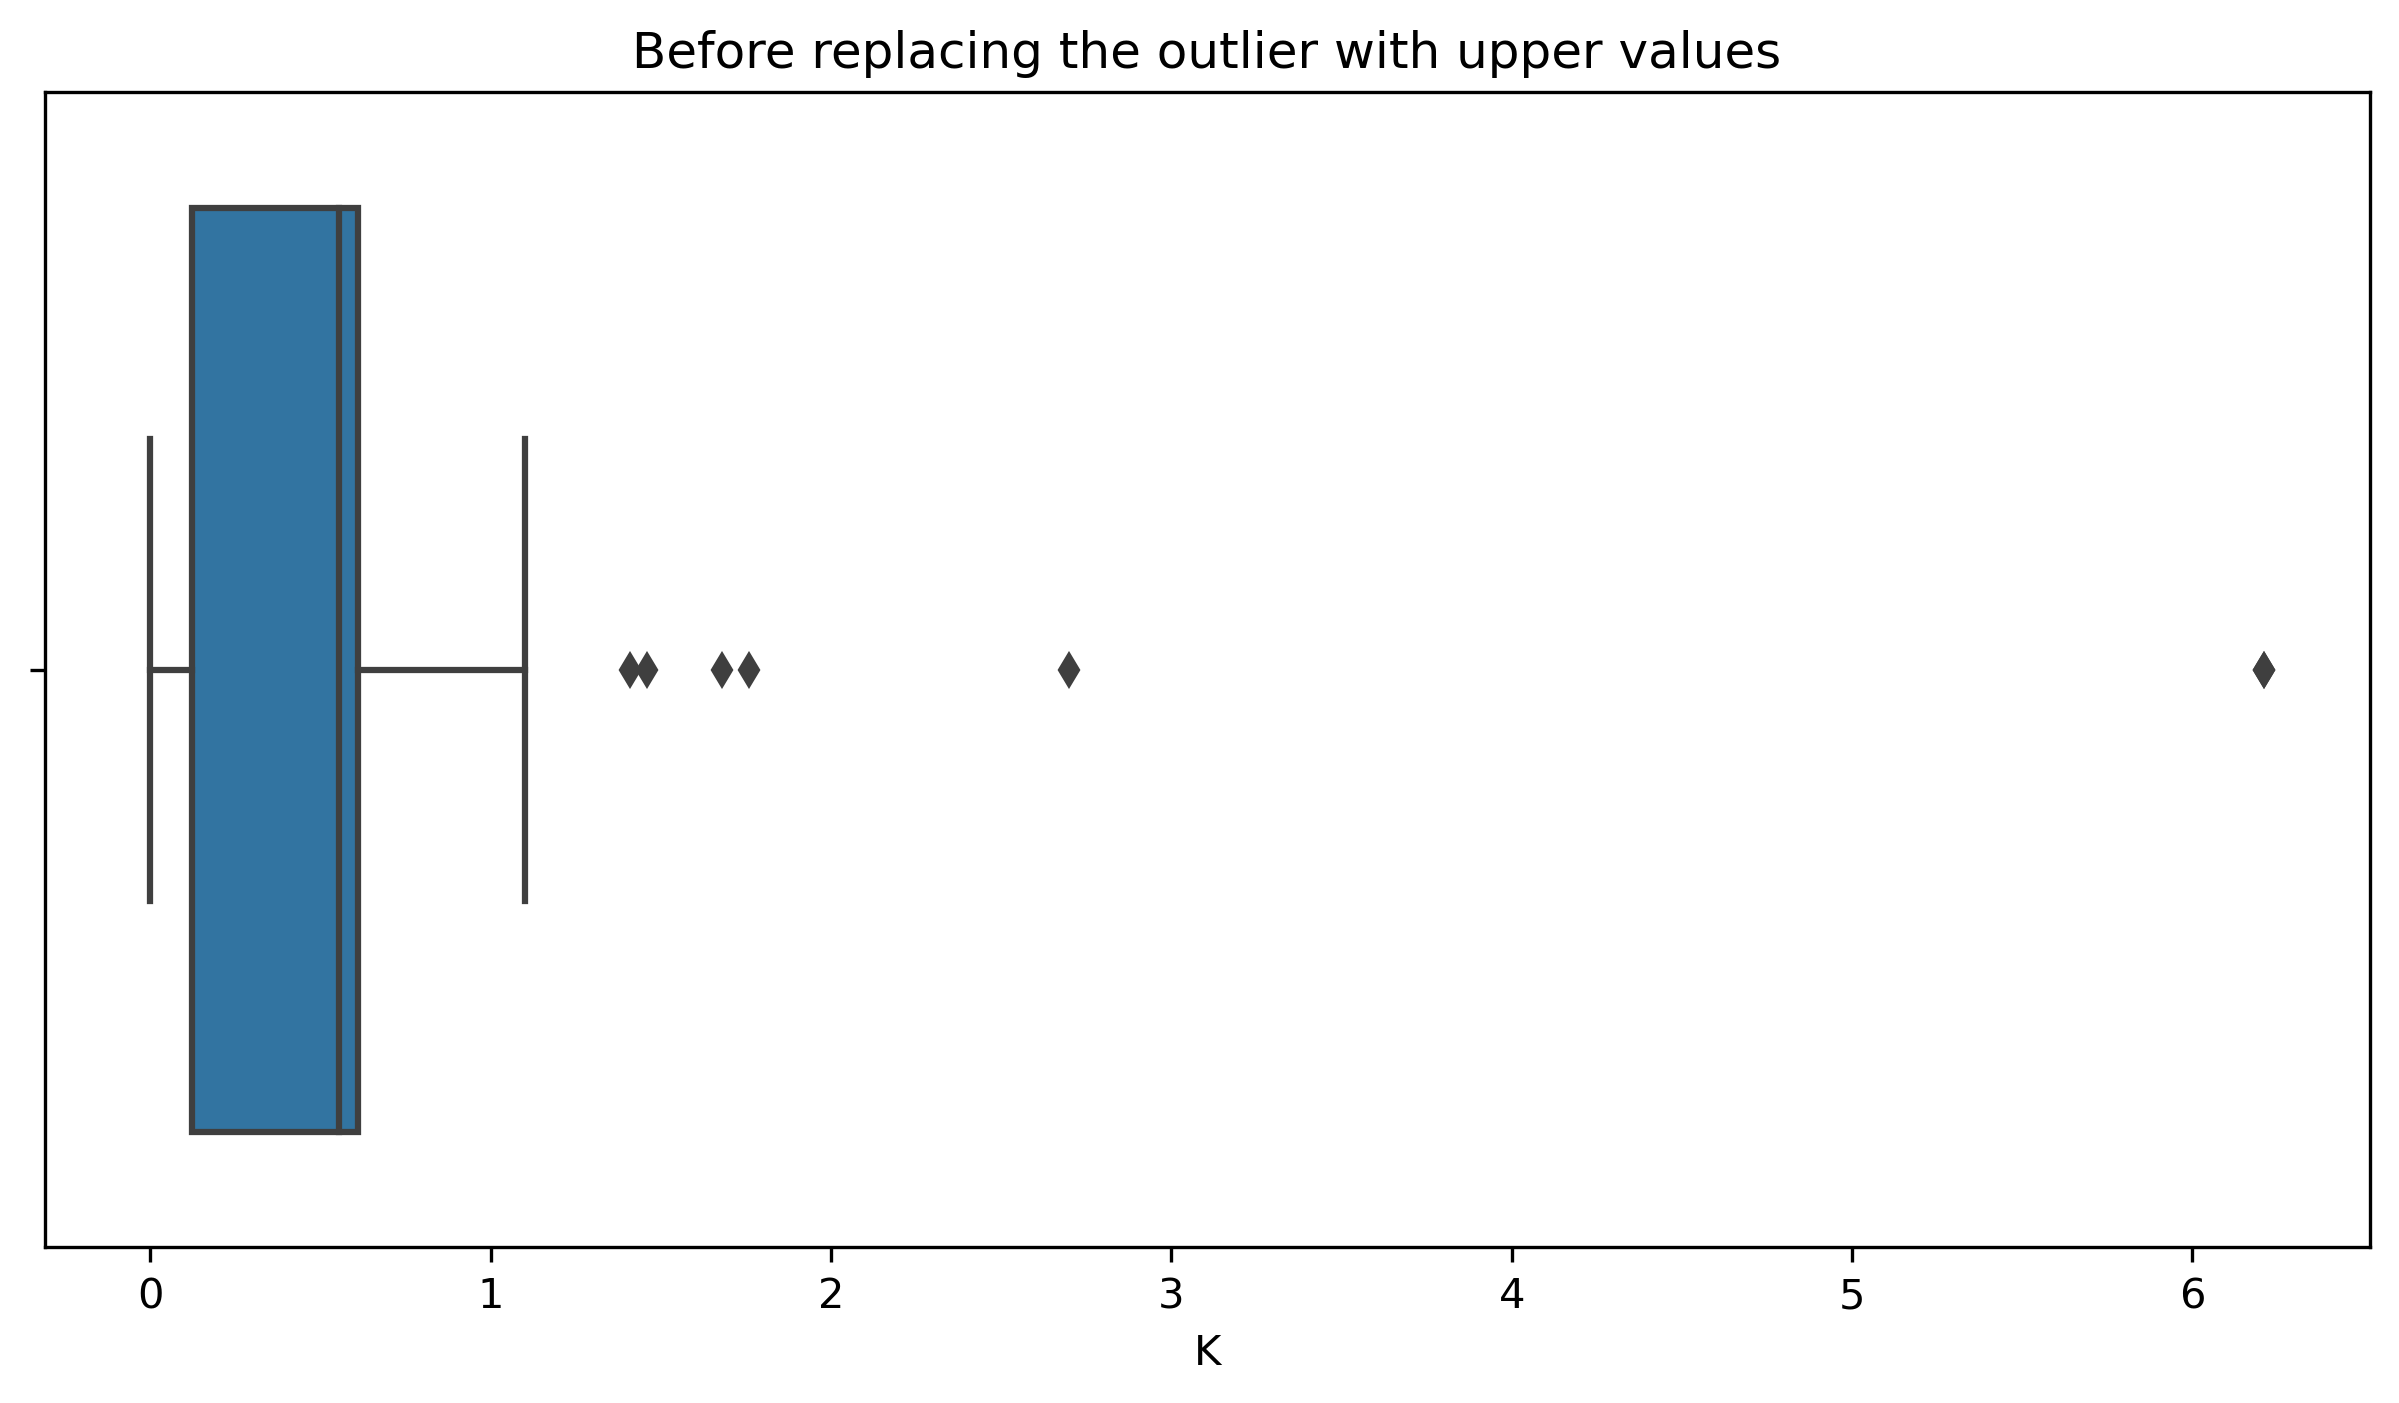

In [175]:
sns.boxplot(x = df["K"])
plt.xlabel("K")
plt.title("Before replacing the outlier with upper values")

In [176]:
df[df["K"]>1.34125]

RI     Na    Mg    Al        Si     K    Ca    Ba   Fe  Type
163  1.515140  14.01  2.68  2.29  71.06875  1.68  5.87  2.20  0.0     5
171  1.513160  13.02  0.00  2.29  71.06875  6.21  6.96  0.00  0.0     5
172  1.513210  13.00  0.00  2.29  71.06875  6.21  6.93  0.00  0.0     5
185  1.512575  13.69  3.20  1.81  72.81000  1.76  5.43  1.19  0.0     7
186  1.518380  14.32  3.26  2.22  71.25000  1.46  5.79  1.63  0.0     7
201  1.516530  11.95  0.00  1.19  74.29875  2.70  8.93  0.00  0.0     7
207  1.518310  14.39  0.00  1.82  72.86000  1.41  6.47  2.88  0.0     7

In [177]:
df.loc[df["K"]>1.34125, "K"] = 1.34125

Text(0.5, 1.0, 'After replaced the outlier with upper values')

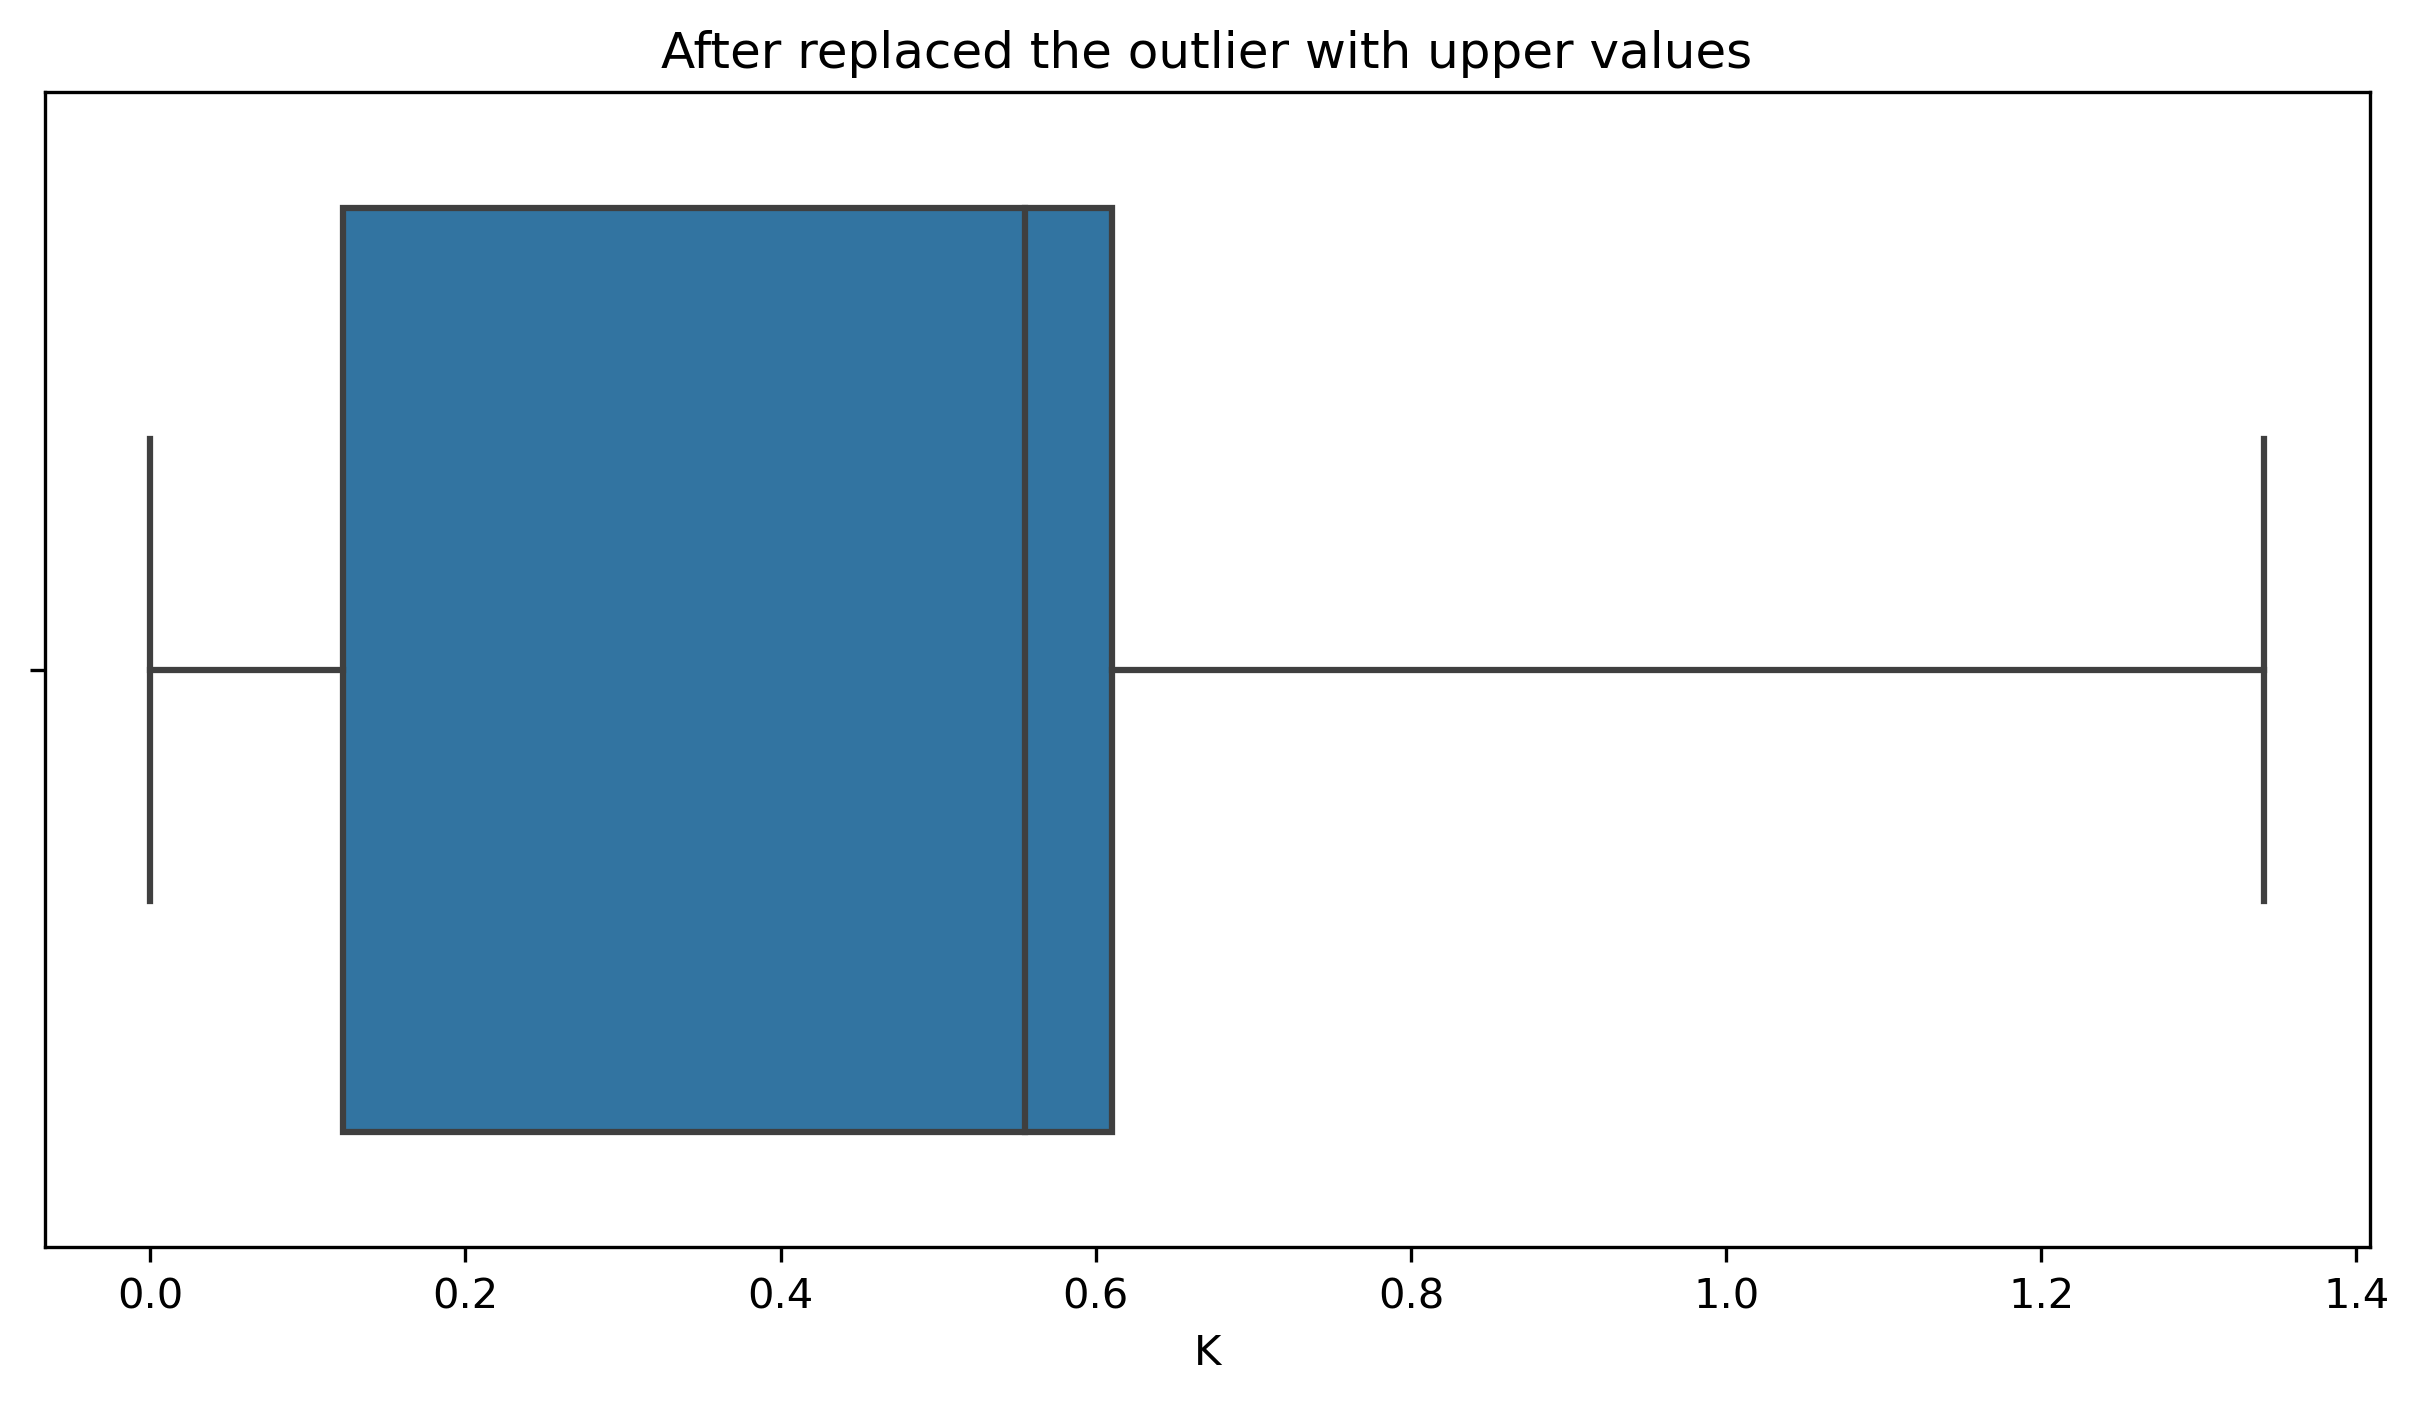

In [178]:
sns.boxplot(x = df["K"])
plt.xlabel("K")
plt.title("After replaced the outlier with upper values")

In [179]:
outlier_detection(df, "Ca")

(6.841250000000001, 10.57125)

Text(0.5, 1.0, 'Before replacing the outlier with upper and lower values')

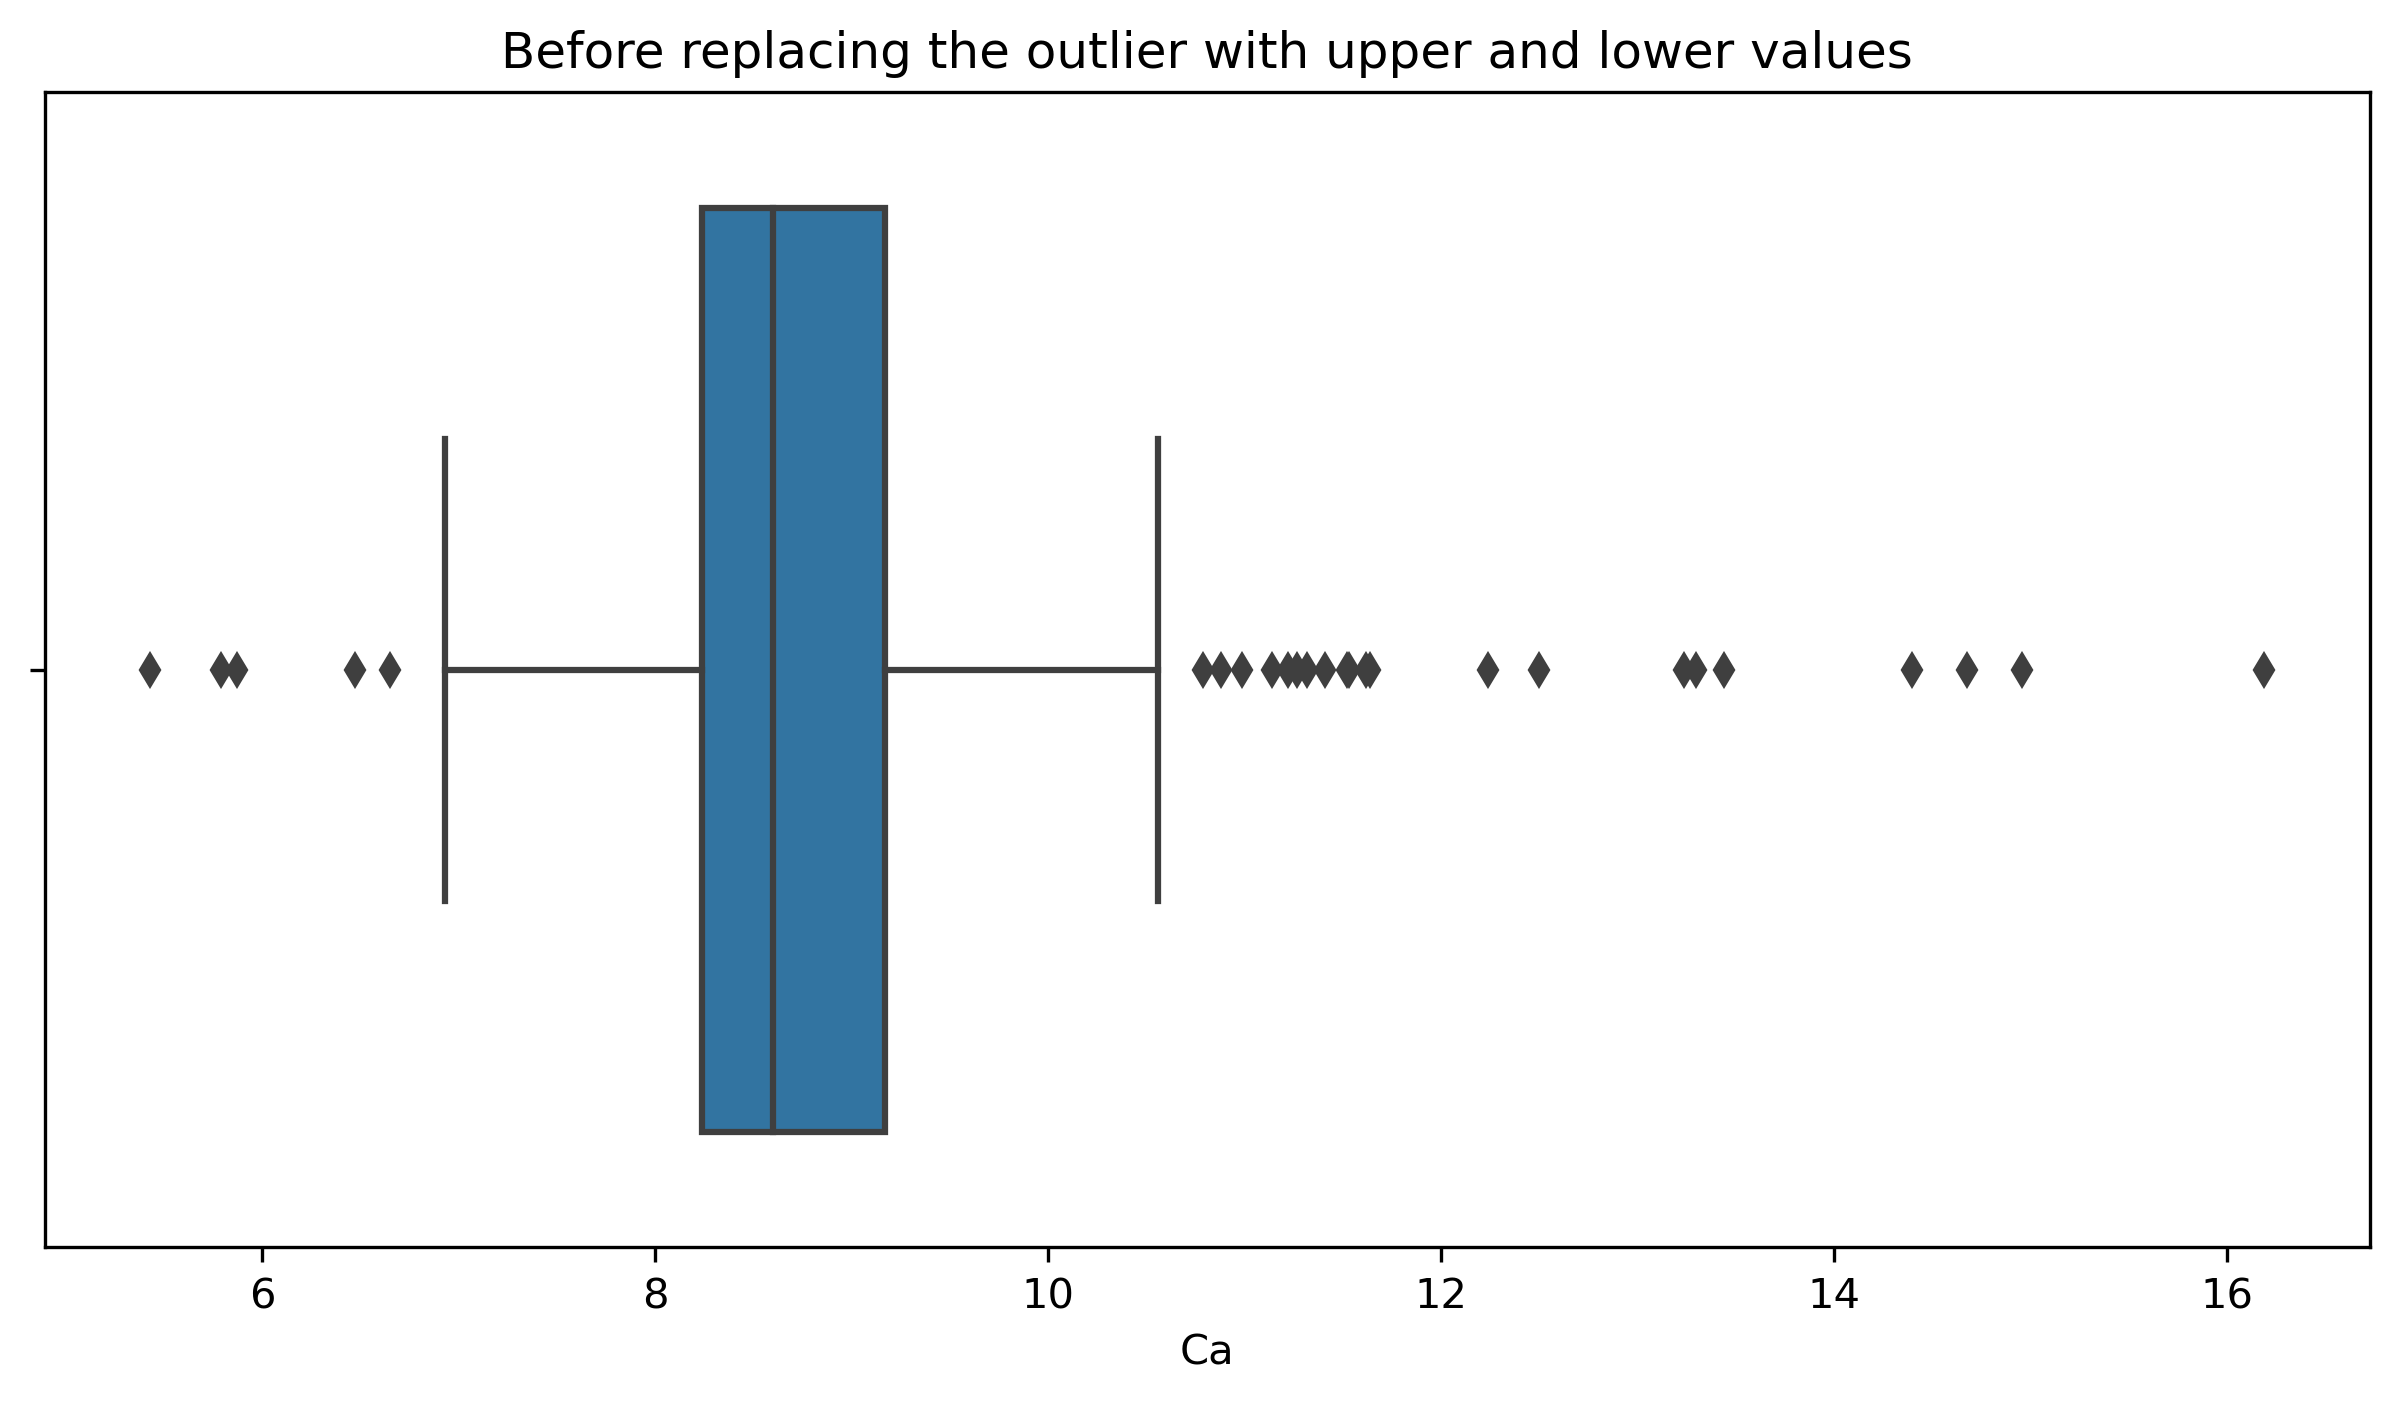

In [180]:
sns.boxplot(x = df["Ca"])
plt.xlabel("Ca")
plt.title("Before replacing the outlier with upper and lower values")

In [181]:
df[df["Ca"]>10.57125]

RI        Na    Mg    Al        Si     K     Ca    Ba    Fe  Type
103  1.52311  13.80000  3.15  0.66  71.06875  0.08  11.64  0.00  0.00     2
104  1.52311  13.83000  2.90  1.17  71.15000  0.08  10.79  0.00  0.00     2
105  1.52311  11.53125  0.00  1.88  72.19000  0.81  13.24  0.00  0.34     2
106  1.52311  11.53125  0.00  2.10  71.06875  0.58  13.30  3.15  0.28     2
107  1.52311  12.30000  0.00  1.00  71.06875  0.12  16.19  0.00  0.24     2
108  1.52222  14.43000  0.00  1.00  72.67000  0.10  11.52  0.00  0.08     2
109  1.51818  13.72000  0.00  0.56  74.29875  0.00  10.99  0.00  0.00     2
110  1.52311  11.53125  0.00  0.77  73.21000  0.00  14.68  0.00  0.00     2
111  1.52311  11.53125  0.00  0.75  73.08000  0.00  14.96  0.00  0.00     2
112  1.52311  12.64000  0.00  0.67  72.02000  0.06  14.40  0.00  0.00     2
130  1.52177  13.75000  1.01  1.36  72.19000  0.33  11.14  0.00  0.00     2
131  1.52311  13.70000  0.00  1.36  71.24000  0.19  13.44  0.00  0.10     2
165  1.52171  11.56000  1.88  1.56  72.86000  0.47  11.41  0.00  0.00     5
166  1.52151  11.53125  1.71  1.56  73.44000  0.58  11.62  0.00  0.00     5
167  1.51969  12.64000  0.00  1.65  73.75000  0.38  11.53  0.00  0.00     5
169  1.51994  13.27000  0.00  1.76  73.03000  0.47  11.32  0.00  0.00     5
170  1.52311  13.44000  0.00  1.58  72.22000  0.32  12.24  0.00  0.00     5
173  1.52043  13.38000  0.00  1.40  72.25000  0.33  12.50  0.00  0.00     5
175  1.52119  12.97000  0.33  1.51  73.39000  0.13  11.27  0.00  0.28     5
182  1.51916  14.15000  0.00  2.09  72.74000  0.00  10.88  0.00  0.00     6
183  1.51969  14.56000  0.00  0.56  73.48000  0.00  11.22  0.00  0.00     6

In [182]:
df.loc[df["Ca"]>10.57125, "Ca"] = 10.57125

In [183]:
df[df["Ca"]<6.841250000000001]

RI        Na    Mg    Al        Si        K    Ca    Ba   Fe  Type
163  1.515140  14.01000  2.68  2.29  71.06875  1.34125  5.87  2.20  0.0     5
184  1.512575  15.20125  0.00  0.53  74.29875  0.00000  6.65  0.00  0.0     6
185  1.512575  13.69000  3.20  1.81  72.81000  1.34125  5.43  1.19  0.0     7
186  1.518380  14.32000  3.26  2.22  71.25000  1.34125  5.79  1.63  0.0     7
207  1.518310  14.39000  0.00  1.82  72.86000  1.34125  6.47  2.88  0.0     7

In [184]:
df.loc[df["Ca"]<6.841250000000001, "Ca"] = 6.841250000000001

Text(0.5, 1.0, 'After replaced the outlier with upper and lower values')

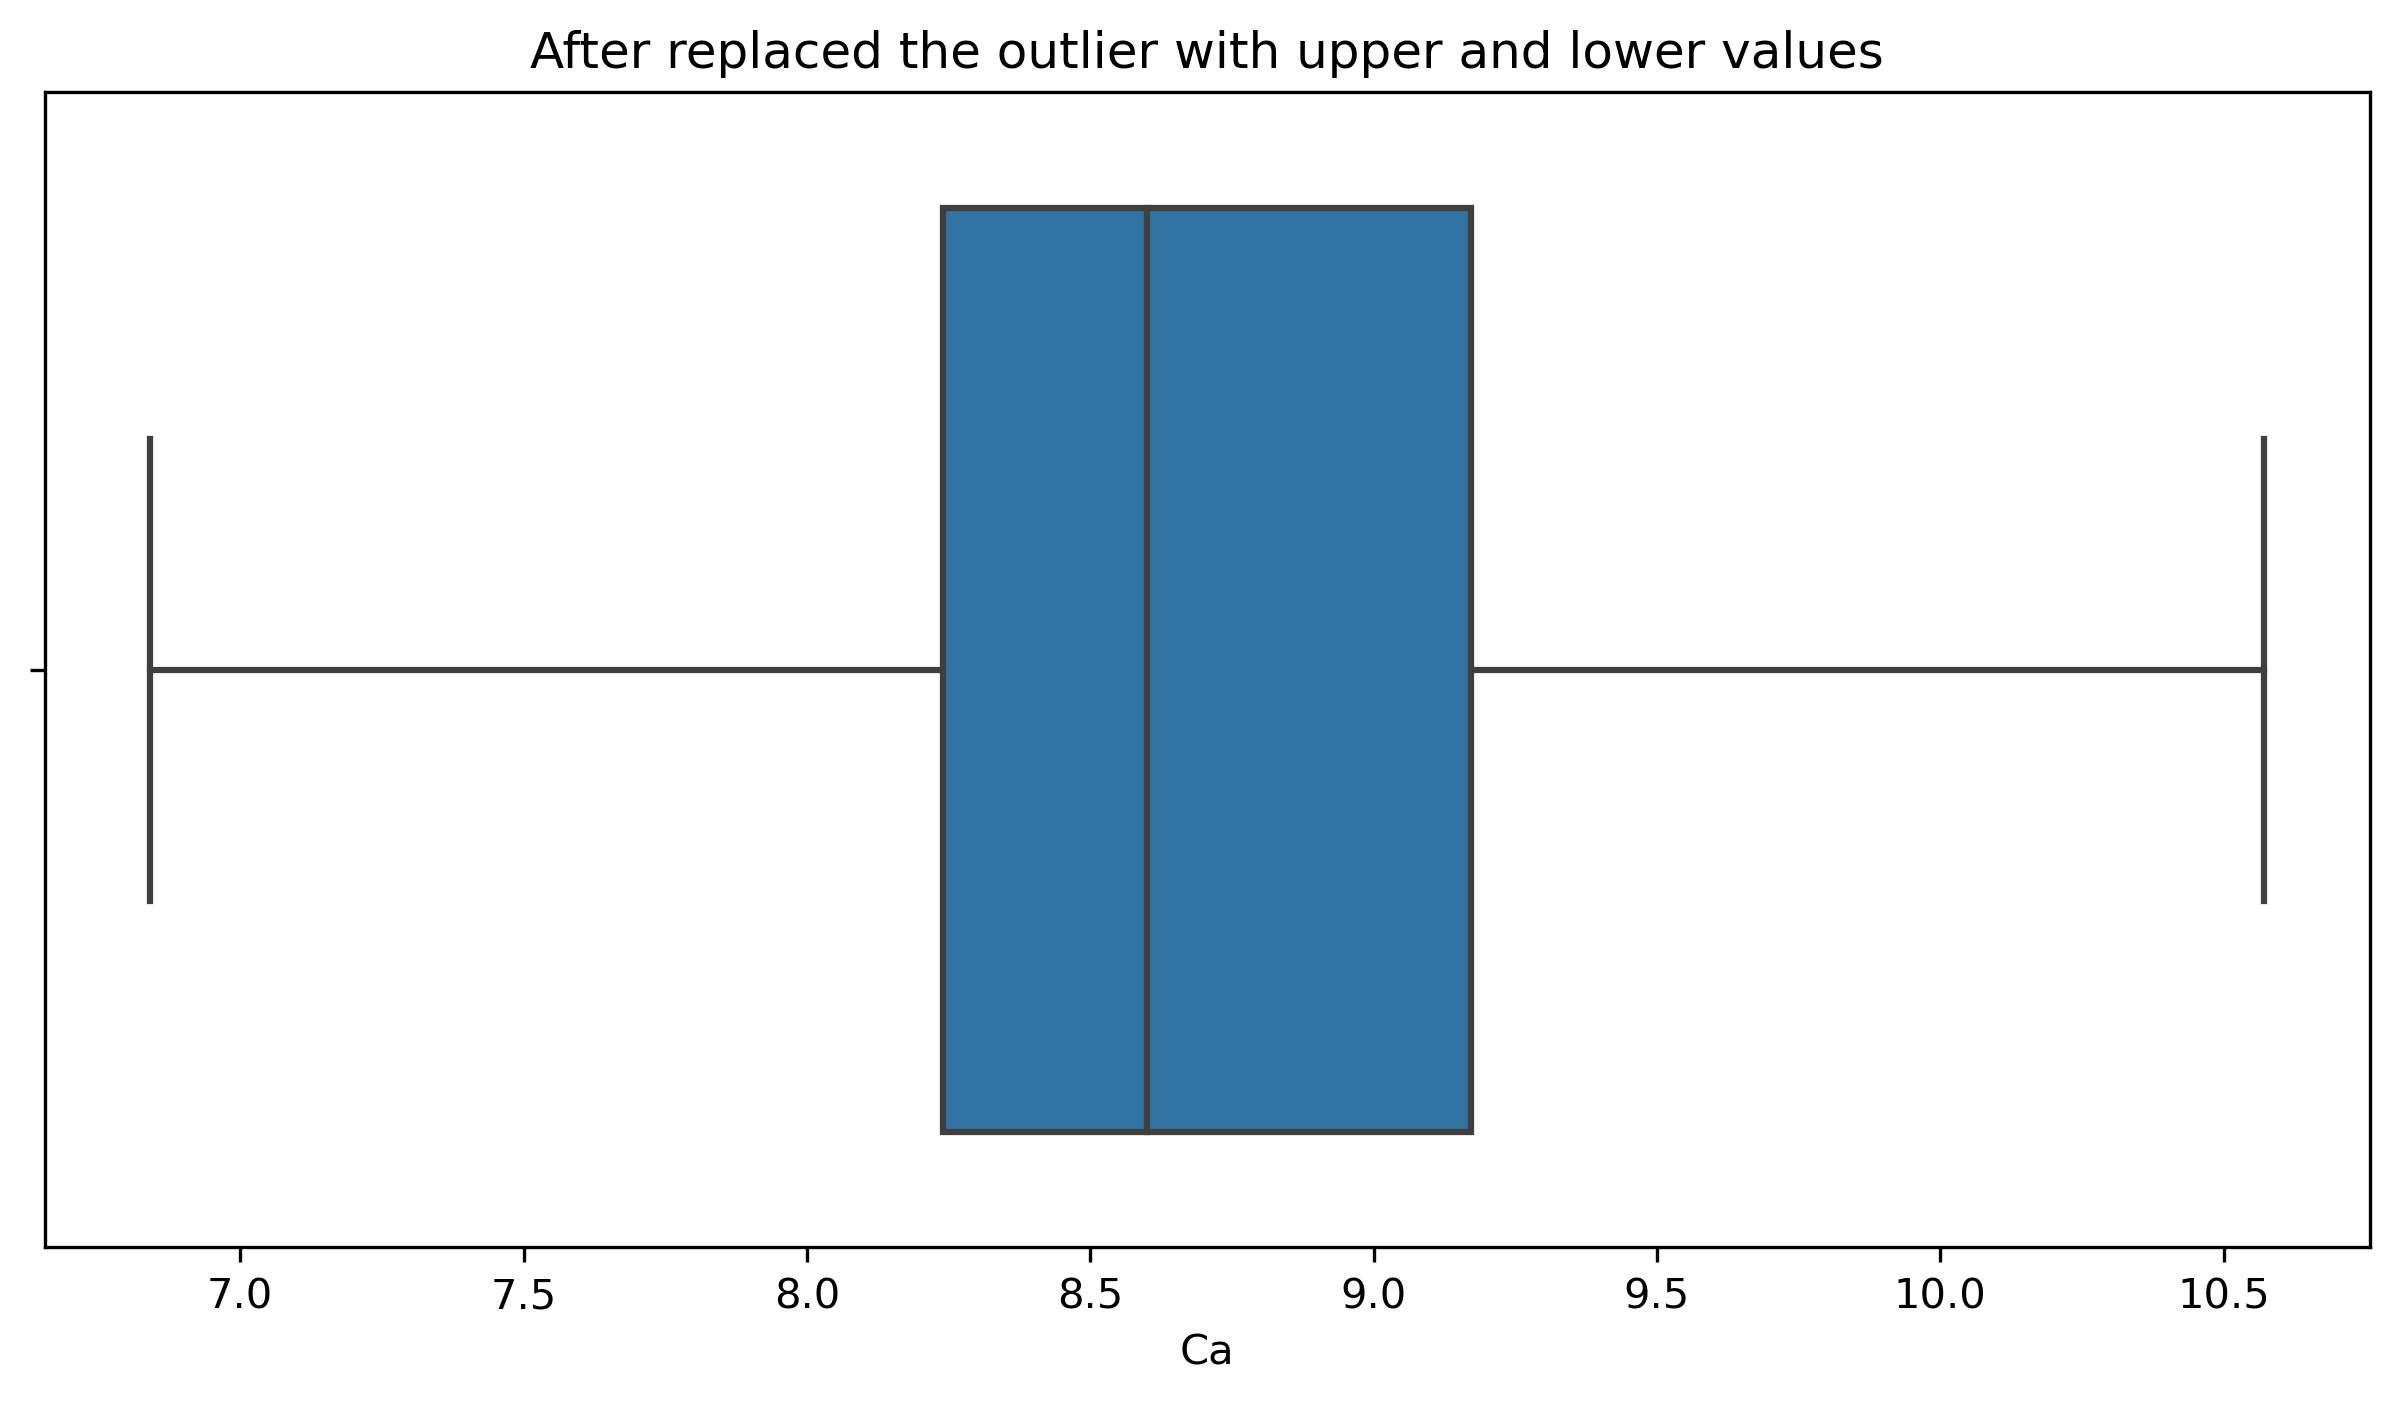

In [185]:
sns.boxplot(x = df["Ca"])
plt.xlabel("Ca")
plt.title("After replaced the outlier with upper and lower values")

In [186]:
outlier_detection(df, "Ba")

(0.0, 0.0)

Text(0.5, 1.0, 'Before replacing the outlier with upper and lower values')

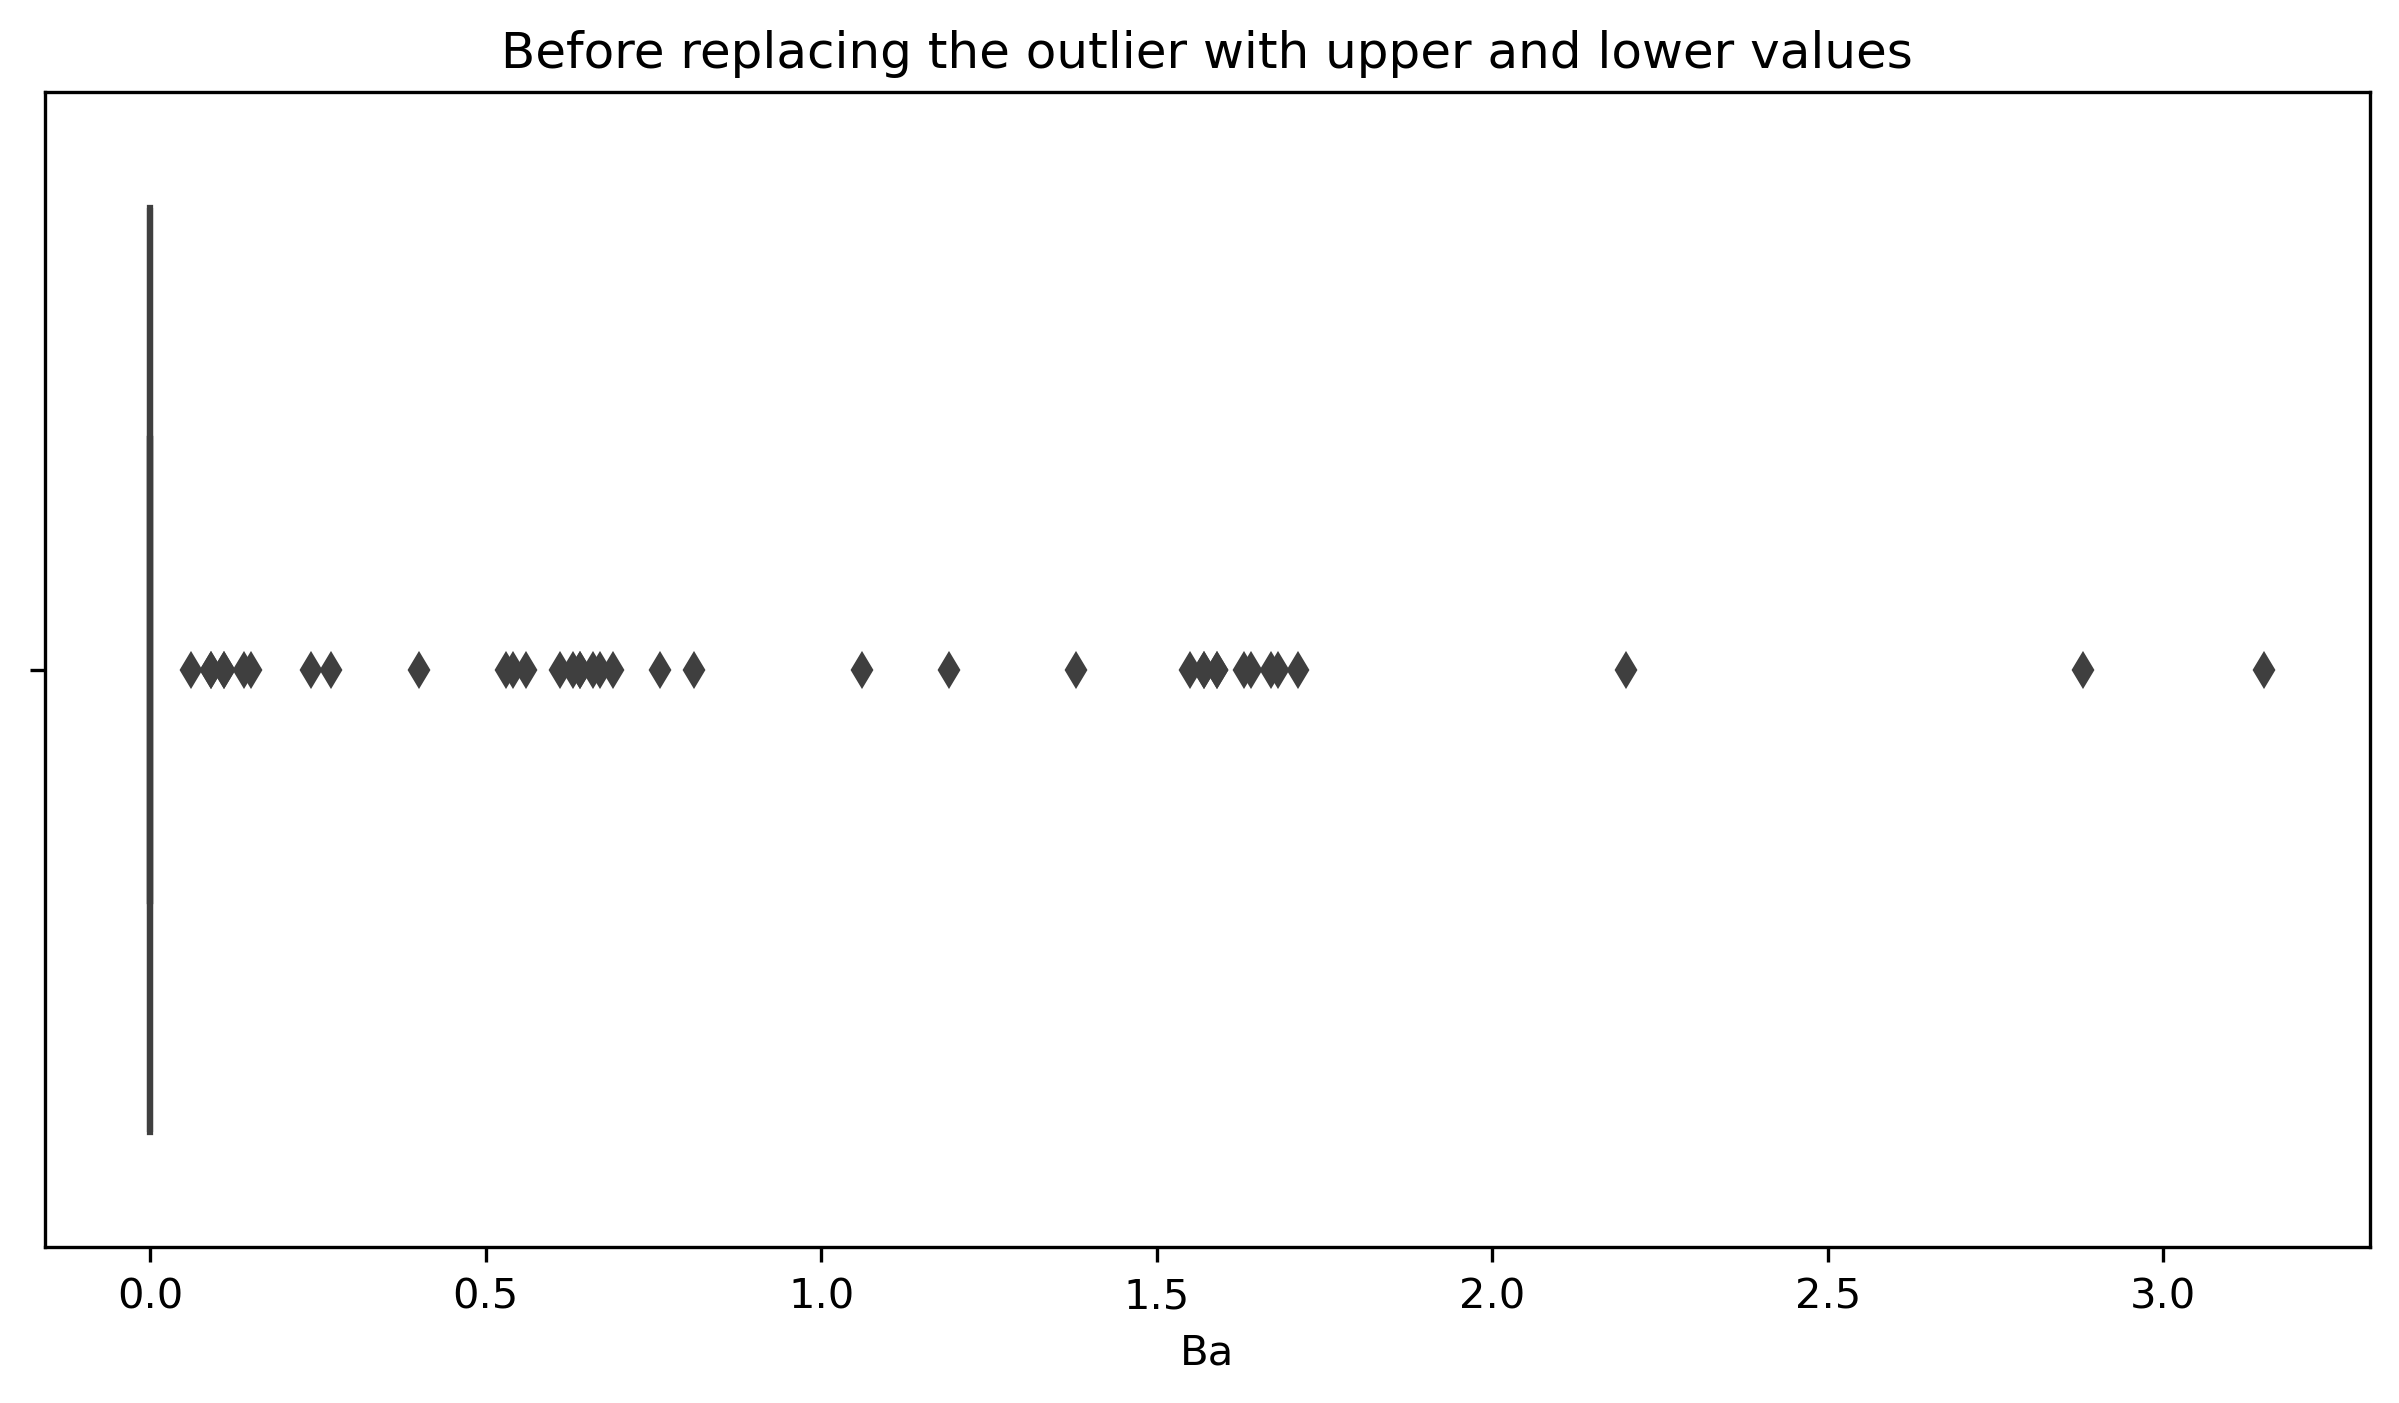

In [187]:
sns.boxplot(x = df["Ba"])
plt.xlabel("Ba")
plt.title("Before replacing the outlier with upper and lower values")

In [188]:
df[df["Ba"]>0.0]

RI        Na    Mg    Al        Si        K        Ca    Ba    Fe  \
32   1.517750  12.85000  3.48  1.23  72.97000  0.61000   8.56000  0.09  0.22   
36   1.519090  13.89000  3.53  1.32  71.81000  0.51000   8.78000  0.11  0.00   
61   1.519770  13.81000  3.58  1.32  71.72000  0.12000   8.67000  0.69  0.00   
99   1.518110  12.96000  2.96  1.43  72.92000  0.60000   8.79000  0.14  0.00   
100  1.516550  12.75000  2.85  1.44  73.27000  0.57000   8.79000  0.11  0.22   
106  1.523110  11.53125  0.00  2.10  71.06875  0.58000  10.57125  3.15  0.28   
128  1.520680  13.55000  2.09  1.67  72.18000  0.53000   9.57000  0.27  0.17   
141  1.518510  13.20000  3.63  1.07  72.83000  0.57000   8.41000  0.09  0.17   
142  1.516620  12.85000  3.51  1.44  73.01000  0.68000   8.23000  0.06  0.25   
161  1.519340  13.64000  3.54  0.75  72.65000  0.16000   8.89000  0.15  0.24   
163  1.515140  14.01000  2.68  2.29  71.06875  1.34125   6.84125  2.20  0.00   
174  1.520580  12.85000  1.61  2.17  72.18000  0.76000   9.70000  0.24  0.51   
185  1.512575  13.69000  3.20  1.81  72.81000  1.34125   6.84125  1.19  0.00   
186  1.518380  14.32000  3.26  2.22  71.25000  1.34125   6.84125  1.63  0.00   
189  1.523110  15.20125  1.83  1.31  71.06875  0.31000   8.61000  1.68  0.00   
190  1.516130  13.88000  1.78  1.79  73.10000  0.00000   8.67000  0.76  0.00   
191  1.516020  14.85000  0.00  2.29  73.28000  0.00000   8.76000  0.64  0.09   
192  1.516230  14.20000  0.00  2.29  73.46000  0.04000   9.04000  0.40  0.09   
193  1.517190  14.75000  0.00  2.00  73.02000  0.00000   8.53000  1.59  0.08   
194  1.516830  14.56000  0.00  1.98  73.29000  0.00000   8.52000  1.57  0.07   
195  1.515450  14.14000  0.00  2.29  73.39000  0.08000   9.07000  0.61  0.05   
196  1.515560  13.87000  0.00  2.29  73.23000  0.14000   9.41000  0.81  0.01   
197  1.517270  14.70000  0.00  2.29  73.28000  0.00000   8.95000  0.66  0.00   
198  1.515310  14.38000  0.00  2.29  73.10000  0.04000   9.08000  0.64  0.00   
199  1.516090  15.01000  0.00  2.29  73.05000  0.05000   8.83000  0.53  0.00   
200  1.515080  15.15000  0.00  2.25  73.50000  0.00000   8.34000  0.63  0.00   
202  1.515140  14.85000  0.00  2.29  73.72000  0.00000   8.39000  0.56  0.00   
203  1.516580  14.80000  0.00  1.99  73.11000  0.00000   8.28000  1.71  0.00   
204  1.516170  14.95000  0.00  2.27  73.30000  0.00000   8.71000  0.67  0.00   
205  1.517320  14.95000  0.00  1.80  72.99000  0.00000   8.61000  1.55  0.00   
206  1.516450  14.94000  0.00  1.87  73.11000  0.00000   8.67000  1.38  0.00   
207  1.518310  14.39000  0.00  1.82  72.86000  1.34125   6.84125  2.88  0.00   
208  1.516400  14.37000  0.00  2.29  72.85000  0.00000   9.45000  0.54  0.00   
209  1.516230  14.14000  0.00  2.29  72.61000  0.08000   9.18000  1.06  0.00   
210  1.516850  14.92000  0.00  1.99  73.06000  0.00000   8.40000  1.59  0.00   
211  1.520650  14.36000  0.00  2.02  73.42000  0.00000   8.44000  1.64  0.00   
212  1.516510  14.38000  0.00  1.94  73.61000  0.00000   8.48000  1.57  0.00   
213  1.517110  14.23000  0.00  2.08  73.36000  0.00000   8.62000  1.67  0.00   

     Type  
32      1  
36      1  
61      1  
99      2  
100     2  
106     2  
128     2  
141     2  
142     2  
161     3  
163     5  
174     5  
185     7  
186     7  
189     7  
190     7  
191     7  
192     7  
193     7  
194     7  
195     7  
196     7  
197     7  
198     7  
199     7  
200     7  
202     7  
203     7  
204     7  
205     7  
206     7  
207     7  
208     7  
209     7  
210     7  
211     7  
212     7  
213     7

In [189]:
df.loc[df["Ba"]>0.0, "Ba"] = 0.0

Text(0.5, 1.0, 'After replaced the outlier with upper values')

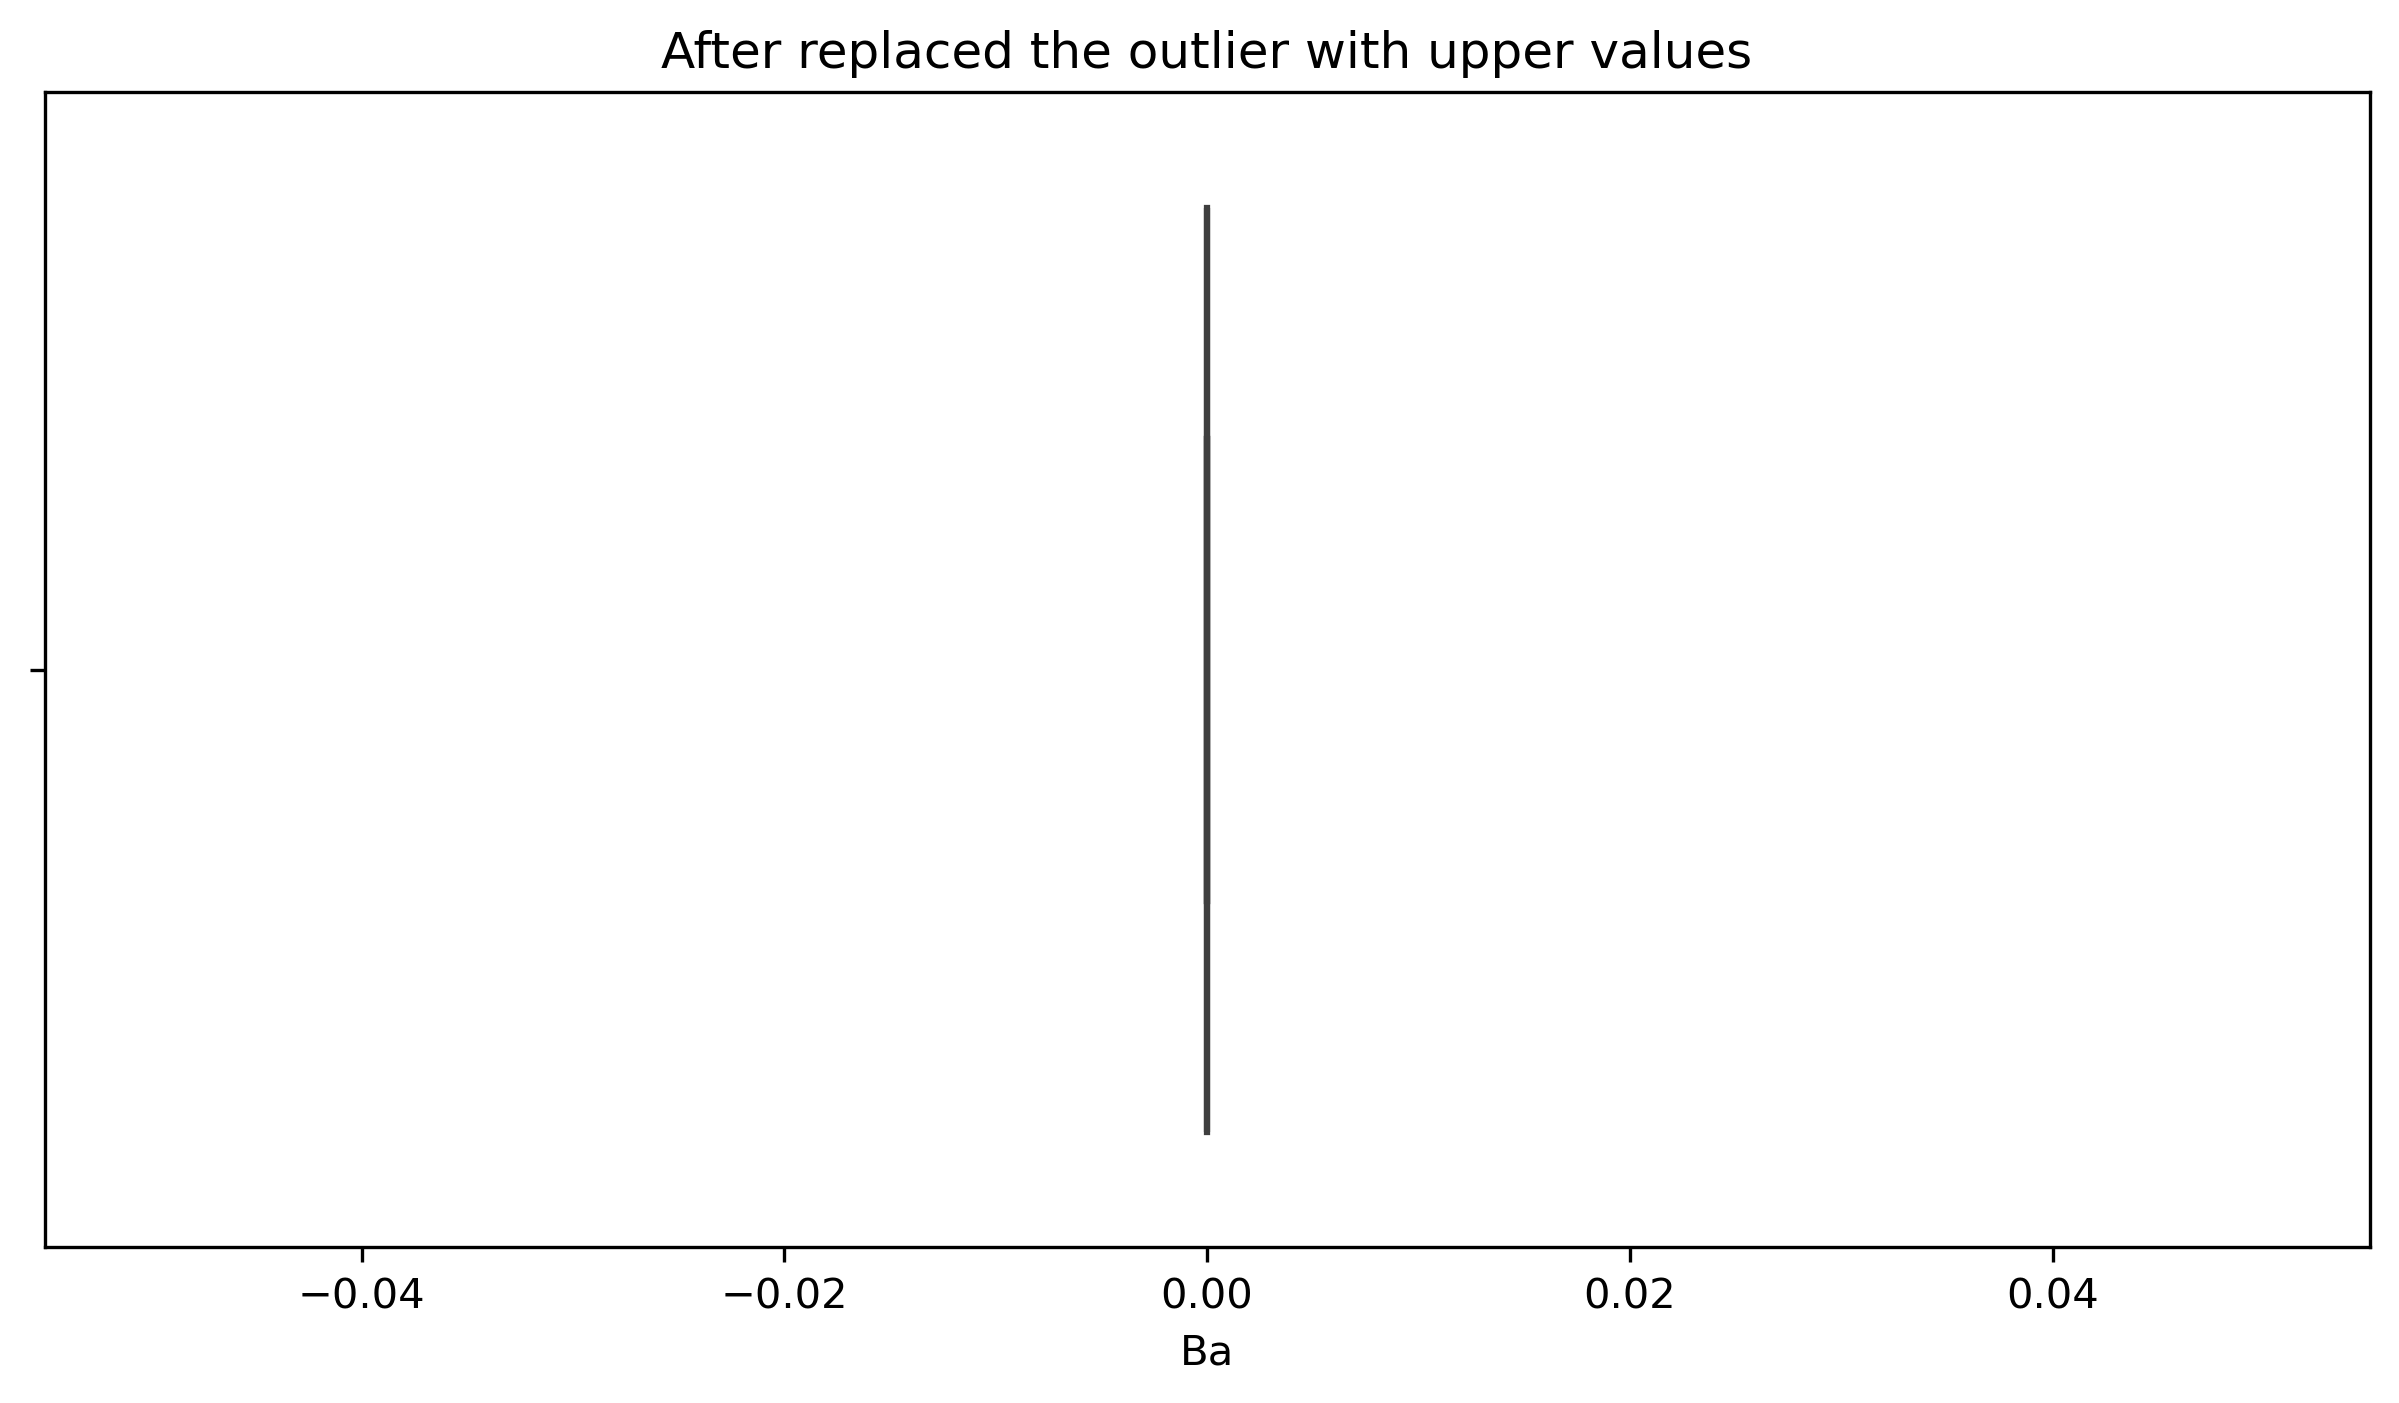

In [190]:
sns.boxplot(x = df["Ba"])
plt.xlabel("Ba")
plt.title("After replaced the outlier with upper values")

In [191]:
outlier_detection(df, "Fe")

(-0.15000000000000002, 0.25)

Text(0.5, 1.0, 'Before replacing the outlier with upper values')

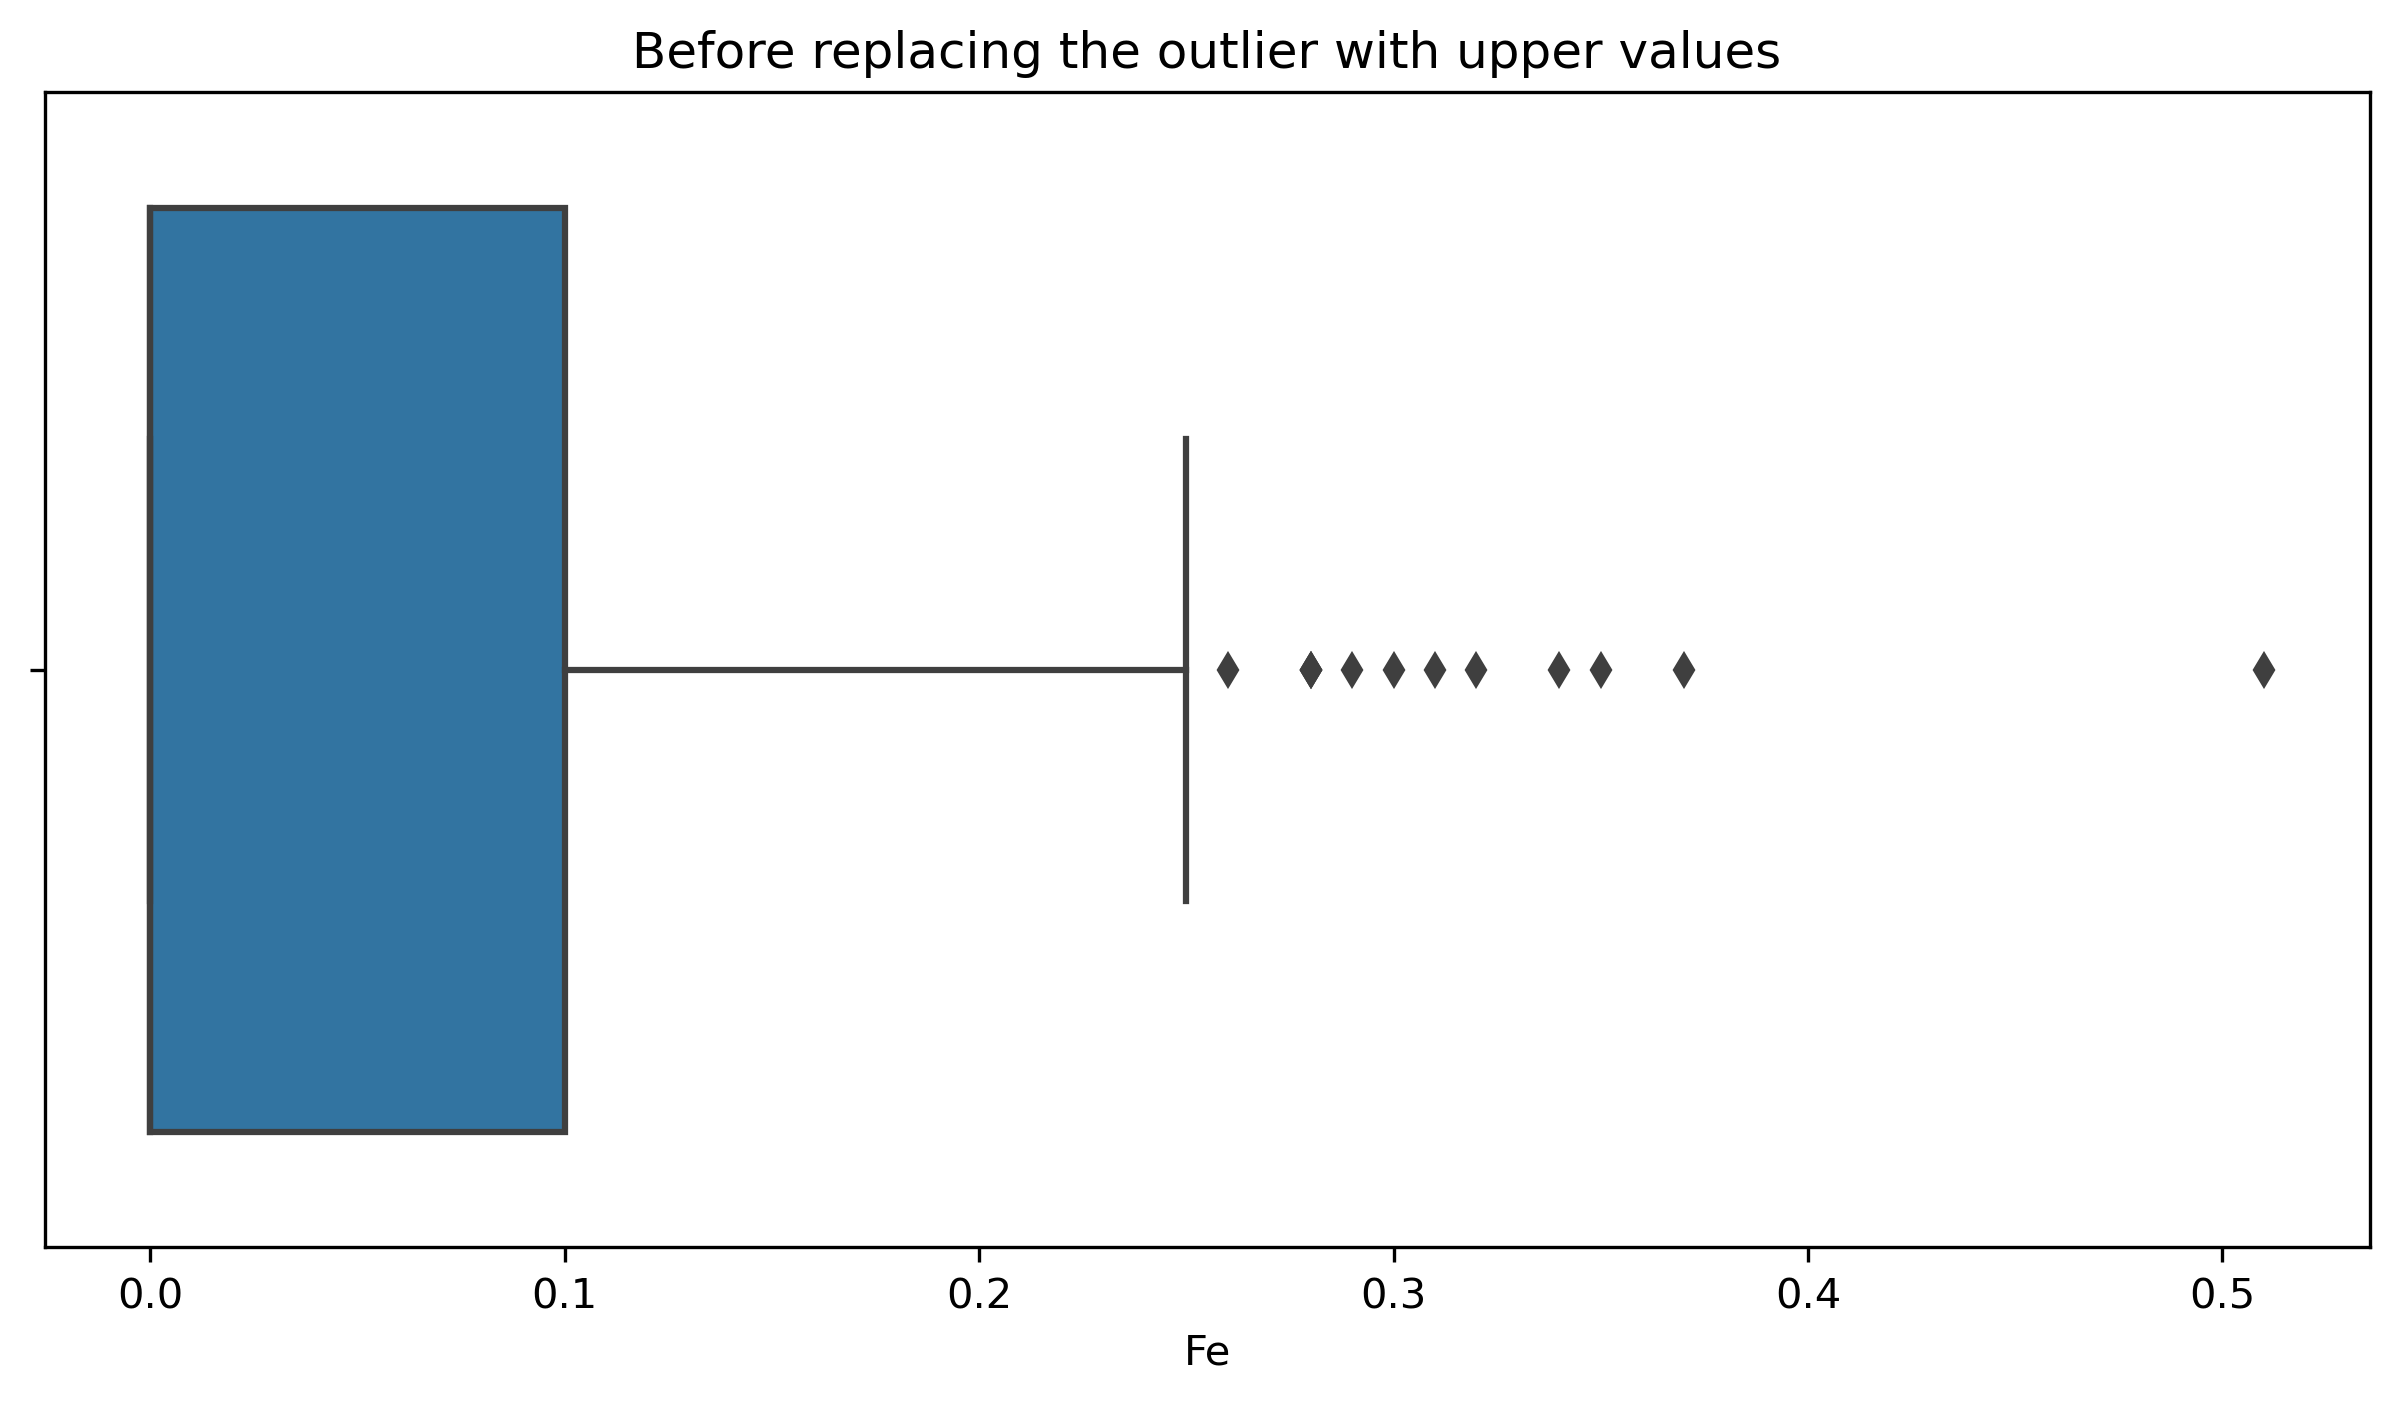

In [192]:
sns.boxplot(x = df["Fe"])
plt.xlabel("Fe")
plt.title("Before replacing the outlier with upper values")

In [193]:
df[df["Fe"]>0.25]

RI        Na    Mg    Al        Si     K        Ca   Ba    Fe  Type
5    1.515960  12.79000  3.61  1.62  72.97000  0.64   8.07000  0.0  0.26     1
44   1.517860  12.73000  3.43  1.19  72.95000  0.62   8.76000  0.0  0.30     1
56   1.512575  12.99000  3.47  1.12  72.98000  0.62   8.35000  0.0  0.31     1
71   1.518480  13.64000  3.87  1.27  71.96000  0.54   8.32000  0.0  0.32     2
105  1.523110  11.53125  0.00  1.88  72.19000  0.81  10.57125  0.0  0.34     2
106  1.523110  11.53125  0.00  2.10  71.06875  0.58  10.57125  0.0  0.28     2
118  1.516730  13.30000  3.64  1.53  72.53000  0.65   8.03000  0.0  0.29     2
135  1.517890  13.19000  3.90  1.30  72.33000  0.55   8.44000  0.0  0.28     2
145  1.518390  12.85000  3.67  1.24  72.57000  0.62   8.68000  0.0  0.35     2
162  1.522110  14.19000  3.78  0.91  71.36000  0.23   9.14000  0.0  0.37     3
174  1.520580  12.85000  1.61  2.17  72.18000  0.76   9.70000  0.0  0.51     5
175  1.521190  12.97000  0.33  1.51  73.39000  0.13  10.57125  0.0  0.28     5

In [194]:
df.loc[df["Fe"]>0.25, "Fe"] = 0.25

Text(0.5, 1.0, 'After replaced the outlier with upper values')

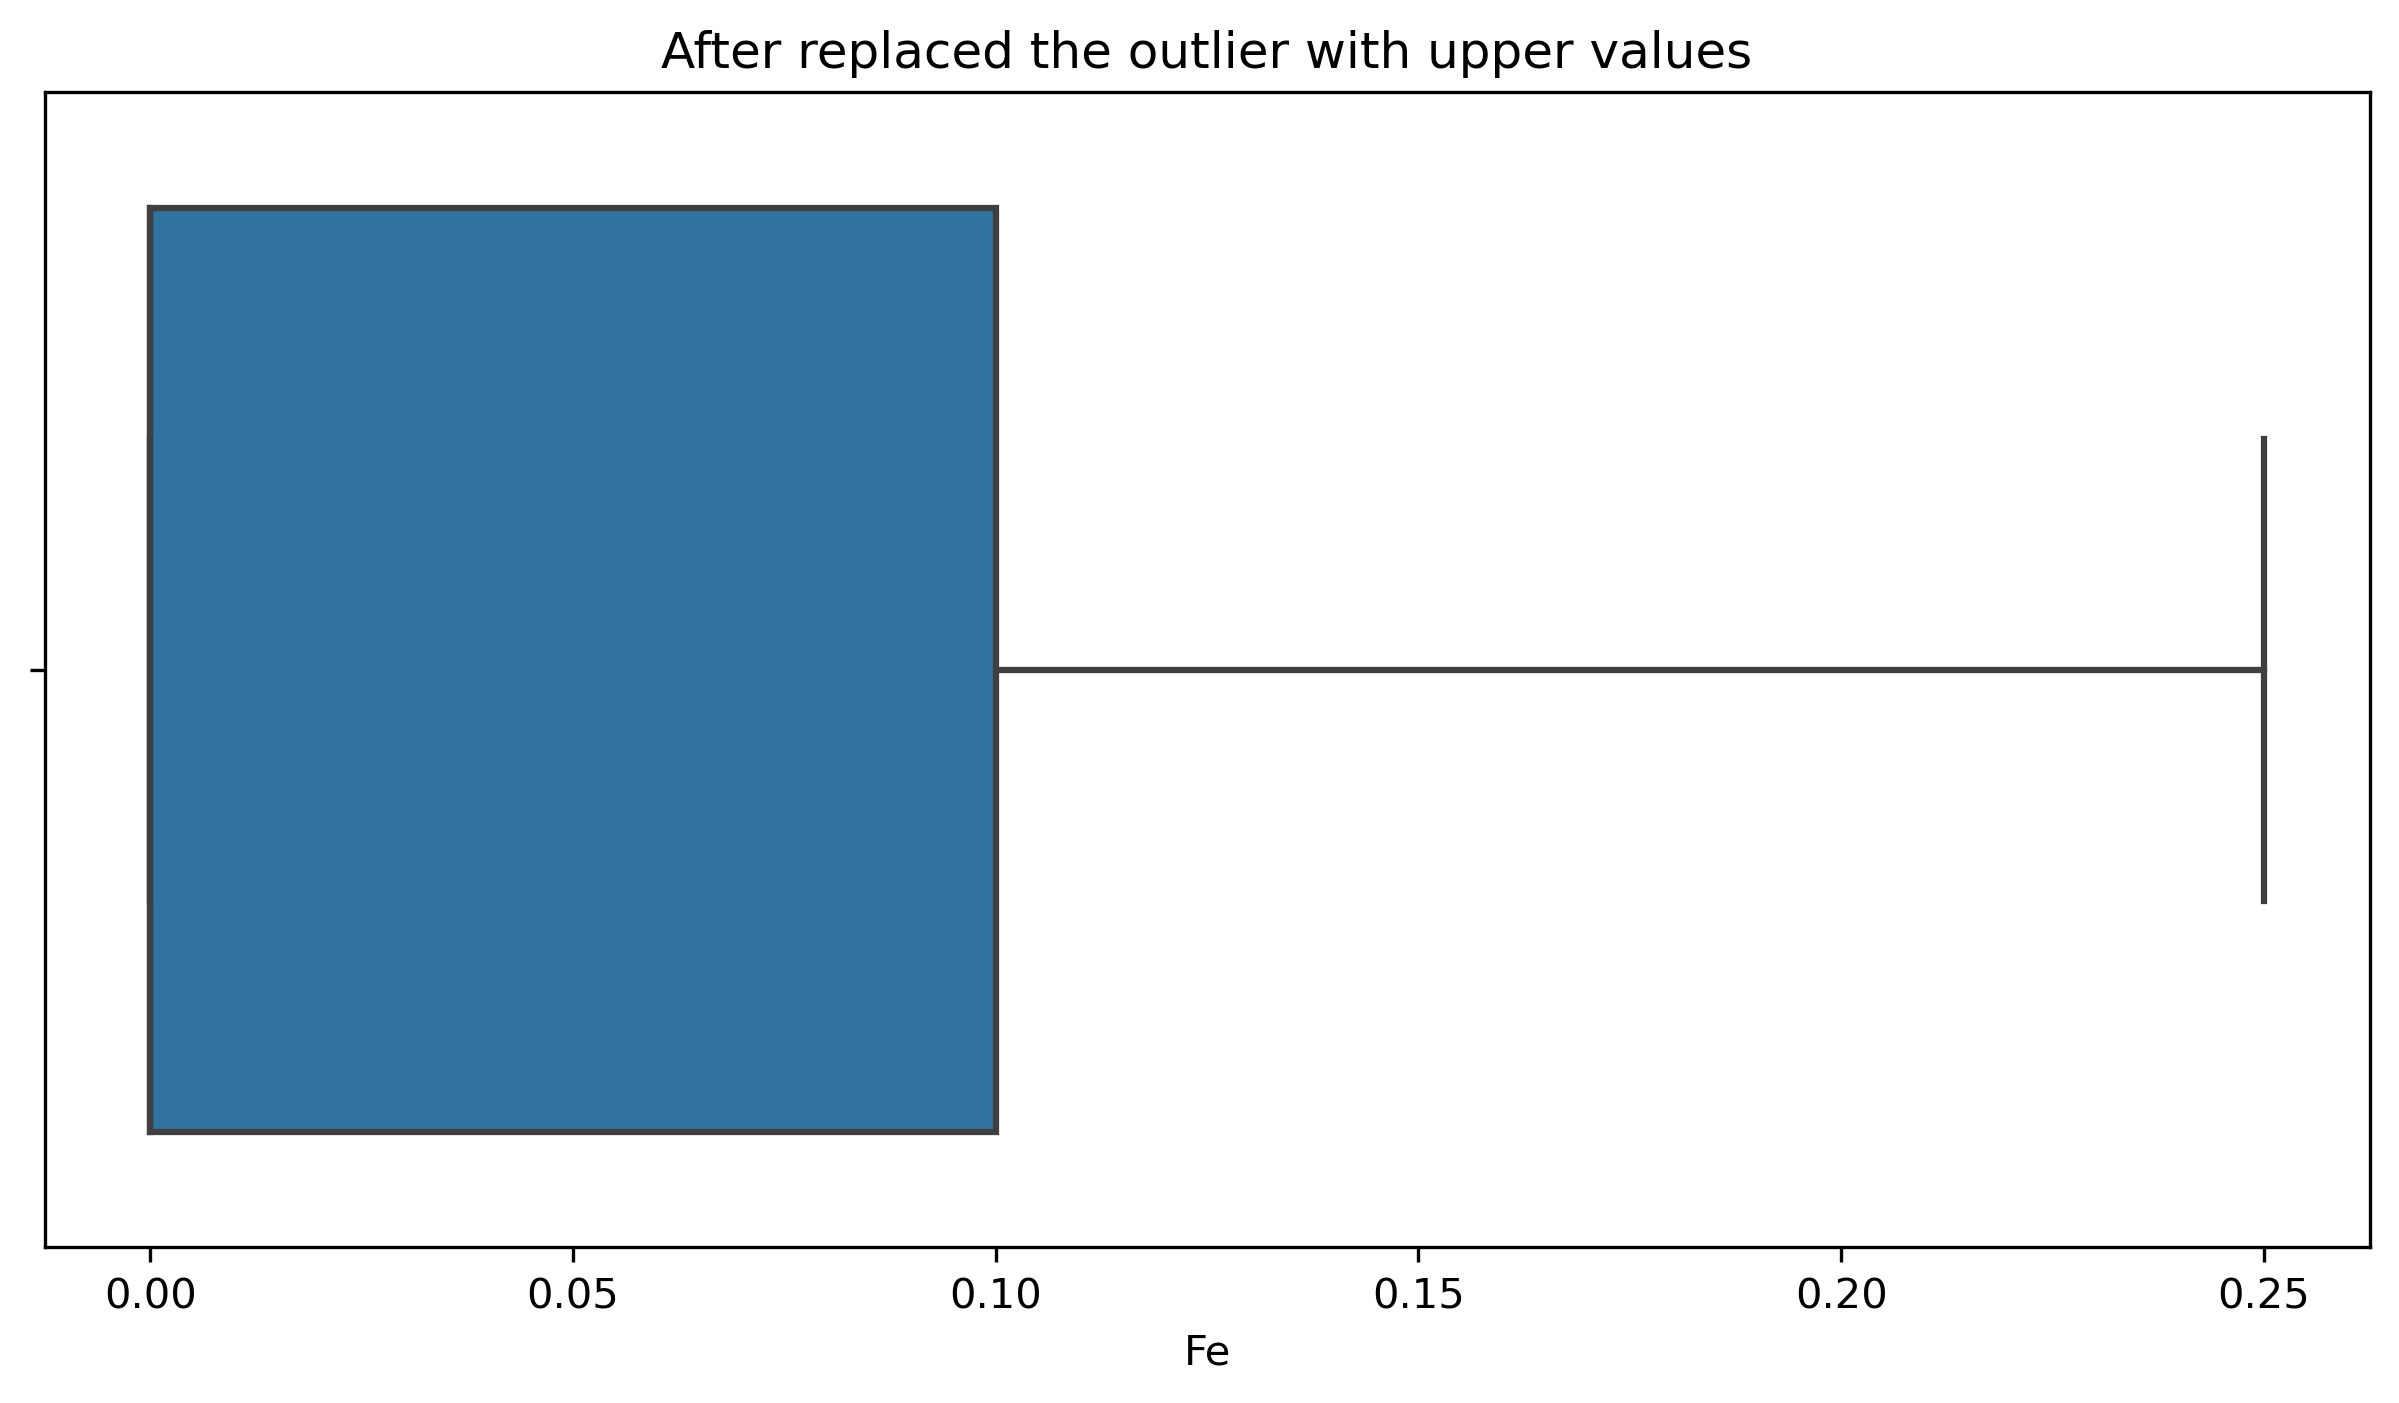

In [195]:
sns.boxplot(x = df["Fe"])
plt.xlabel("Fe")
plt.title("After replaced the outlier with upper values")

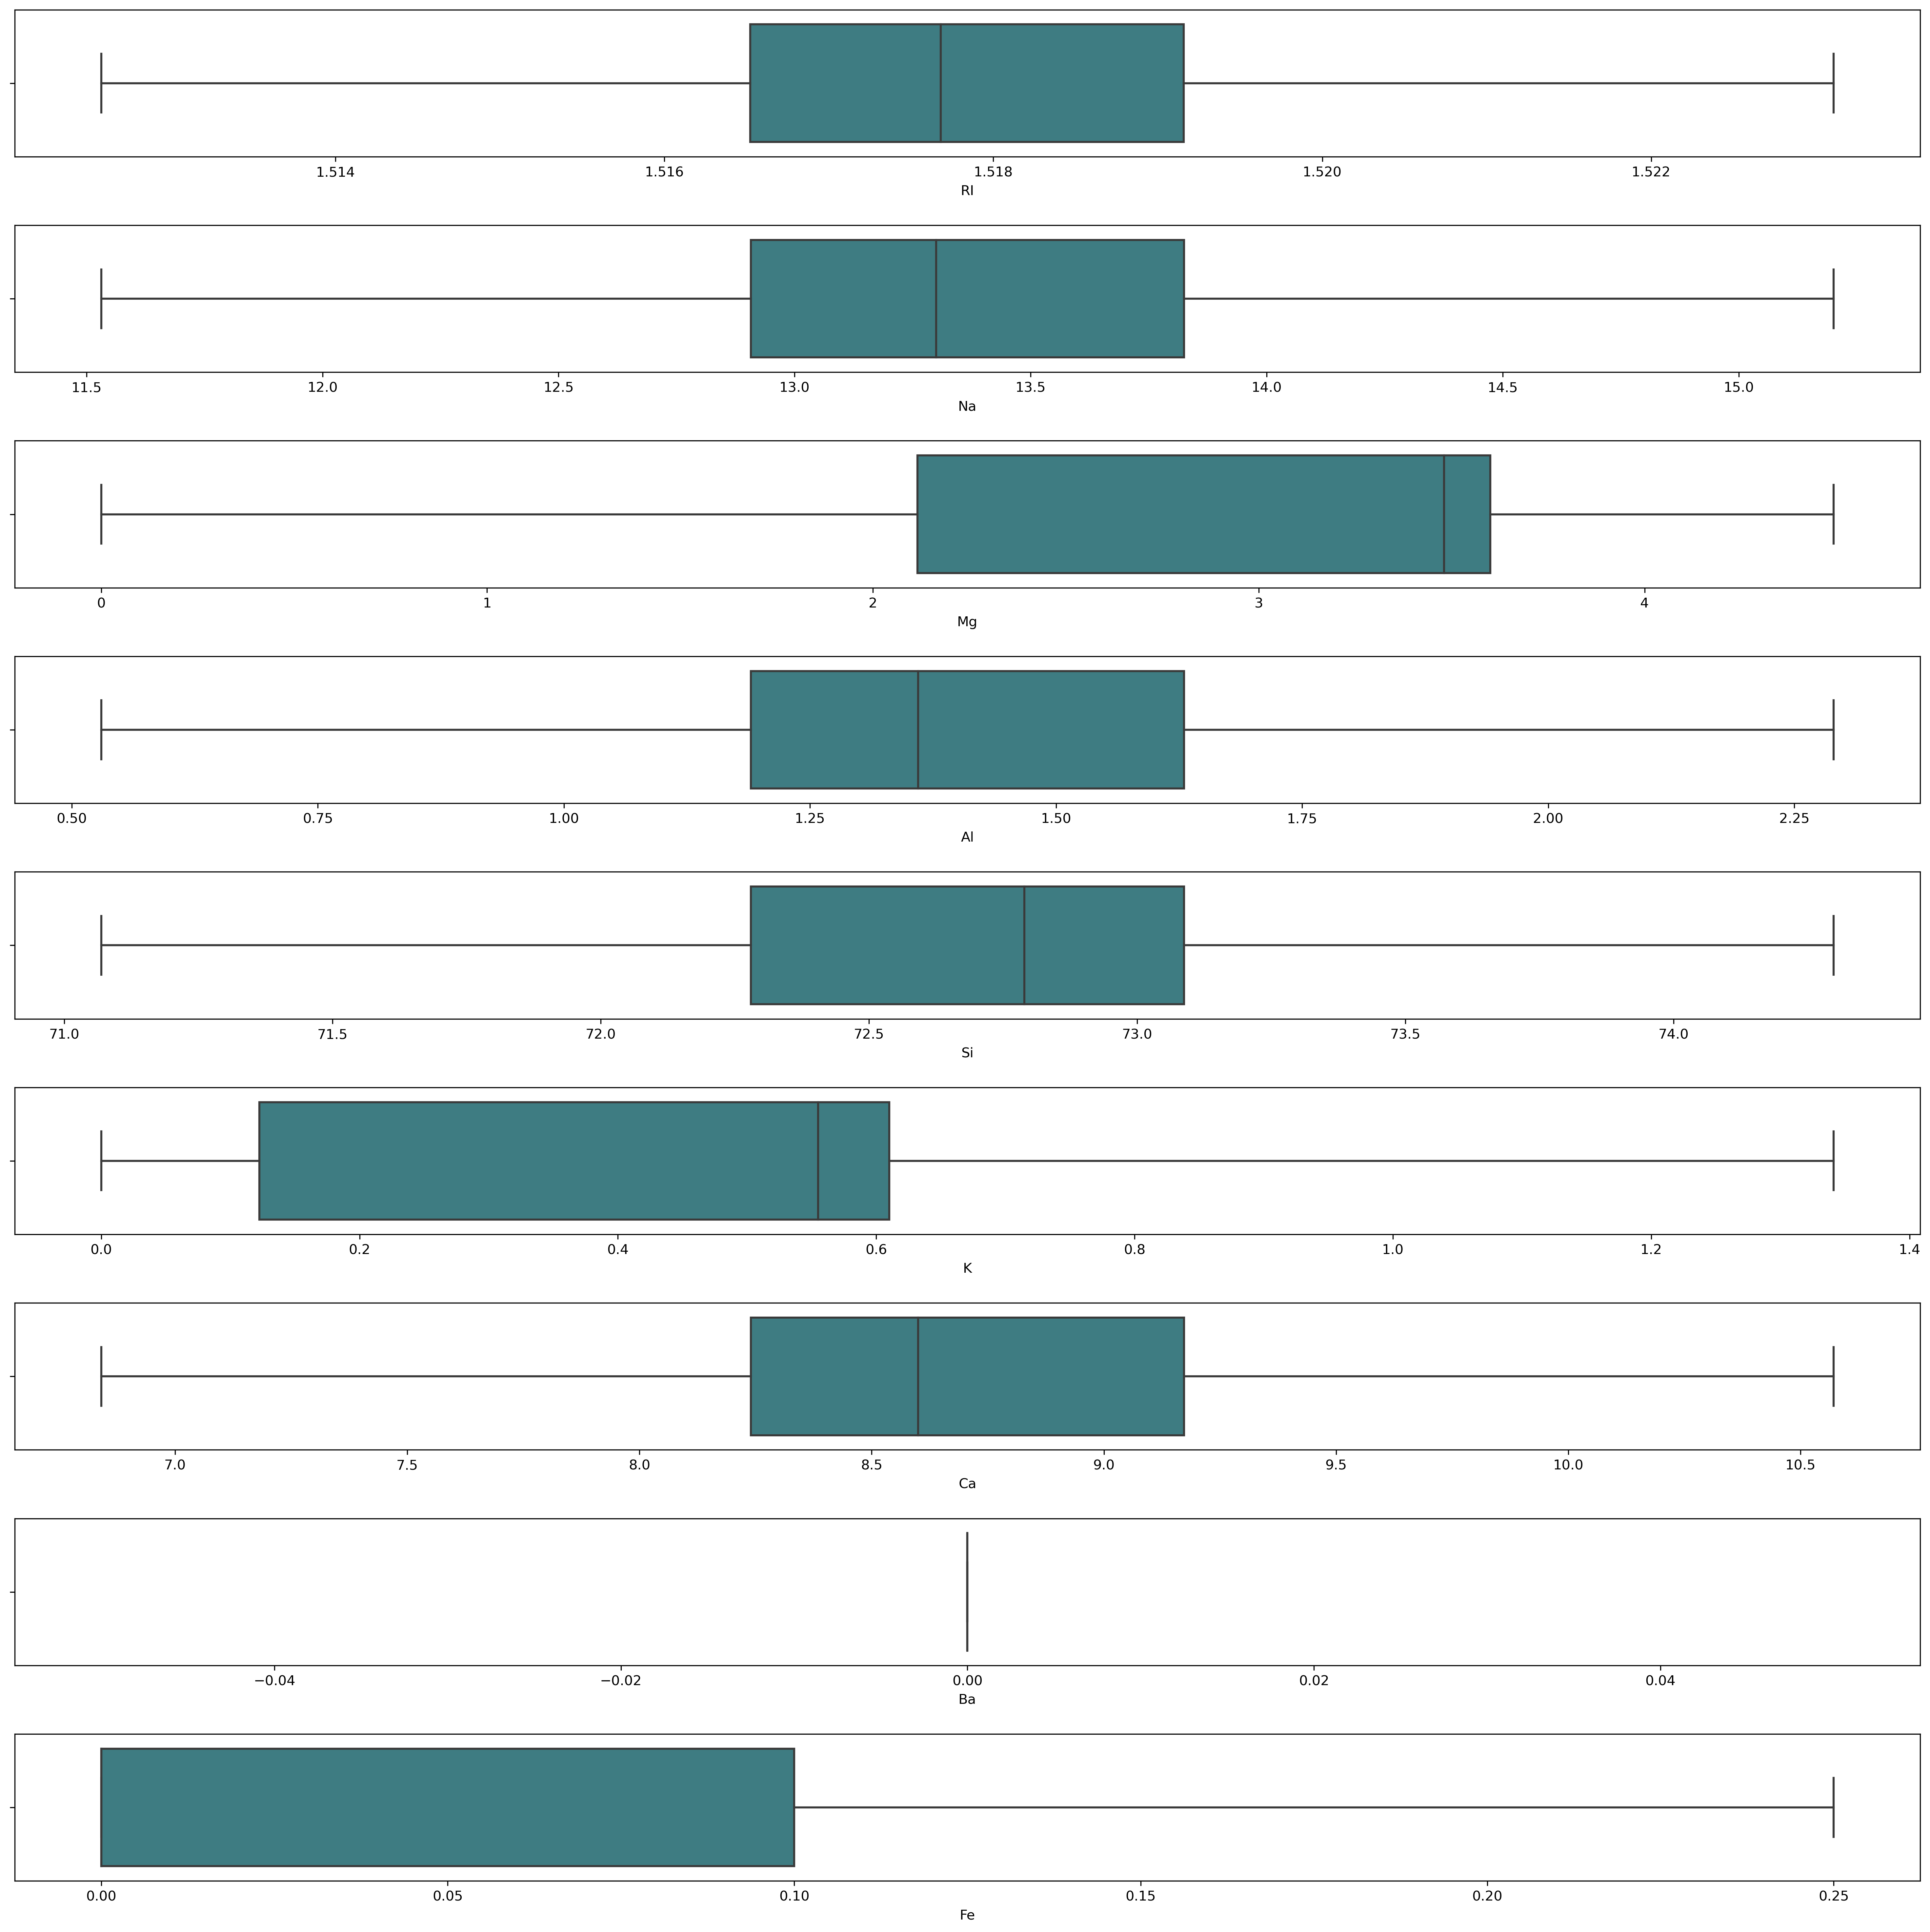

In [196]:
ot=df.copy() 
fig, axes=plt.subplots(9,1,figsize=(20,20),sharex=False,sharey=False)
sns.boxplot(x='RI',data=ot,palette='crest',ax=axes[0])
sns.boxplot(x='Na',data=ot,palette='crest',ax=axes[1])
sns.boxplot(x='Mg',data=ot,palette='crest',ax=axes[2])
sns.boxplot(x='Al',data=ot,palette='crest',ax=axes[3])
sns.boxplot(x='Si',data=ot,palette='crest',ax=axes[4])
sns.boxplot(x='K',data=ot,palette='crest',ax=axes[5])
sns.boxplot(x='Ca',data=ot,palette='crest',ax=axes[6])
sns.boxplot(x='Ba',data=ot,palette='crest',ax=axes[7])
sns.boxplot(x='Fe',data=ot,palette='crest',ax=axes[8])
plt.tight_layout(pad=2.0)

# Scatter Plot and Correlation

In [76]:
sns.pairplot(df)

# Correlation coefficient

In [77]:
df.corr()

RI        Na        Mg        Al        Si         K        Ca  \
RI    1.000000 -0.073253 -0.039252 -0.461742 -0.527160 -0.339614  0.759893   
Na   -0.073253  1.000000 -0.300473  0.222529 -0.158835 -0.490592 -0.107415   
Mg   -0.039252 -0.300473  1.000000 -0.472330 -0.206681  0.332027 -0.375568   
Al   -0.461742  0.222529 -0.472330  1.000000  0.131125  0.174972 -0.276127   
Si   -0.527160 -0.158835 -0.206681  0.131125  1.000000 -0.041506 -0.187644   
K    -0.339614 -0.490592  0.332027  0.174972 -0.041506  1.000000 -0.496808   
Ca    0.759893 -0.107415 -0.375568 -0.276127 -0.187644 -0.496808  1.000000   
Ba         NaN       NaN       NaN       NaN       NaN       NaN       NaN   
Fe    0.100253 -0.249135  0.104381 -0.096567 -0.068527  0.075500  0.106326   
Type -0.163355  0.530390 -0.744195  0.604312  0.176558 -0.249915  0.048932   

      Ba        Fe      Type  
RI   NaN  0.100253 -0.163355  
Na   NaN -0.249135  0.530390  
Mg   NaN  0.104381 -0.744195  
Al   NaN -0.096567  0.604312  
Si   NaN -0.068527  0.176558  
K    NaN  0.075500 -0.249915  
Ca   NaN  0.106326  0.048932  
Ba   NaN       NaN       NaN  
Fe   NaN  1.000000 -0.222014  
Type NaN -0.222014  1.000000

<Axes: >

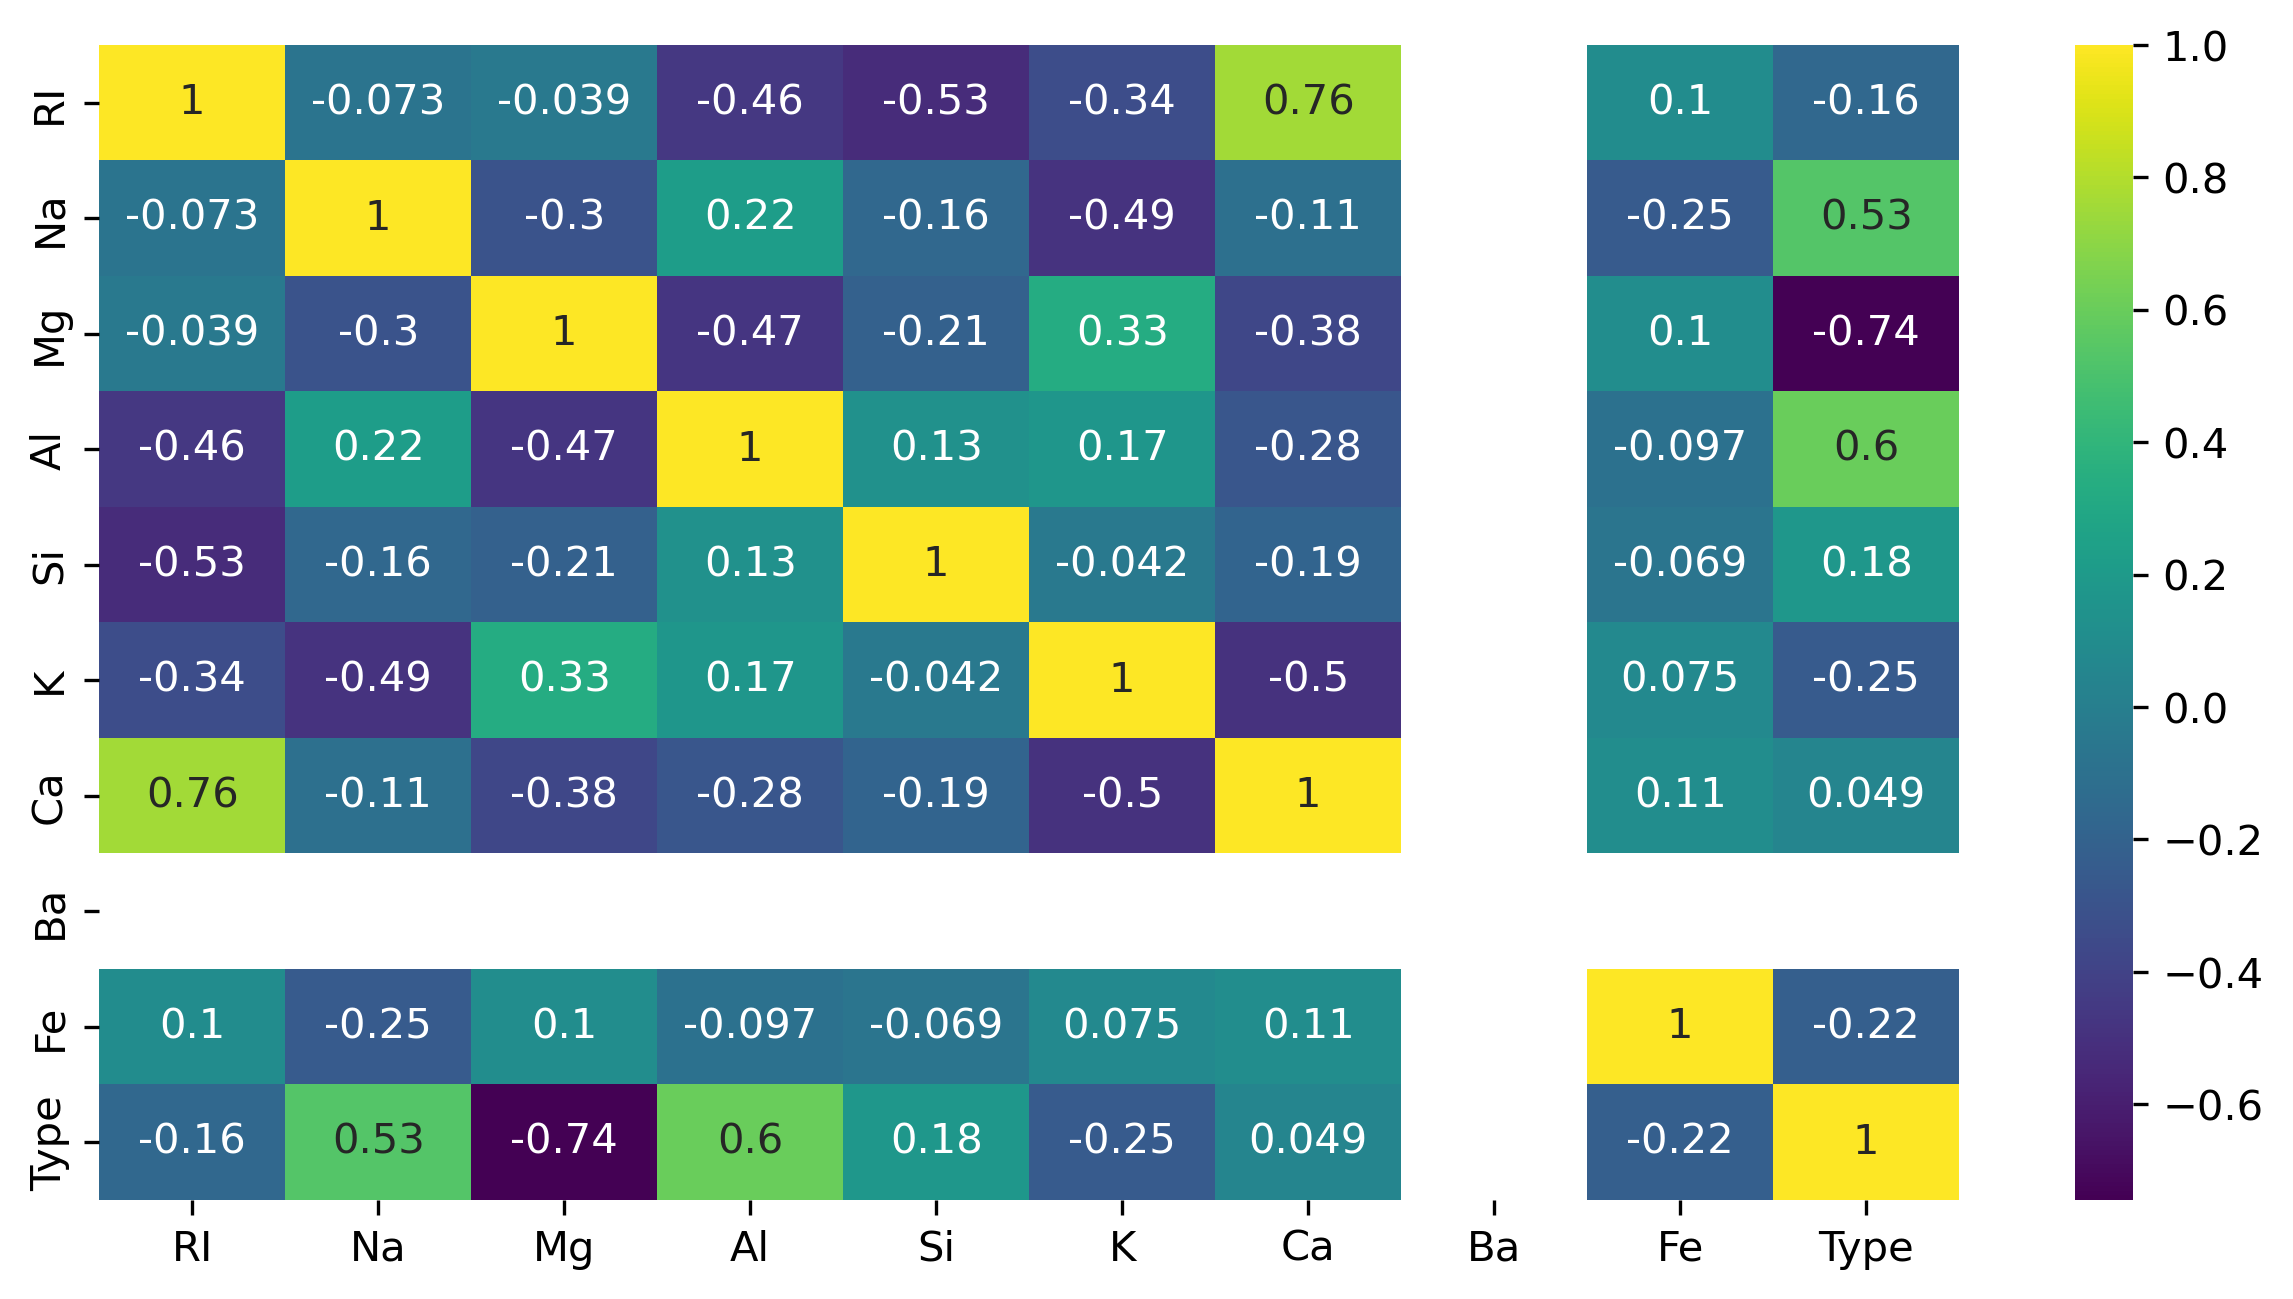

In [78]:
sns.heatmap(df.corr(),annot=True, cmap="viridis")

# Transformations

- Machines do not understand words and sentences.
- Machines only understand numbers.
- Before model building, we have convert all the categorical columns into numerical.

In [79]:
df.head()

RI     Na    Mg    Al     Si     K    Ca   Ba   Fe  Type
0  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.0     1
1  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.0     1
2  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.0     1
3  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.0     1
4  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.0     1

In [80]:
df.dtypes

RI      float64
Na      float64
Mg      float64
Al      float64
Si      float64
K       float64
Ca      float64
Ba      float64
Fe      float64
Type      int64
dtype: object

# Looking at the table above, all of the columns are numerical. Therefore, there is no need for transformations here.

# PPS Score

In [81]:
pip install ppscore

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [197]:
import ppscore as ps

In [198]:
df.head()

RI     Na    Mg    Al     Si     K    Ca   Ba   Fe  Type
0  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.0     1
1  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.0     1
2  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.0     1
3  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.0     1
4  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.0     1

In [199]:
ps.score(df, x='RI',y = 'Type')

{'x': 'RI',
 'y': 'Type',
 'ppscore': 0,
 'case': 'regression',
 'is_valid_score': True,
 'metric': 'mean absolute error',
 'baseline_score': 1.4345794392523366,
 'model_score': 1.6429929536454693,
 'model': DecisionTreeRegressor()}

In [200]:
feature_sel = ps.matrix(df)

In [201]:
feature_sel 

x     y   ppscore                case  is_valid_score  \
0     RI    RI  1.000000      predict_itself            True   
1     RI    Na  0.000000          regression            True   
2     RI    Mg  0.000000          regression            True   
3     RI    Al  0.099566          regression            True   
4     RI    Si  0.054987          regression            True   
..   ...   ...       ...                 ...             ...   
95  Type     K  0.083883          regression            True   
96  Type    Ca  0.013935          regression            True   
97  Type    Ba  0.000000  target_is_constant            True   
98  Type    Fe  0.000000          regression            True   
99  Type  Type  1.000000      predict_itself            True   

                 metric  baseline_score  model_score                    model  
0                  None        0.000000     1.000000                     None  
1   mean absolute error        0.568581     0.667760  DecisionTreeRegressor()  
2   mean absolute error        0.962757     1.145286  DecisionTreeRegressor()  
3   mean absolute error        0.324626     0.292304  DecisionTreeRegressor()  
4   mean absolute error        0.499977     0.472485  DecisionTreeRegressor()  
..                  ...             ...          ...                      ...  
95  mean absolute error        0.231256     0.211857  DecisionTreeRegressor()  
96  mean absolute error        0.650794     0.641726  DecisionTreeRegressor()  
97                 None        1.000000     1.000000                     None  
98  mean absolute error        0.052850     0.067831  DecisionTreeRegressor()  
99                 None        0.000000     1.000000                     None  

[100 rows x 9 columns]

In [205]:
feature_sel[feature_sel['y'] == "Type"]

x     y   ppscore            case  is_valid_score               metric  \
9     RI  Type  0.000000      regression            True  mean absolute error   
19    Na  Type  0.076969      regression            True  mean absolute error   
29    Mg  Type  0.224171      regression            True  mean absolute error   
39    Al  Type  0.101432      regression            True  mean absolute error   
49    Si  Type  0.000000      regression            True  mean absolute error   
59     K  Type  0.254681      regression            True  mean absolute error   
69    Ca  Type  0.000000      regression            True  mean absolute error   
79    Ba  Type  0.000000      regression            True  mean absolute error   
89    Fe  Type  0.000000      regression            True  mean absolute error   
99  Type  Type  1.000000  predict_itself            True                 None   

    baseline_score  model_score                    model  
9         1.434579     1.642993  DecisionTreeRegressor()  
19        1.434579     1.324161  DecisionTreeRegressor()  
29        1.434579     1.112989  DecisionTreeRegressor()  
39        1.434579     1.289067  DecisionTreeRegressor()  
49        1.434579     1.870187  DecisionTreeRegressor()  
59        1.434579     1.069220  DecisionTreeRegressor()  
69        1.434579     1.741161  DecisionTreeRegressor()  
79        1.434579     1.728950  DecisionTreeRegressor()  
89        1.434579     1.750569  DecisionTreeRegressor()  
99        0.000000     1.000000                     None

# Feature Selection

In [206]:
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from yellowbrick.model_selection import rfecv
sns.set_theme(style='darkgrid', palette='rainbow')

# Define x and y

In [208]:
x = df.iloc[:,:-1]
y = df['Type']

In [209]:
x

RI     Na    Mg    Al     Si     K    Ca   Ba   Fe
0    1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.0
1    1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.0
2    1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.0
3    1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.0
4    1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.0
..       ...    ...   ...   ...    ...   ...   ...  ...  ...
209  1.51623  14.14  0.00  2.29  72.61  0.08  9.18  0.0  0.0
210  1.51685  14.92  0.00  1.99  73.06  0.00  8.40  0.0  0.0
211  1.52065  14.36  0.00  2.02  73.42  0.00  8.44  0.0  0.0
212  1.51651  14.38  0.00  1.94  73.61  0.00  8.48  0.0  0.0
213  1.51711  14.23  0.00  2.08  73.36  0.00  8.62  0.0  0.0

[214 rows x 9 columns]

In [210]:
y

0      1
1      1
2      1
3      1
4      1
      ..
209    7
210    7
211    7
212    7
213    7
Name: Type, Length: 214, dtype: int64

# Univariate Selection

- We use Chi2 test to perform the feature selection.
- When two features are independent, the observed count is close to the expected count, thus we will have smaller Chi-Square value. So high Chi-Square value indicates that the hypothesis of independence is incorrect. 
- In simple words, higher the Chi-Square value the feature is more dependent on the response and it can be selected for model training.

# Chi square for feature selection

In [211]:
test = SelectKBest(score_func=chi2, k = 5)

test.fit(x,y)

SelectKBest(k=5, score_func=<function chi2 at 0x00000158CACA74C0>)

In [212]:
x.columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe'], dtype='object')

In [213]:
test.scores_

array([3.90043901e-05, 3.74468494e+00, 1.00984212e+02, 1.24963006e+01,
       8.20956829e-02, 9.24708080e+00, 1.41191044e+00,            nan,
       2.09444744e+00])

In [218]:
df.describe().T

count       mean       std        min        25%       50%        75%  \
RI    214.0   1.518165  0.002373   1.512575   1.516522   1.51768   1.519157   
Na    214.0  13.405181  0.742792  11.531250  12.907500  13.30000  13.825000   
Mg    214.0   2.684533  1.442408   0.000000   2.115000   3.48000   3.600000   
Al    214.0   1.420794  0.424339   0.530000   1.190000   1.36000   1.630000   
Si    214.0  72.668949  0.658469  71.068750  72.280000  72.79000  73.087500   
K     214.0   0.440789  0.306640   0.000000   0.122500   0.55500   0.610000   
Ca    214.0   8.796741  0.873799   6.841250   8.240000   8.60000   9.172500   
Ba    214.0   0.000000  0.000000   0.000000   0.000000   0.00000   0.000000   
Fe    214.0   0.052850  0.085568   0.000000   0.000000   0.00000   0.100000   
Type  214.0   2.780374  2.103739   1.000000   1.000000   2.00000   3.000000   

           max  
RI     1.52311  
Na    15.20125  
Mg     4.49000  
Al     2.29000  
Si    74.29875  
K      1.34125  
Ca    10.57125  
Ba     0.00000  
Fe     0.25000  
Type   7.00000

In [219]:
pd.DataFrame({
    'Features' : x.columns,
    'Test' : test.scores_
})

Features        Test
0       RI    0.000039
1       Na    3.744685
2       Mg  100.984212
3       Al   12.496301
4       Si    0.082096
5        K    9.247081
6       Ca    1.411910
7       Ba         NaN
8       Fe    2.094447

In [220]:
pd.DataFrame(test.scores_).T

0         1           2          3         4         5        6   7  \
0  0.000039  3.744685  100.984212  12.496301  0.082096  9.247081  1.41191 NaN   

          8  
0  2.094447

In [221]:
univariate = pd.DataFrame(test.scores_).T
univariate
univariate.columns = x.columns
univariate

RI        Na          Mg         Al        Si         K       Ca  Ba  \
0  0.000039  3.744685  100.984212  12.496301  0.082096  9.247081  1.41191 NaN   

         Fe  
0  2.094447

# 
- Mg
- Ai
- K
- Na
- Fe
- Ca

# Recursive Feature Elimination

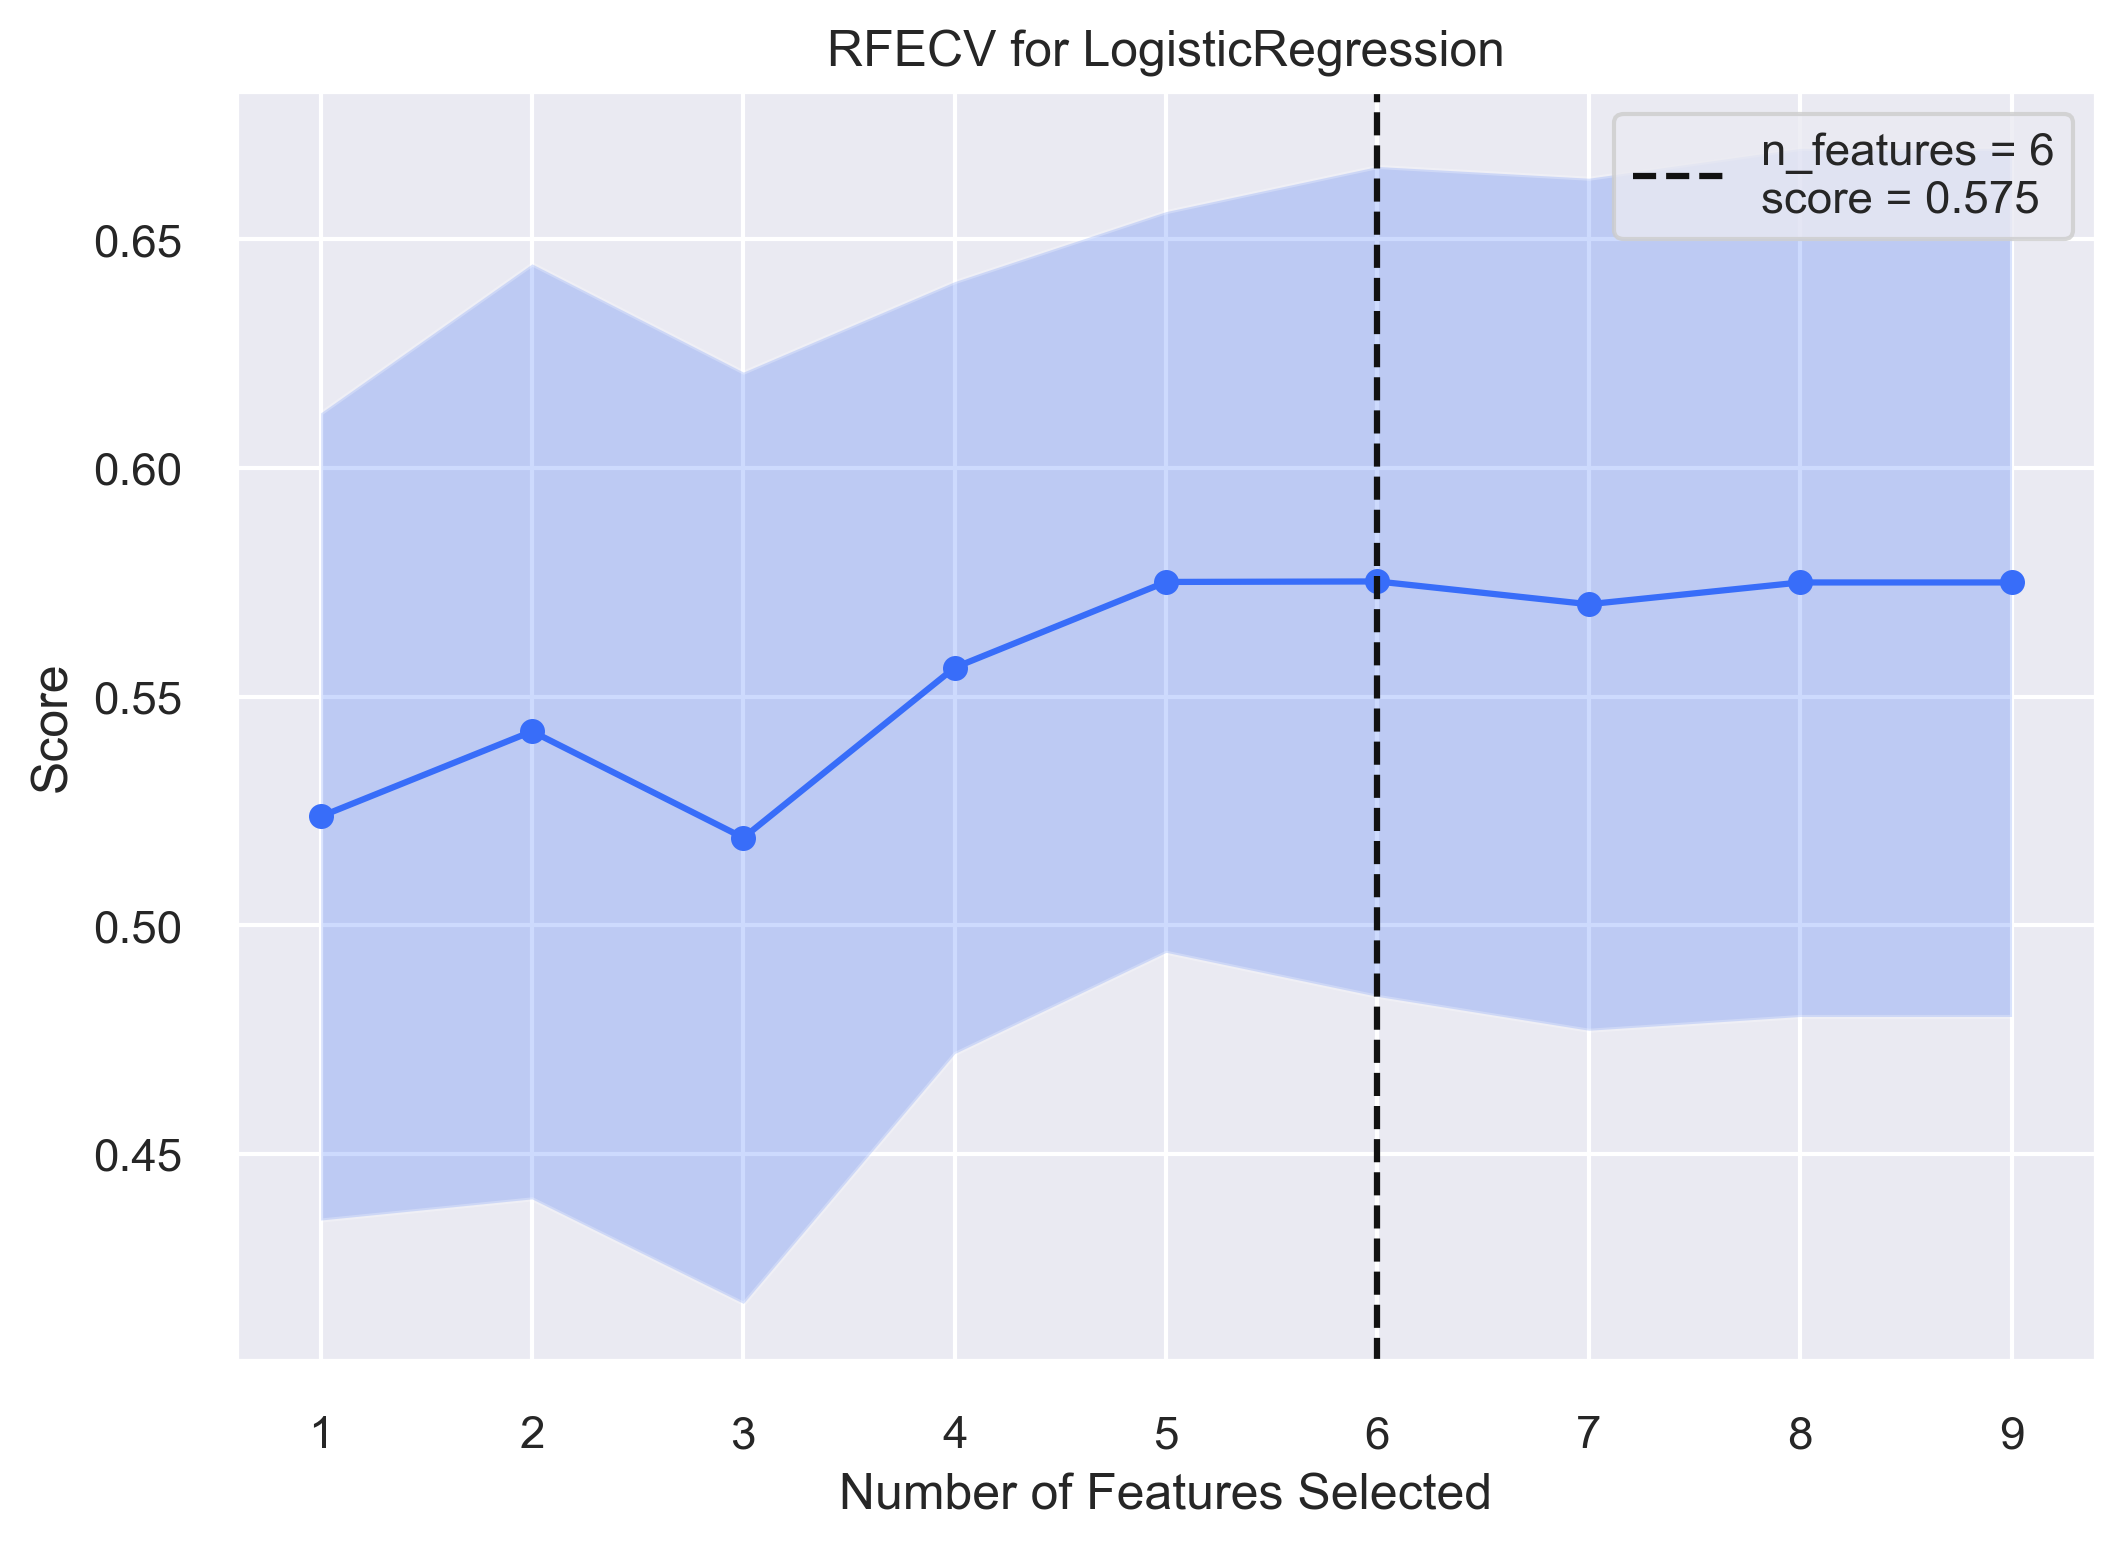

In [223]:
rfe = rfecv(LogisticRegression(),x,y)

In [224]:
rfe.ranking_

array([3, 1, 1, 1, 2, 1, 1, 4, 1])

In [225]:
rfe_Sel = pd.DataFrame({
    'Ranking' : rfe.ranking_,
    'Features' : x.columns
})

In [226]:
rfe_Sel

Ranking Features
0        3       RI
1        1       Na
2        1       Mg
3        1       Al
4        2       Si
5        1        K
6        1       Ca
7        4       Ba
8        1       Fe

In [227]:
rfe_Sel[rfe_Sel['Ranking']==1]

Ranking Features
1        1       Na
2        1       Mg
3        1       Al
5        1        K
6        1       Ca
8        1       Fe

# Tree Based method

In [228]:
dt = DecisionTreeClassifier()

dt.fit(x,y)

DecisionTreeClassifier()

In [229]:
dt.feature_importances_

array([0.15454176, 0.05764096, 0.22368453, 0.21662929, 0.07427863,
       0.08770434, 0.1520049 , 0.        , 0.03351559])

In [230]:
ig_sel = pd.DataFrame({
    'IG': dt.feature_importances_,
    'Features' : x.columns
})

In [231]:
ig_sel

IG Features
0  0.154542       RI
1  0.057641       Na
2  0.223685       Mg
3  0.216629       Al
4  0.074279       Si
5  0.087704        K
6  0.152005       Ca
7  0.000000       Ba
8  0.033516       Fe

In [232]:
ig_sel.sort_values(by='IG', ascending=False)

IG Features
2  0.223685       Mg
3  0.216629       Al
0  0.154542       RI
6  0.152005       Ca
5  0.087704        K
4  0.074279       Si
1  0.057641       Na
8  0.033516       Fe
7  0.000000       Ba

# 
- Mg
- Al
- RI
- Ca
- K
- Si

# When examining at the above Feature Selection, the three approaches show that some of the columns are impotans. As a result, I need to select the six columns that are the same in all three techniques.

# Final Six Columns to create final model building

- Mg
- Ai
- Ca
- K
- Fe
- Na


In [233]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import tree

# Model Builindg

<Axes: xlabel='Type', ylabel='count'>

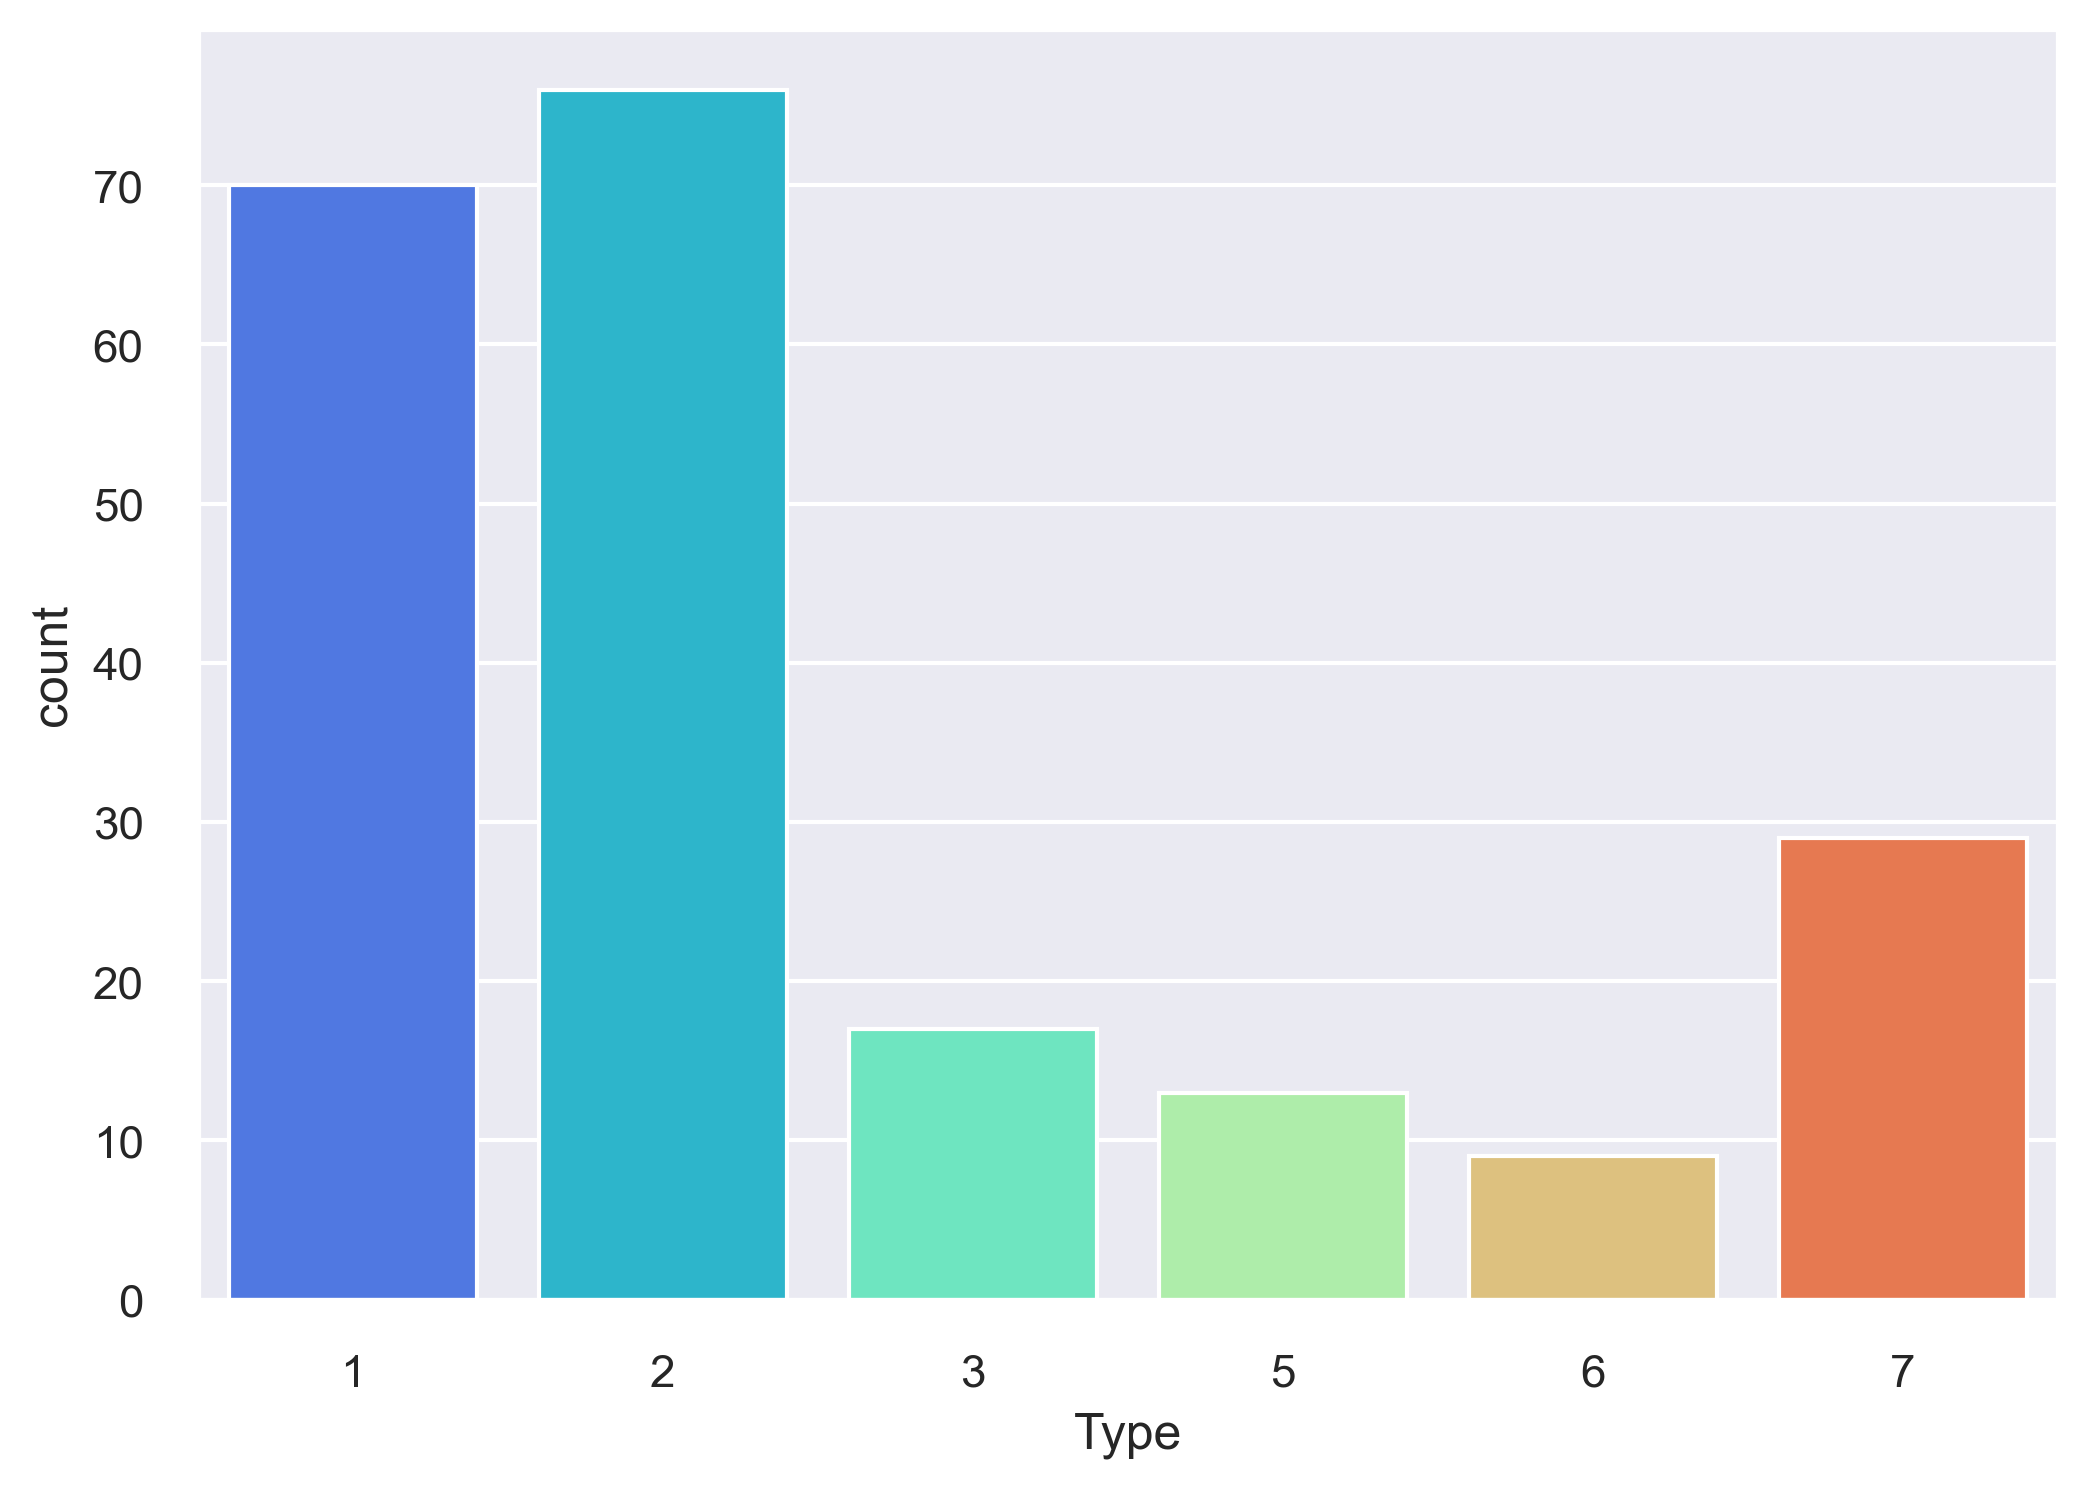

In [234]:
sns.countplot(x = df['Type'])

# Evaluate model

In [239]:
x = df[["Mg", "Al", "Ca", "K", "Fe", "Na"]]
y = df['Type']

In [240]:
x

Mg    Al    Ca     K   Fe     Na
0    4.49  1.10  8.75  0.06  0.0  13.64
1    3.60  1.36  7.83  0.48  0.0  13.89
2    3.55  1.54  7.78  0.39  0.0  13.53
3    3.69  1.29  8.22  0.57  0.0  13.21
4    3.62  1.24  8.07  0.55  0.0  13.27
..    ...   ...   ...   ...  ...    ...
209  0.00  2.29  9.18  0.08  0.0  14.14
210  0.00  1.99  8.40  0.00  0.0  14.92
211  0.00  2.02  8.44  0.00  0.0  14.36
212  0.00  1.94  8.48  0.00  0.0  14.38
213  0.00  2.08  8.62  0.00  0.0  14.23

[214 rows x 6 columns]

In [241]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2, random_state=42)

In [242]:
rfc = RandomForestClassifier()
rfc.fit(xtrain,ytrain)
yp = rfc.predict(xtest)

In [243]:
xtest

Mg    Al        Ca        K    Fe        Na
9    3.60  1.36   8.40000  0.57000  0.11  13.00000
197  0.00  2.29   8.95000  0.00000  0.00  14.70000
66   3.65  0.87   9.85000  0.19000  0.17  13.05000
191  0.00  2.29   8.76000  0.00000  0.09  14.85000
117  3.68  1.81   7.88000  0.64000  0.00  13.72000
111  0.00  0.75  10.57125  0.00000  0.00  11.53125
15   3.54  1.23   8.39000  0.58000  0.00  12.81000
86   3.49  1.47   8.03000  0.38000  0.00  13.24000
75   3.58  1.51   7.96000  0.69000  0.00  13.02000
144  3.18  1.23   8.81000  0.58000  0.24  12.99000
182  0.00  2.09  10.57125  0.00000  0.00  14.15000
170  0.00  1.58  10.57125  0.32000  0.00  13.44000
141  3.63  1.07   8.41000  0.57000  0.17  13.20000
73   3.57  1.57   7.89000  0.61000  0.00  13.34000
178  2.24  1.62   9.26000  0.00000  0.00  14.46000
167  0.00  1.65  10.57125  0.38000  0.00  12.64000
190  1.78  1.79   8.67000  0.00000  0.00  13.88000
18   3.73  1.18   8.89000  0.06000  0.00  13.90000
45   3.48  1.35   9.00000  0.55000  0.00  13.49000
184  0.00  0.53   6.84125  0.00000  0.00  15.20125
98   2.88  1.71   8.54000  0.73000  0.00  12.67000
209  0.00  2.29   9.18000  0.08000  0.00  14.14000
211  0.00  2.02   8.44000  0.00000  0.00  14.36000
195  0.00  2.29   9.07000  0.08000  0.05  14.14000
148  3.57  1.38   8.44000  0.56000  0.10  13.24000
104  2.90  1.17  10.57125  0.08000  0.00  13.83000
30   3.56  1.30   8.69000  0.61000  0.14  12.65000
25   3.54  1.21   8.53000  0.65000  0.00  12.98000
175  0.33  1.51  10.57125  0.13000  0.25  12.97000
16   3.67  1.16   8.70000  0.61000  0.00  12.68000
55   2.71  1.29   9.06000  0.56000  0.24  12.45000
138  3.52  1.54   7.90000  0.66000  0.00  12.79000
158  3.41  1.52   8.79000  0.58000  0.00  13.53000
93   3.34  1.47   8.22000  0.39000  0.00  13.24000
69   3.58  0.82  10.17000  0.12000  0.03  13.31000
203  0.00  1.99   8.28000  0.00000  0.00  14.80000
171  0.00  2.29   6.96000  1.34125  0.00  13.02000
152  3.65  0.65   8.93000  0.06000  0.00  13.64000
97   3.25  1.16   8.90000  0.62000  0.24  12.20000
84   3.09  2.08   7.08000  1.10000  0.00  14.25000
101  2.72  1.63   9.23000  0.70000  0.00  12.35000
200  0.00  2.25   8.34000  0.00000  0.00  15.15000
60   3.62  1.11   8.76000  0.14000  0.00  13.60000

In [244]:
yp

array([1, 7, 1, 7, 2, 2, 1, 2, 2, 1, 7, 5, 1, 2, 6, 5, 6, 1, 1, 6, 2, 7,
       7, 7, 1, 2, 1, 1, 2, 1, 2, 2, 2, 2, 1, 7, 5, 1, 1, 7, 2, 7, 1],
      dtype=int64)

In [245]:
print(classification_report(ytest,yp))

              precision    recall  f1-score   support

           1       0.67      0.91      0.77        11
           2       0.77      0.71      0.74        14
           3       0.00      0.00      0.00         3
           5       1.00      0.75      0.86         4
           6       0.67      0.67      0.67         3
           7       0.78      0.88      0.82         8

    accuracy                           0.74        43
   macro avg       0.65      0.65      0.64        43
weighted avg       0.71      0.74      0.72        43



In [252]:
x = df.iloc[:,:-1]
y = df["Type"]

In [253]:
x

RI     Na    Mg    Al     Si     K    Ca   Ba   Fe
0    1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.0
1    1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.0
2    1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.0
3    1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.0
4    1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.0
..       ...    ...   ...   ...    ...   ...   ...  ...  ...
209  1.51623  14.14  0.00  2.29  72.61  0.08  9.18  0.0  0.0
210  1.51685  14.92  0.00  1.99  73.06  0.00  8.40  0.0  0.0
211  1.52065  14.36  0.00  2.02  73.42  0.00  8.44  0.0  0.0
212  1.51651  14.38  0.00  1.94  73.61  0.00  8.48  0.0  0.0
213  1.51711  14.23  0.00  2.08  73.36  0.00  8.62  0.0  0.0

[214 rows x 9 columns]

In [254]:
y

0      1
1      1
2      1
3      1
4      1
      ..
209    7
210    7
211    7
212    7
213    7
Name: Type, Length: 214, dtype: int64

In [255]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2, random_state=42)

In [256]:
rfc = RandomForestClassifier()
rfc.fit(xtrain,ytrain)
yp = rfc.predict(xtest)

In [257]:
xtest

RI        Na    Mg    Al        Si        K        Ca   Ba    Fe
9    1.517550  13.00000  3.60  1.36  72.99000  0.57000   8.40000  0.0  0.11
197  1.517270  14.70000  0.00  2.29  73.28000  0.00000   8.95000  0.0  0.00
66   1.521520  13.05000  3.65  0.87  72.22000  0.19000   9.85000  0.0  0.17
191  1.516020  14.85000  0.00  2.29  73.28000  0.00000   8.76000  0.0  0.09
117  1.517080  13.72000  3.68  1.81  72.06000  0.64000   7.88000  0.0  0.00
111  1.523110  11.53125  0.00  0.75  73.08000  0.00000  10.57125  0.0  0.00
15   1.517610  12.81000  3.54  1.23  73.24000  0.58000   8.39000  0.0  0.00
86   1.515690  13.24000  3.49  1.47  73.25000  0.38000   8.03000  0.0  0.00
75   1.515900  13.02000  3.58  1.51  73.12000  0.69000   7.96000  0.0  0.00
144  1.516600  12.99000  3.18  1.23  72.97000  0.58000   8.81000  0.0  0.24
182  1.519160  14.15000  0.00  2.09  72.74000  0.00000  10.57125  0.0  0.00
170  1.523110  13.44000  0.00  1.58  72.22000  0.32000  10.57125  0.0  0.00
141  1.518510  13.20000  3.63  1.07  72.83000  0.57000   8.41000  0.0  0.17
73   1.516310  13.34000  3.57  1.57  72.87000  0.61000   7.89000  0.0  0.00
178  1.518290  14.46000  2.24  1.62  72.38000  0.00000   9.26000  0.0  0.00
167  1.519690  12.64000  0.00  1.65  73.75000  0.38000  10.57125  0.0  0.00
190  1.516130  13.88000  1.78  1.79  73.10000  0.00000   8.67000  0.0  0.00
18   1.519110  13.90000  3.73  1.18  72.12000  0.06000   8.89000  0.0  0.00
45   1.519000  13.49000  3.48  1.35  71.95000  0.55000   9.00000  0.0  0.00
184  1.512575  15.20125  0.00  0.53  74.29875  0.00000   6.84125  0.0  0.00
98   1.516890  12.67000  2.88  1.71  73.21000  0.73000   8.54000  0.0  0.00
209  1.516230  14.14000  0.00  2.29  72.61000  0.08000   9.18000  0.0  0.00
211  1.520650  14.36000  0.00  2.02  73.42000  0.00000   8.44000  0.0  0.00
195  1.515450  14.14000  0.00  2.29  73.39000  0.08000   9.07000  0.0  0.05
148  1.516700  13.24000  3.57  1.38  72.70000  0.56000   8.44000  0.0  0.10
104  1.523110  13.83000  2.90  1.17  71.15000  0.08000  10.57125  0.0  0.00
30   1.517680  12.65000  3.56  1.30  73.08000  0.61000   8.69000  0.0  0.14
25   1.517640  12.98000  3.54  1.21  73.00000  0.65000   8.53000  0.0  0.00
175  1.521190  12.97000  0.33  1.51  73.39000  0.13000  10.57125  0.0  0.25
16   1.517840  12.68000  3.67  1.16  73.11000  0.61000   8.70000  0.0  0.00
55   1.517690  12.45000  2.71  1.29  73.70000  0.56000   9.06000  0.0  0.24
138  1.516740  12.79000  3.52  1.54  73.36000  0.66000   7.90000  0.0  0.00
158  1.517760  13.53000  3.41  1.52  72.04000  0.58000   8.79000  0.0  0.00
93   1.515900  13.24000  3.34  1.47  73.10000  0.39000   8.22000  0.0  0.00
69   1.523000  13.31000  3.58  0.82  71.99000  0.12000  10.17000  0.0  0.03
203  1.516580  14.80000  0.00  1.99  73.11000  0.00000   8.28000  0.0  0.00
171  1.513160  13.02000  0.00  2.29  71.06875  1.34125   6.96000  0.0  0.00
152  1.517790  13.64000  3.65  0.65  73.00000  0.06000   8.93000  0.0  0.00
97   1.517430  12.20000  3.25  1.16  73.55000  0.62000   8.90000  0.0  0.24
84   1.514090  14.25000  3.09  2.08  72.28000  1.10000   7.08000  0.0  0.00
101  1.517300  12.35000  2.72  1.63  72.87000  0.70000   9.23000  0.0  0.00
200  1.515080  15.15000  0.00  2.25  73.50000  0.00000   8.34000  0.0  0.00
60   1.519050  13.60000  3.62  1.11  72.64000  0.14000   8.76000  0.0  0.00

In [259]:
yp

array([1, 7, 1, 7, 2, 2, 1, 2, 2, 1, 7, 2, 1, 2, 6, 5, 7, 1, 1, 6, 2, 7,
       7, 7, 3, 2, 1, 1, 2, 1, 1, 2, 3, 2, 1, 7, 5, 1, 1, 7, 2, 7, 1],
      dtype=int64)

In [260]:
print(classification_report(ytest,yp))

              precision    recall  f1-score   support

           1       0.73      1.00      0.85        11
           2       0.83      0.71      0.77        14
           3       1.00      0.67      0.80         3
           5       1.00      0.50      0.67         4
           6       1.00      0.67      0.80         3
           7       0.80      1.00      0.89         8

    accuracy                           0.81        43
   macro avg       0.89      0.76      0.80        43
weighted avg       0.84      0.81      0.81        43



# Visualize first 5 decision trees.

In [261]:
len(rfc.estimators_)

100

In [262]:
rfc.estimators_

[DecisionTreeClassifier(max_features='sqrt', random_state=178790143),
 DecisionTreeClassifier(max_features='sqrt', random_state=1778706353),
 DecisionTreeClassifier(max_features='sqrt', random_state=544033373),
 DecisionTreeClassifier(max_features='sqrt', random_state=439141322),
 DecisionTreeClassifier(max_features='sqrt', random_state=692830442),
 DecisionTreeClassifier(max_features='sqrt', random_state=836341221),
 DecisionTreeClassifier(max_features='sqrt', random_state=161589743),
 DecisionTreeClassifier(max_features='sqrt', random_state=728876972),
 DecisionTreeClassifier(max_features='sqrt', random_state=558238732),
 DecisionTreeClassifier(max_features='sqrt', random_state=1228792275),
 DecisionTreeClassifier(max_features='sqrt', random_state=338718305),
 DecisionTreeClassifier(max_features='sqrt', random_state=835048044),
 DecisionTreeClassifier(max_features='sqrt', random_state=884285440),
 DecisionTreeClassifier(max_features='sqrt', random_state=726400633),
 DecisionTreeClass

In [263]:
x.columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe'], dtype='object')

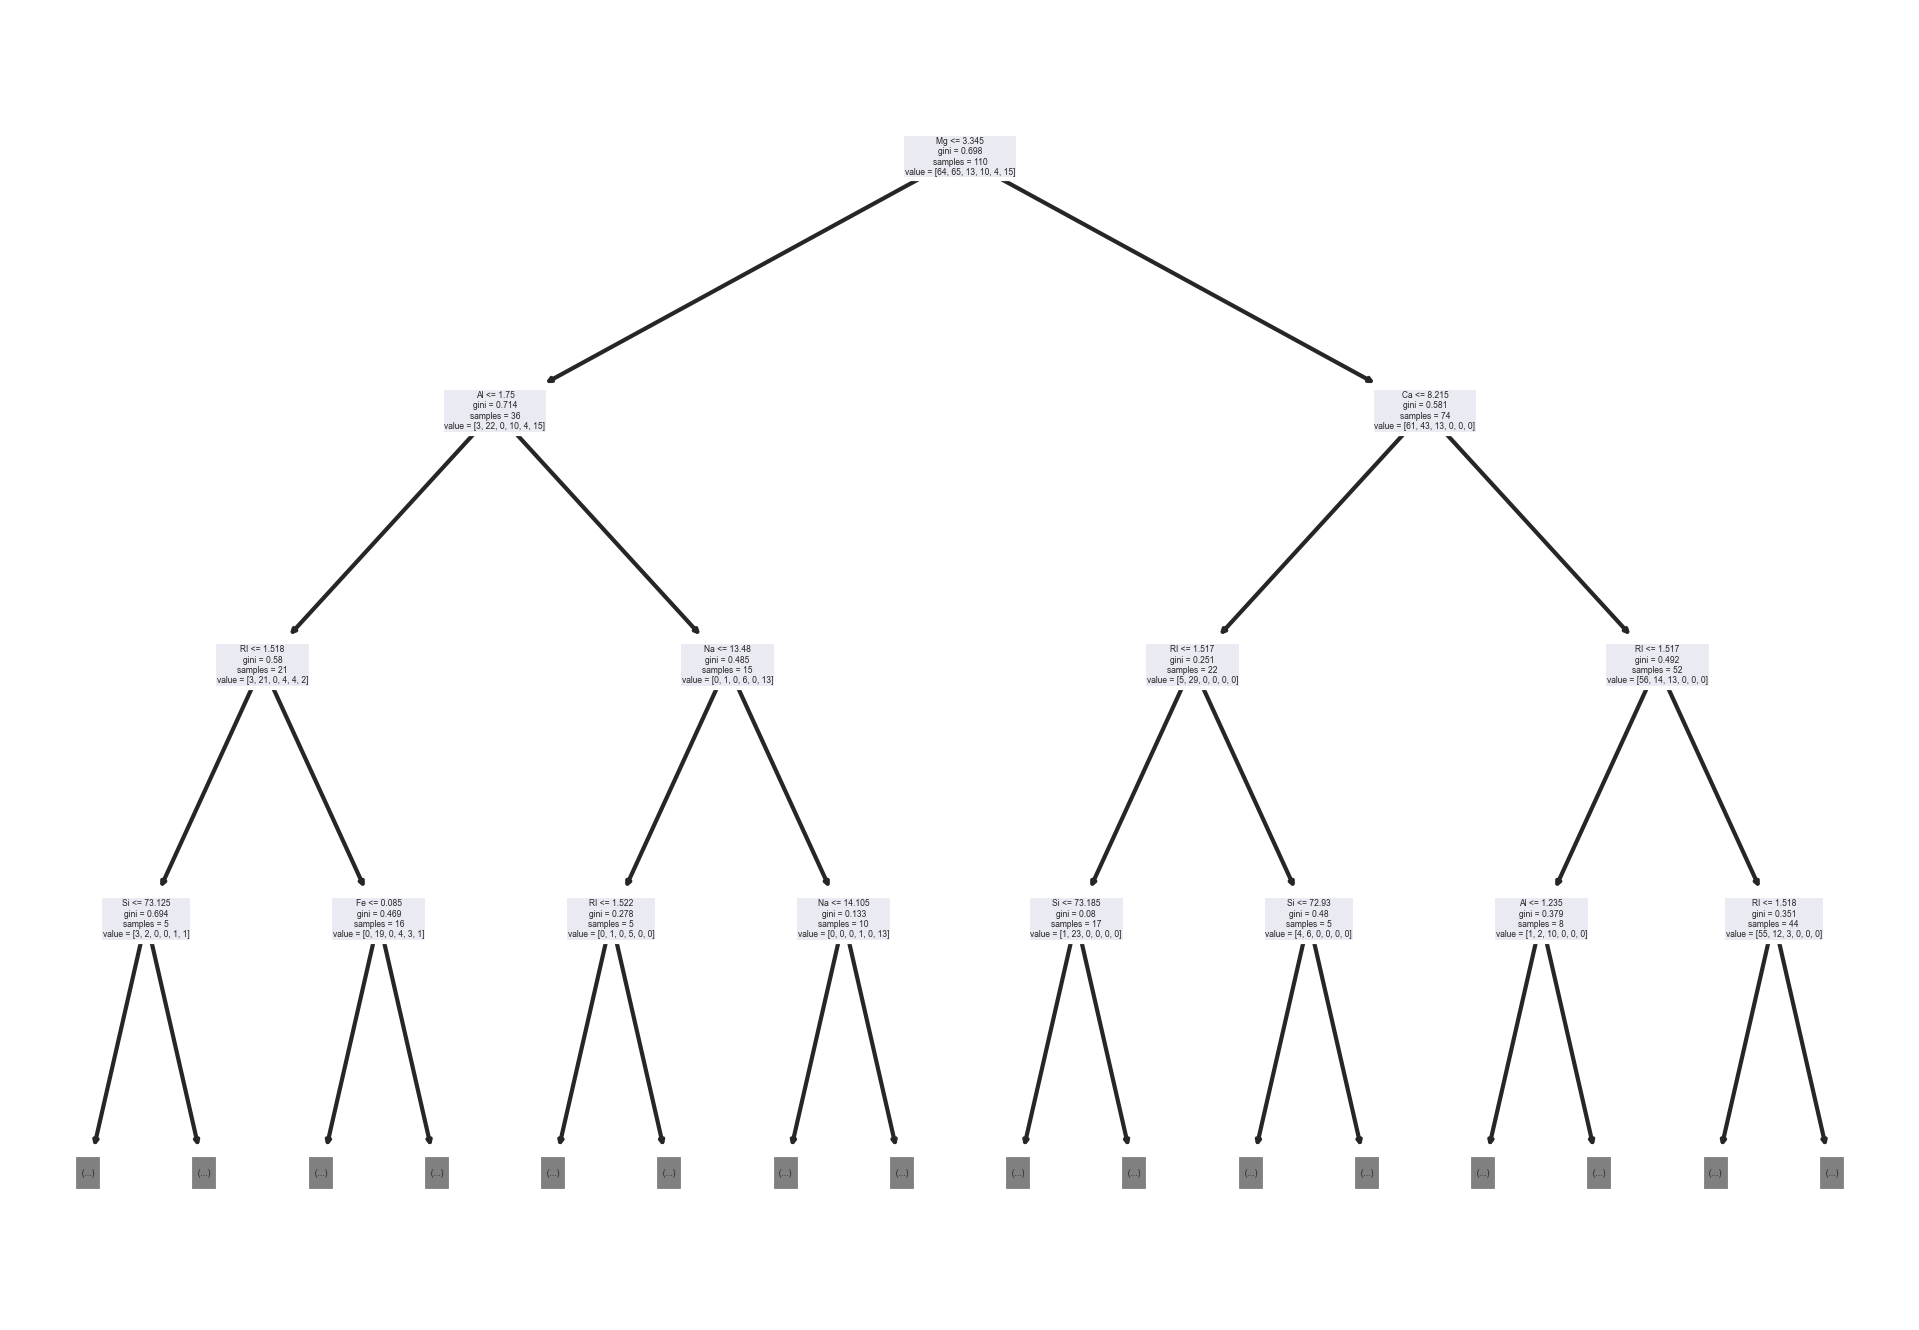

In [264]:
tree.plot_tree(rfc.estimators_[0], feature_names=['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe'],max_depth=3)
plt.show()

In [265]:
list(df['Type'].unique())

[1, 2, 3, 5, 6, 7]

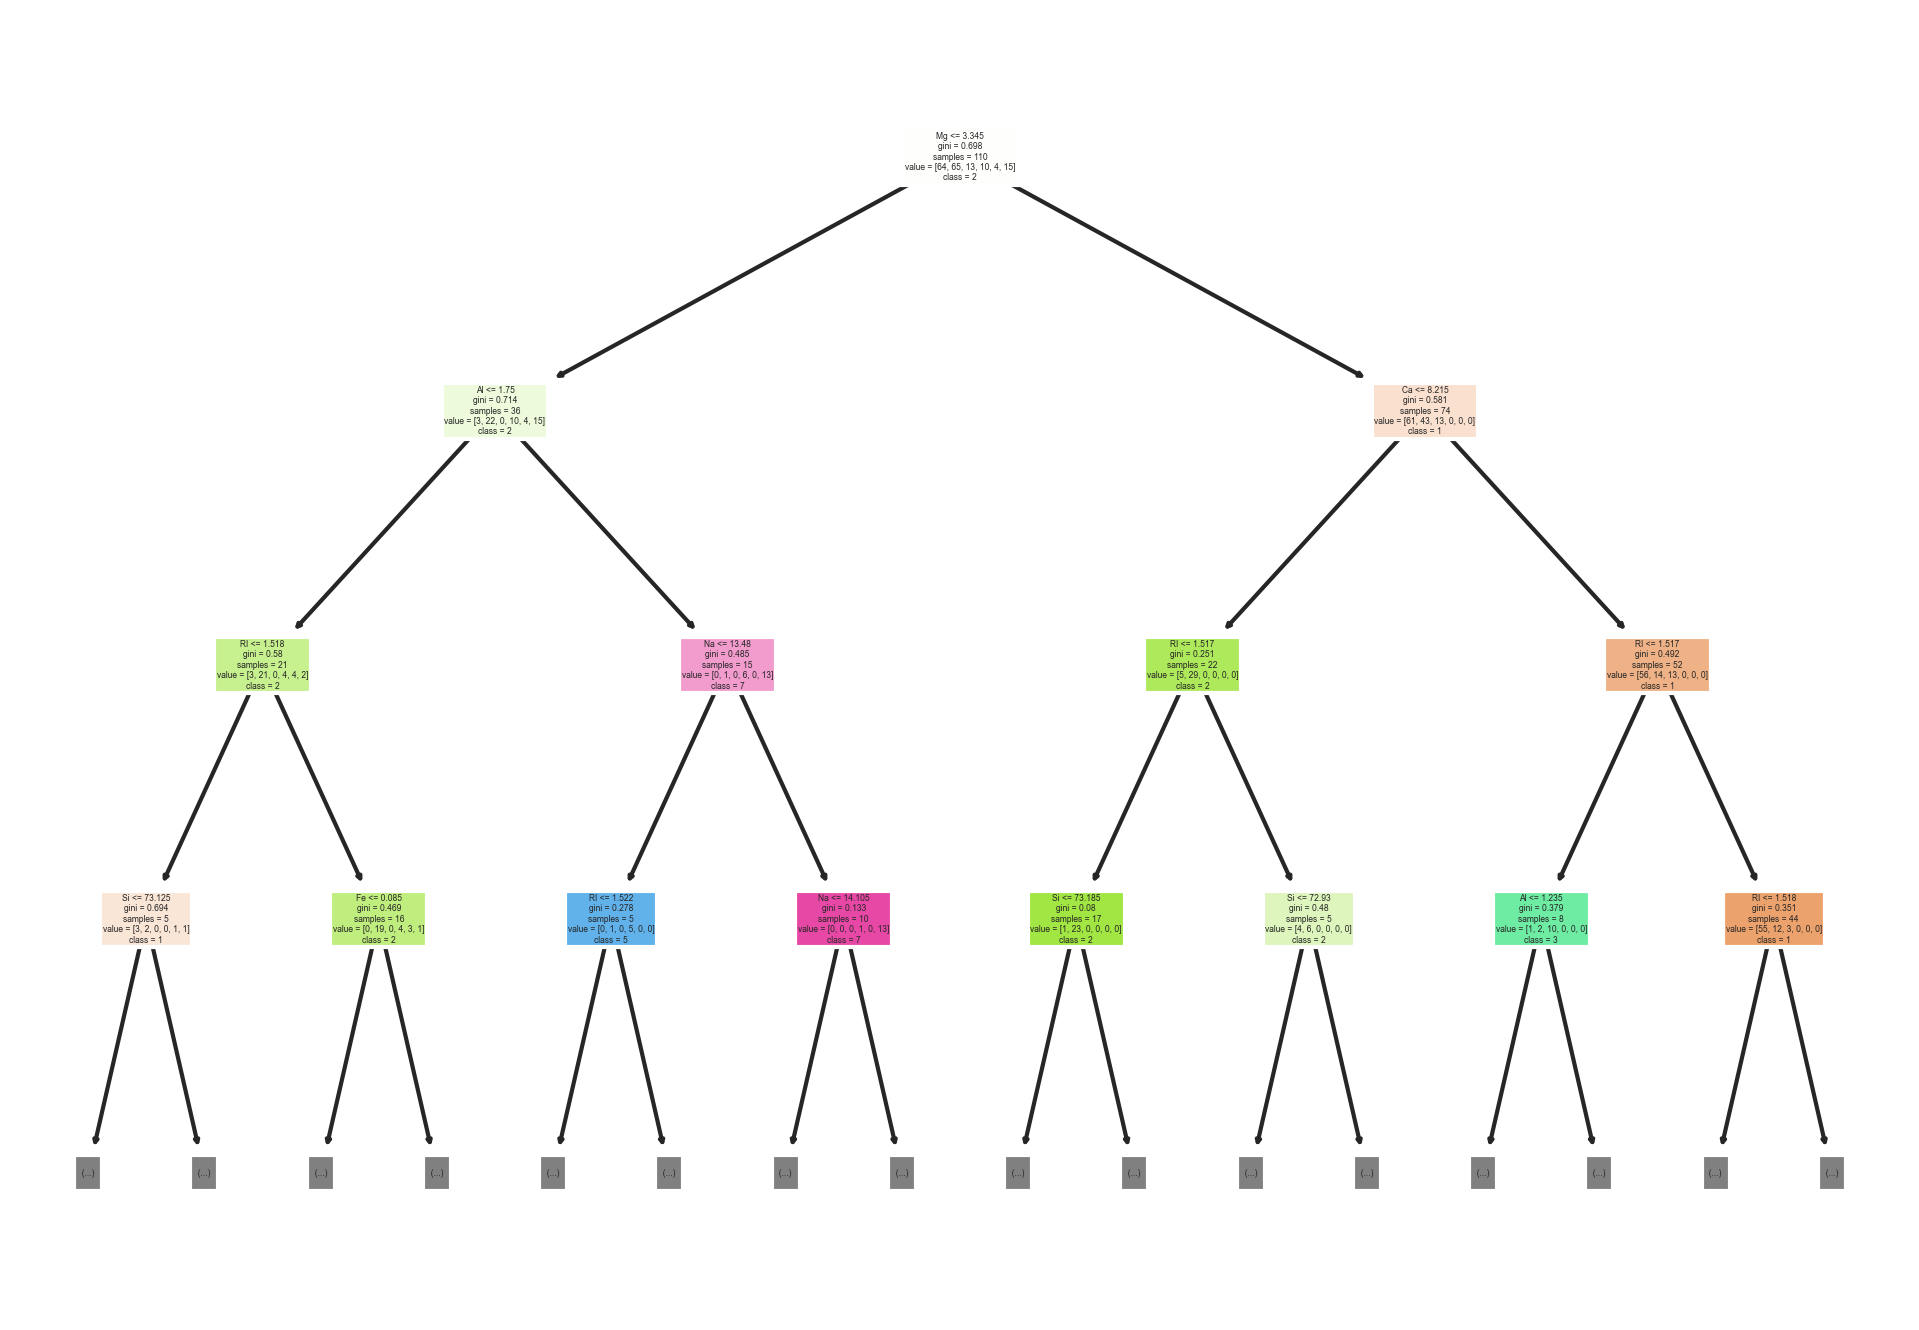

In [273]:
tree.plot_tree(rfc.estimators_[0], feature_names=x.columns.tolist(),
               class_names=df['Type'].astype(str).unique().tolist(),
               filled=True, max_depth=3)
plt.show()

# Additional Notes: 

- Bagging: Bagging involves developing several distinct models using different subsets of the training data. Each subset is randomly sampled with replacement (bootstrap sampling), which means that certain examples may be selected more than once while others may not be selected at all.

- Boosting: Boosting is the process of consecutively training many weak learners (models that perform marginally better than random chance), with each model attempting to rectify the preceding model's faults. Compared to bagging, boosting applies different weights to training cases, focusing more on instances that were misclassified in previous rounds.